# Table Of Content

## HR Analytics 
- #### [Load and Explore the data](#part1.1)
- #### [Data Cleansing and Transformation ](#part1.2)
- #### [Correlation Analysis   ](#part1.3)
- #### [Exporting Data](#part1.4)
- #### [Modelling ](#part1.5)
- #### [Performance Analysis ](#part1.6)

## Airbnb

- #### [Load and Explore the data](#part2.1)
- #### [Data Cleansing and Transformation  ](#part2.2)
- #### [Correlation Analysis   ](#part2.3)
- #### [Exporting Data](#part2.4)
- #### [Modelling ](#part2.5)
- #### [Performance Analysis](#part2.6)

## [Report](#part3)

In [654]:
# import the required packages

import numpy as np
import pandas as pd

# sklearn preprocess
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer

# feature engine
import feature_engine.imputation as mdi
from feature_engine.variable_handling import check_numerical_variables
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, RareLabelEncoder
from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, StandardScaler, RobustScaler
from feature_engine.transformation import LogTransformer
from feature_engine.imputation import MeanMedianImputer
from sklearn.metrics import confusion_matrix, accuracy_score
from math import sqrt
from feature_engine.outliers import Winsorizer

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

## 1. HR Analytics

### 1.1 Load and Explore the data<a id="part1.1"></a>

In [5]:
# load data
HR_Analytics = pd.read_csv('hr_data.csv')

In [6]:
# Showcase top 10 rows of the data
HR_Analytics.head(10)

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   
5        58896          Analytics   region_2        Bachelor's      m   
6        20379         Operations  region_20        Bachelor's      f   
7        16290         Operations  region_34  Master's & above      m   
8        73202          Analytics  region_20        Bachelor's      m   
9        28911  Sales & Marketing   region_1  Master's & above      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   
5            sourcing                2   31                   3.0   
6               other                1   31                   3.0   
7            sourcing                1   33                   3.0   
8               other                1   28                   4.0   
9            sourcing                1   32                   5.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   
5                  7              0            0                  85   
6                  5              0            0                  59   
7                  6              0            0                  63   
8                  5              0            0                  83   
9                  5              1            0                  54   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            0  
7            0  
8            0  
9            0

In [7]:
# Showcase bottom 10 rows of the data
HR_Analytics.tail(10)

employee_id         department     region         education gender  \
54798        40257  Sales & Marketing   region_2  Master's & above      f   
54799        68093        Procurement   region_2  Master's & above      f   
54800        39227                 HR  region_11        Bachelor's      m   
54801        12431         Technology  region_26        Bachelor's      f   
54802         6915  Sales & Marketing  region_14        Bachelor's      m   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
54798               other                2   40                   5.0   
54799               other                1   50                   5.0   
54800               other                2   34                   5.0   
54801            sourcing                1   31                   NaN   
54802               other                2   31                   1.0   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
54798                  4              1            0                  51   
54799                  6              1            1                  67   
54800                  3              0            0                  52   
54801                  1              0            0                  78   
54802                  2              0            0                  49   
54803                 17              0            0                  78   
54804                  6              0            0                  56   
54805                  3              1            0                  79   
54806                  2              0            0                  45   
54807                  5              0            0                  49   

       is_promoted  
54798            0  
54799            0  
54800            0  
54801            0  
54802            0  
54803            0  
54804            0  
54805            0  
54806            0  
54807            0

In [8]:
#Education, previous_year_rating have null values

HR_Analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [9]:
HR_Analytics.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [10]:
HR_Analytics.nunique(dropna= True)

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [11]:
print(HR_Analytics.isnull().mean().sort_values(ascending = False))

previous_year_rating    0.075244
education               0.043953
employee_id             0.000000
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64


In [12]:
print(HR_Analytics.isnull().sum().sort_values(ascending = False))

previous_year_rating    4124
education               2409
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


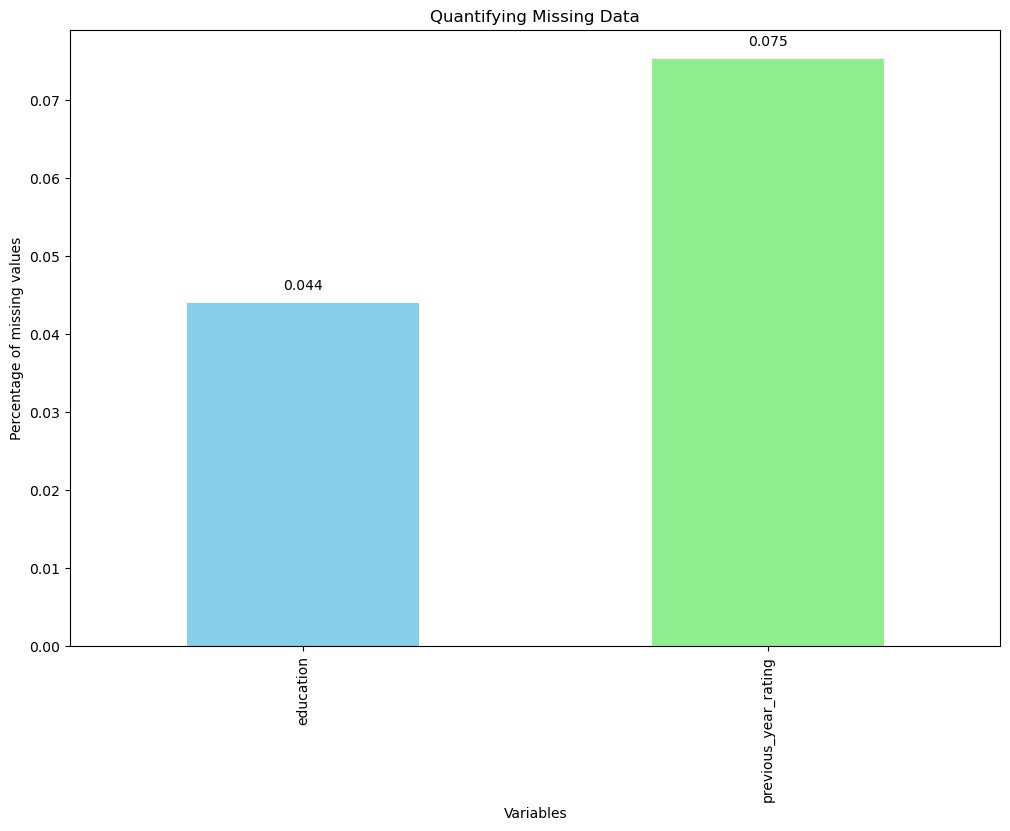

In [13]:
# Plot the percentages of missing data utilising
# Calculate the percentage of missing values
missing_data = HR_Analytics.isnull().mean()

# Filter to only include columns with missing values
missing_data = missing_data[missing_data > 0]

# Plot the missing data
missing_data.plot.bar(figsize=(12, 8), color=['skyblue', 'lightgreen'])

for x, y in enumerate(missing_data):
    label = "{:.3f}".format(y)
    plt.annotate(label, 
                 (x, missing_data.iloc[x]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center')
    
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying Missing Data')
plt.show()

Total number of departments: 54808
department
Sales & Marketing    0.307254
Operations           0.207050
Technology           0.130236
Procurement          0.130236
Analytics            0.097650
Finance              0.046271
HR                   0.044118
Legal                0.018957
R&D                  0.018227
Name: count, dtype: float64


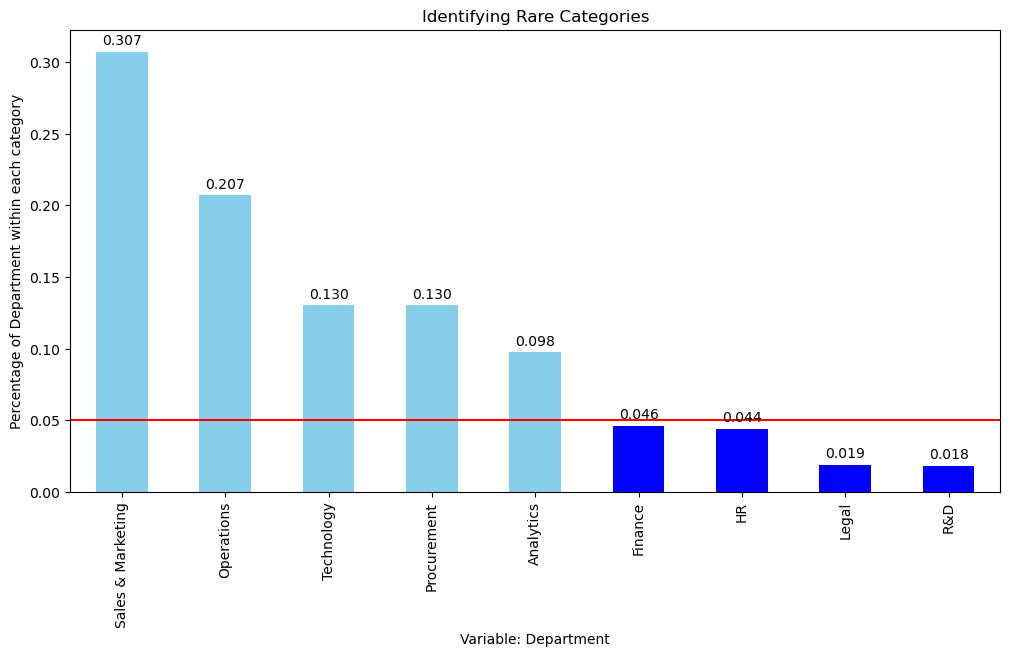

In [14]:
# Calculate the total number of departments
total_department = len(HR_Analytics['department'])
print('Total number of departments: {}'.format(total_department))

# Calculate label frequency
label_freq = HR_Analytics['department'].value_counts() / total_department

# Inspect the frequency of the labels
print(label_freq)

# Set up colors: red for frequencies below 0.05, blue otherwise
colors = ['blue' if freq < 0.05 else 'skyblue' for freq in label_freq.sort_values(ascending=False)]

# Plot category frequencies with conditional coloring
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12, 6), color=colors)

# Add a line to signal a 5% frequency limit, under which a category is considered rare
fig.axhline(y=0.05, color='red')

# Add labels above each bar
for x, y in enumerate(label_freq.sort_values(ascending=False)):
    label = "{:.3f}".format(y)
    plt.annotate(label, 
                 (x, y),  # Position the label at the top of the bar
                 textcoords="offset points", 
                 xytext=(0, 5),  # Offset the label slightly above the bar
                 ha='center')

# Add axis labels and title
fig.set_ylabel('Percentage of Department within each category')
fig.set_xlabel('Variable: Department')
fig.set_title('Identifying Rare Categories')
plt.show()


Total number of Education: 54808
education
Bachelor's          0.669045
Master's & above    0.272314
Below Secondary     0.014688
Name: count, dtype: float64


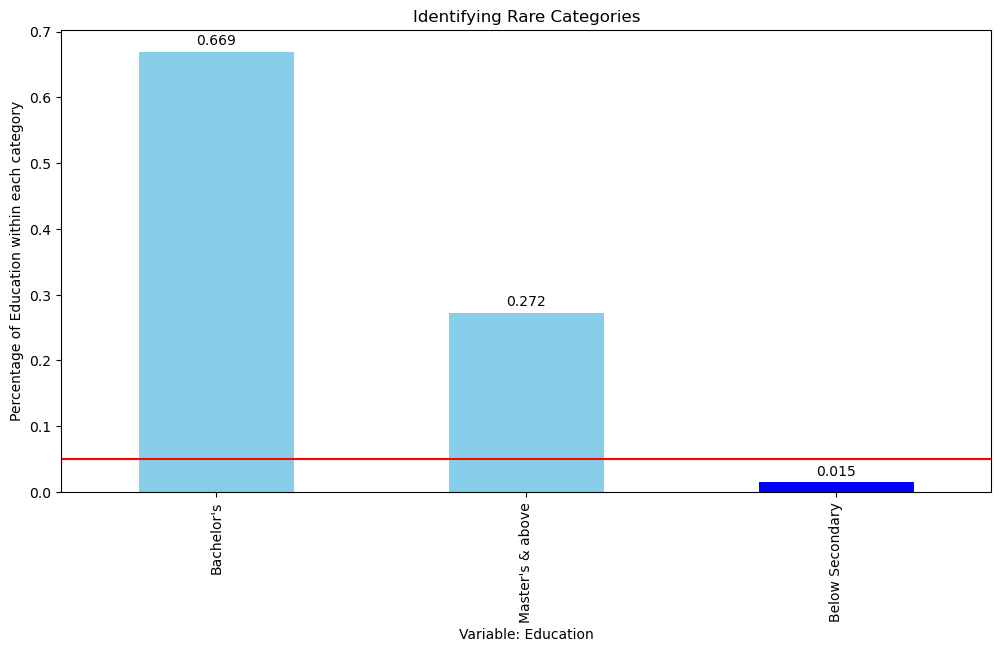

In [15]:
# Calculate the total number of education
total_education = len(HR_Analytics['education'])
print('Total number of Education: {}'.format(total_education))

# Calculate label frequency
label_freq = HR_Analytics['education'].value_counts() / total_education

# Inspect the frequency of the labels
print(label_freq)

# Set up colors: red for frequencies below 0.05, blue otherwise
colors = ['blue' if freq < 0.05 else 'skyblue' for freq in label_freq.sort_values(ascending=False)]

# Plot category frequencies with conditional coloring
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12, 6), color=colors)

# Add a line to signal a 5% frequency limit, under which a category is considered rare
fig.axhline(y=0.05, color='red')

# Add labels above each bar
for x, y in enumerate(label_freq.sort_values(ascending=False)):
    label = "{:.3f}".format(y)
    plt.annotate(label, 
                 (x, y),  # Position the label at the top of the bar
                 textcoords="offset points", 
                 xytext=(0, 5),  # Offset the label slightly above the bar
                 ha='center')

# Add axis labels and title
fig.set_ylabel('Percentage of Education within each category')
fig.set_xlabel('Variable: Education')
fig.set_title('Identifying Rare Categories')
plt.show()

Total number of Gender: 54808
gender
m    0.702379
f    0.297621
Name: count, dtype: float64


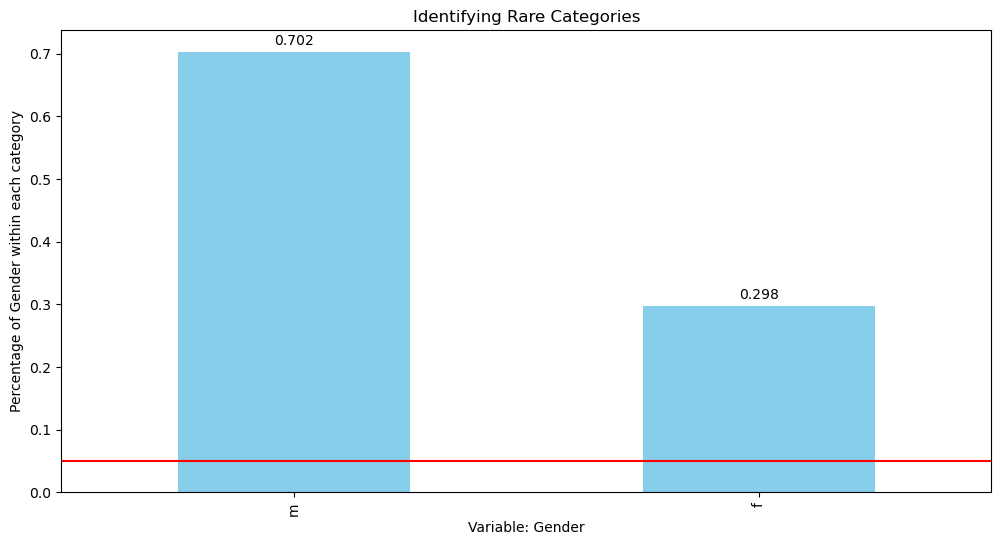

In [16]:
# Calculate the total number of gender
total_gender = len(HR_Analytics['gender'])
print('Total number of Gender: {}'.format(total_gender))

# Calculate label frequency
label_freq = HR_Analytics['gender'].value_counts() / total_gender

# Inspect the frequency of the labels
print(label_freq)

# Set up colors: red for frequencies below 0.05, blue otherwise
colors = ['blue' if freq < 0.05 else 'skyblue' for freq in label_freq.sort_values(ascending=False)]

# Plot category frequencies with conditional coloring
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12, 6), color=colors)

# Add a line to signal a 5% frequency limit, under which a category is considered rare
fig.axhline(y=0.05, color='red')

# Add labels above each bar
for x, y in enumerate(label_freq.sort_values(ascending=False)):
    label = "{:.3f}".format(y)
    plt.annotate(label, 
                 (x, y),  # Position the label at the top of the bar
                 textcoords="offset points", 
                 xytext=(0, 5),  # Offset the label slightly above the bar
                 ha='center')

# Add axis labels and title
fig.set_ylabel('Percentage of Gender within each category')
fig.set_xlabel('Variable: Gender')
fig.set_title('Identifying Rare Categories')
plt.show()

Total number of Recruitment Channel: 54808
recruitment_channel
other       0.555503
sourcing    0.423661
referred    0.020836
Name: count, dtype: float64


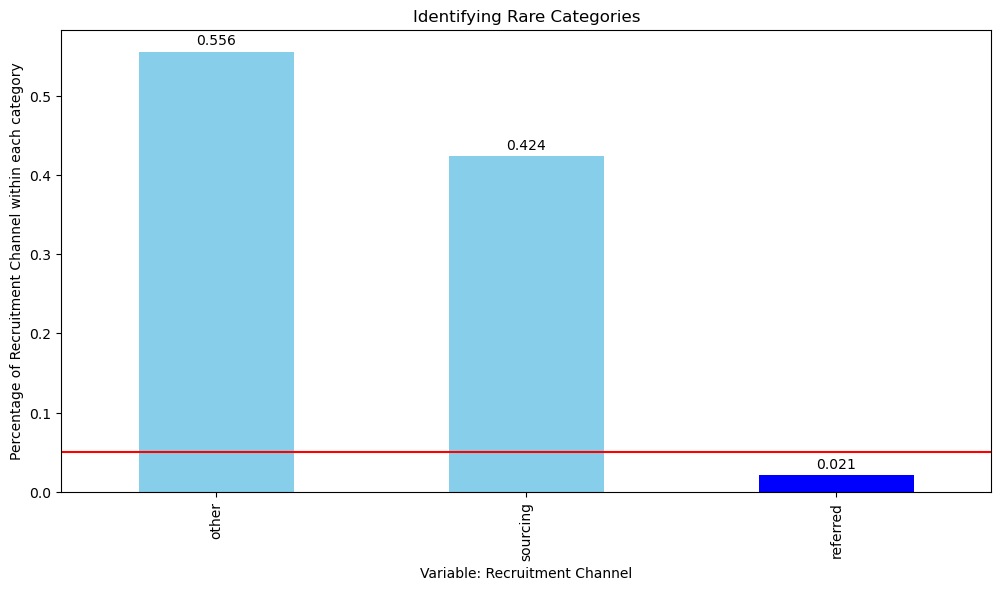

In [17]:
# Calculate the total number of unique channel
total_recruitment_channel = len(HR_Analytics['recruitment_channel'])
print('Total number of Recruitment Channel: {}'.format(total_recruitment_channel))

# Calculate label frequency
label_freq = HR_Analytics['recruitment_channel'].value_counts() / total_recruitment_channel

# Inspect the frequency of the labels
print(label_freq)

# Set up colors: red for frequencies below 0.05, blue otherwise
colors = ['blue' if freq < 0.05 else 'skyblue' for freq in label_freq.sort_values(ascending=False)]

# Plot category frequencies with conditional coloring
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12, 6), color=colors)

# Add a line to signal a 5% frequency limit, under which a category is considered rare
fig.axhline(y=0.05, color='red')

# Add labels above each bar
for x, y in enumerate(label_freq.sort_values(ascending=False)):
    label = "{:.3f}".format(y)
    plt.annotate(label, 
                 (x, y),  # Position the label at the top of the bar
                 textcoords="offset points", 
                 xytext=(0, 5),  # Offset the label slightly above the bar
                 ha='center')

# Add axis labels and title
fig.set_ylabel('Percentage of Recruitment Channel within each category')
fig.set_xlabel('Variable: Recruitment Channel')
fig.set_title('Identifying Rare Categories')
plt.show()

Total number of Training: 54808
no_of_trainings
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: count, dtype: int64


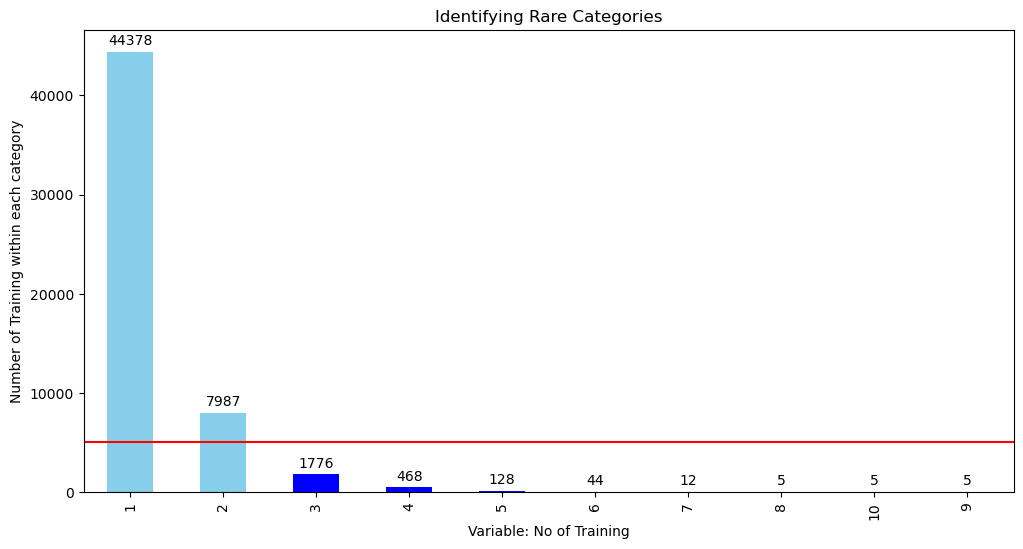

In [18]:
# Calculate the total number of trainings
total_training = len(HR_Analytics['no_of_trainings'])
print('Total number of Training: {}'.format(total_training))

# Calculate label frequency
label_freq = HR_Analytics['no_of_trainings'].value_counts()

# Inspect the frequency of the labels
print(label_freq)

# Set up colors: red for frequencies below 0.05, blue otherwise
colors = ['blue' if freq < 5000 else 'skyblue' for freq in label_freq.sort_values(ascending=False)]

# Plot category frequencies with conditional coloring
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12, 6), color=colors)

# Add a line to signal a 5% frequency limit, under which a category is considered rare
fig.axhline(y=5000, color='red')

# Add labels above each bar
for x, y in enumerate(label_freq.sort_values(ascending=False)):
    label = "{}".format(y)
    plt.annotate(label, 
                 (x, y),  # Position the label at the top of the bar
                 textcoords="offset points", 
                 xytext=(0, 5),  # Offset the label slightly above the bar
                 ha='center')

# Add axis labels and title
fig.set_ylabel('Number of Training within each category')
fig.set_xlabel('Variable: No of Training')
fig.set_title('Identifying Rare Categories')
plt.show()

Total number of Rating: 54808
previous_year_rating
3.0    0.339695
5.0    0.214221
4.0    0.180211
1.0    0.113542
2.0    0.077087
Name: count, dtype: float64


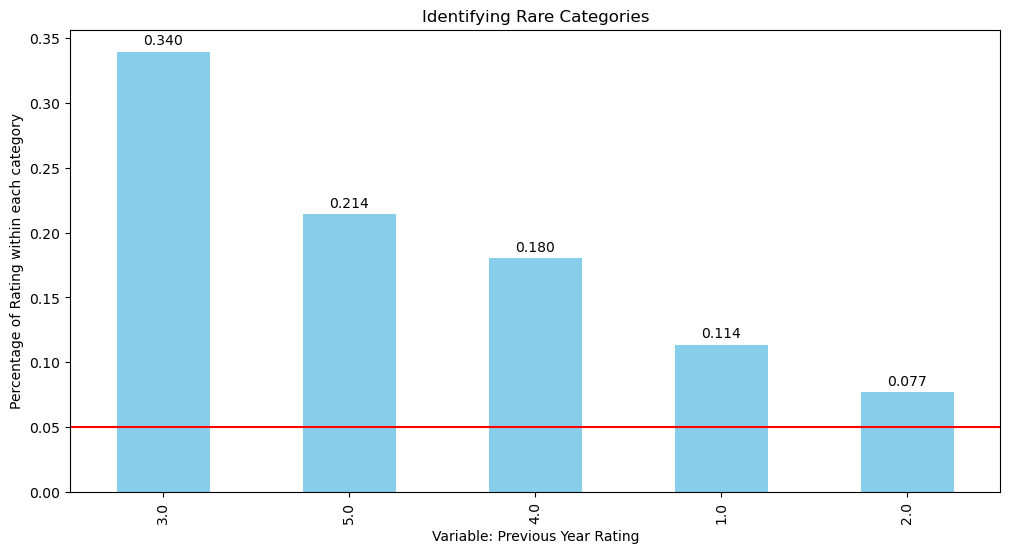

In [19]:
# Calculate the total number of unique rating
total_rating = len(HR_Analytics['previous_year_rating'])
print('Total number of Rating: {}'.format(total_rating))

# Calculate label frequency
label_freq = HR_Analytics['previous_year_rating'].value_counts() / total_rating

# Inspect the frequency of the labels
print(label_freq)

# Set up colors: red for frequencies below 0.05, blue otherwise
colors = ['red' if freq < 0.05 else 'skyblue' for freq in label_freq.sort_values(ascending=False)]

# Plot category frequencies with conditional coloring
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12, 6), color=colors)

# Add a line to signal a 5% frequency limit, under which a category is considered rare
fig.axhline(y=0.05, color='red')

# Add labels above each bar
for x, y in enumerate(label_freq.sort_values(ascending=False)):
    label = "{:.3f}".format(y)
    plt.annotate(label, 
                 (x, y),  # Position the label at the top of the bar
                 textcoords="offset points", 
                 xytext=(0, 5),  # Offset the label slightly above the bar
                 ha='center')

# Add axis labels and title
fig.set_ylabel('Percentage of Rating within each category')
fig.set_xlabel('Variable: Previous Year Rating')
fig.set_title('Identifying Rare Categories')
plt.show()

Total number of KPI: 54808
KPIs_met >80%
0    0.648026
1    0.351974
Name: count, dtype: float64


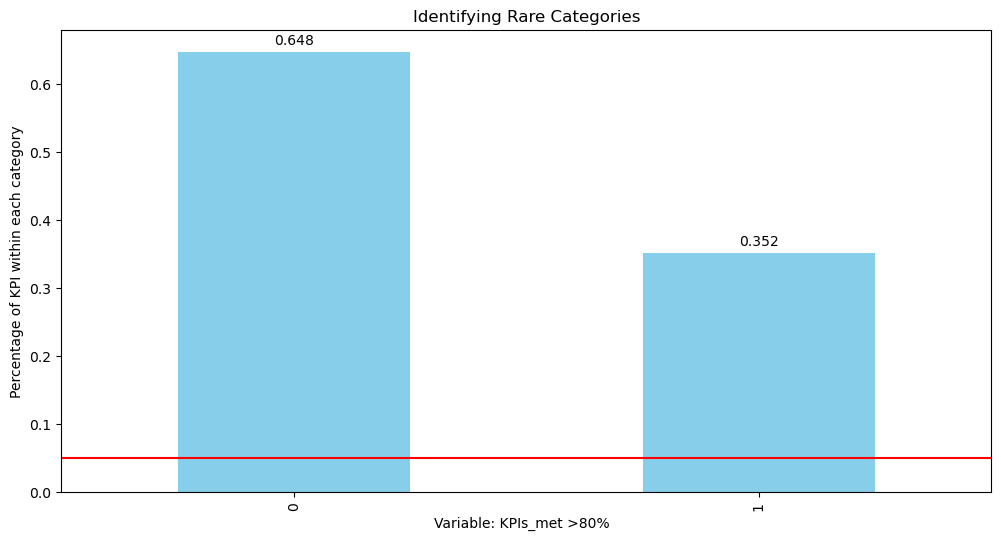

In [20]:
# Calculate the total number of employees that hit KPI
total_KPI = len(HR_Analytics[ 'KPIs_met >80%'])
print('Total number of KPI: {}'.format(total_KPI))

# Calculate label frequency
label_freq = HR_Analytics['KPIs_met >80%'].value_counts() / total_KPI

# Inspect the frequency of the labels
print(label_freq)

# Set up colors: red for frequencies below 0.05, blue otherwise
colors = ['blue' if freq < 0.05 else 'skyblue' for freq in label_freq.sort_values(ascending=False)]

# Plot category frequencies with conditional coloring
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12, 6), color=colors)

# Add a line to signal a 5% frequency limit, under which a category is considered rare
fig.axhline(y=0.05, color='red')

# Add labels above each bar
for x, y in enumerate(label_freq.sort_values(ascending=False)):
    label = "{:.3f}".format(y)
    plt.annotate(label, 
                 (x, y),  # Position the label at the top of the bar
                 textcoords="offset points", 
                 xytext=(0, 5),  # Offset the label slightly above the bar
                 ha='center')

# Add axis labels and title
fig.set_ylabel('Percentage of KPI within each category')
fig.set_xlabel('Variable: KPIs_met >80%  ')
fig.set_title('Identifying Rare Categories')
plt.show()

Total number of Award Won: 54808
awards_won?
0    0.976828
1    0.023172
Name: count, dtype: float64


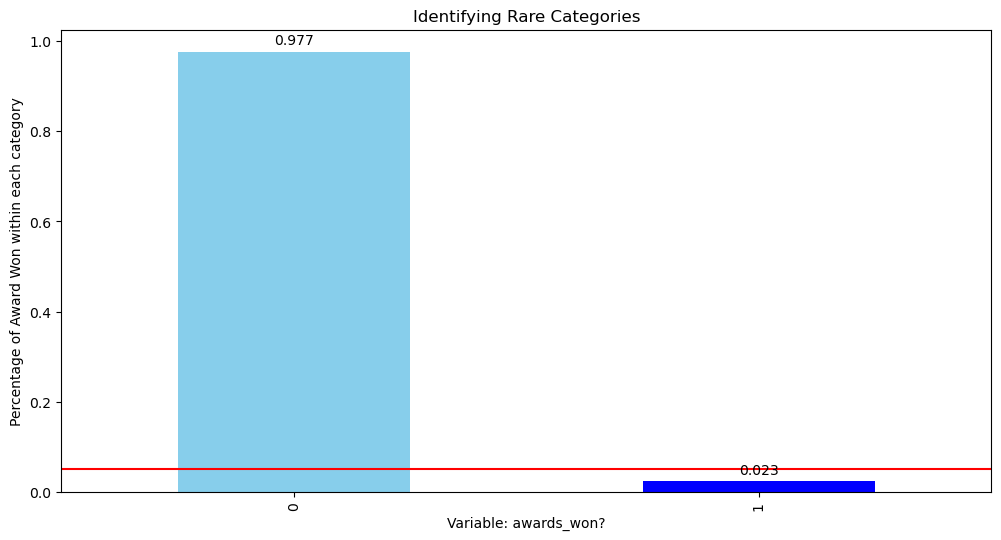

In [21]:
# Calculate the total number of awards won
total_award = len(HR_Analytics['awards_won?'])
print('Total number of Award Won: {}'.format(total_award))

# Calculate label frequency
label_freq = HR_Analytics['awards_won?'].value_counts() / total_award

# Inspect the frequency of the labels
print(label_freq)

# Set up colors: red for frequencies below 0.05, blue otherwise
colors = ['blue' if freq < 0.05 else 'skyblue' for freq in label_freq.sort_values(ascending=False)]

# Plot category frequencies with conditional coloring
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12, 6), color=colors)

# Add a line to signal a 5% frequency limit, under which a category is considered rare
fig.axhline(y=0.05, color='red')

# Add labels above each bar
for x, y in enumerate(label_freq.sort_values(ascending=False)):
    label = "{:.3f}".format(y)
    plt.annotate(label, 
                 (x, y),  # Position the label at the top of the bar
                 textcoords="offset points", 
                 xytext=(0, 5),  # Offset the label slightly above the bar
                 ha='center')

# Add axis labels and title
fig.set_ylabel('Percentage of Award Won within each category')
fig.set_xlabel('Variable: awards_won?')
fig.set_title('Identifying Rare Categories')
plt.show()

Total number employees promoted: 54808
is_promoted
0    0.91483
1    0.08517
Name: count, dtype: float64


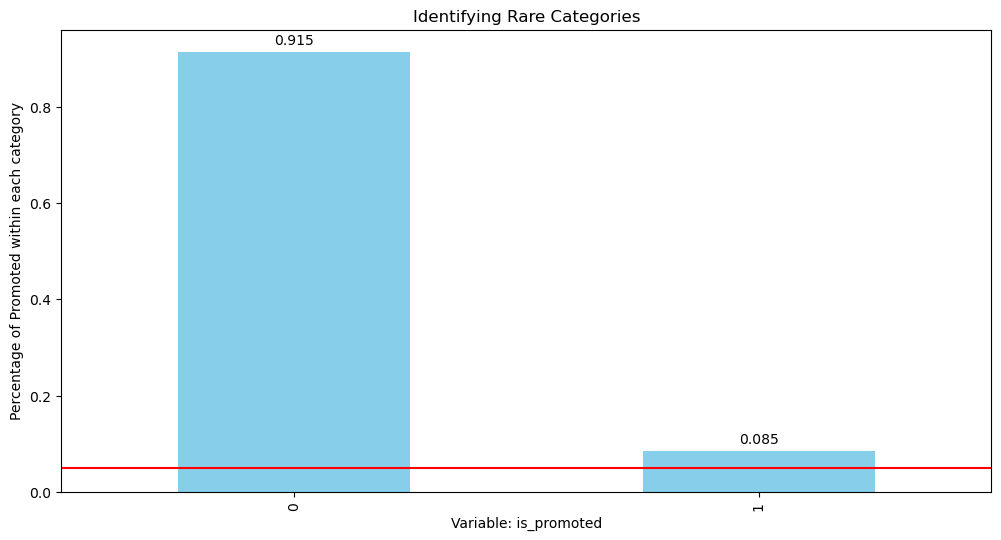

In [22]:
# Calculate the total number of promotions
total_is_promoted = len(HR_Analytics['is_promoted'])
print('Total number employees promoted: {}'.format(total_is_promoted))

# Calculate label frequency
label_freq = HR_Analytics['is_promoted'].value_counts() / total_is_promoted

# Inspect the frequency of the labels
print(label_freq)

# Set up colors: red for frequencies below 0.05, blue otherwise
colors = ['blue' if freq < 0.05 else 'skyblue' for freq in label_freq.sort_values(ascending=False)]

# Plot category frequencies with conditional coloring
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12, 6), color=colors)

# Add a line to signal a 5% frequency limit, under which a category is considered rare
fig.axhline(y=0.05, color='red')

# Add labels above each bar
for x, y in enumerate(label_freq.sort_values(ascending=False)):
    label = "{:.3f}".format(y)
    plt.annotate(label, 
                 (x, y),  # Position the label at the top of the bar
                 textcoords="offset points", 
                 xytext=(0, 5),  # Offset the label slightly above the bar
                 ha='center')

# Add axis labels and title
fig.set_ylabel('Percentage of Promoted within each category')
fig.set_xlabel('Variable: is_promoted')
fig.set_title('Identifying Rare Categories')
plt.show()

### 1.2 Cleanse and Transform the data <a id="part1.2"></a>

Are there any missing values? How did you handle them? Are there any outliers? How did you identify them and how to deal with them? Do you need to transform the Categorical Data into numbers? Do you need to scale the data or not? 

#### Replace NaN (Not a Number) with '?'

In [25]:
HR_Analytics = HR_Analytics.replace('?', np.nan)
HR_Analytics.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [26]:
HR_Analytics = HR_Analytics.drop('employee_id', axis=1)
HR_Analytics.head()

department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   
3  Sales & Marketing  region_23        Bachelor's      m               other   
4         Technology  region_26        Bachelor's      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                   5.0                  8   
1                1   30                   5.0                  4   
2                1   34                   3.0                  7   
3                2   39                   1.0                 10   
4                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0  
3              0            0                  50            0  
4              0            0                  73            0

#### Assembling an Imputation Pipeline

In [28]:
pipe = Pipeline(steps=[
    ('imp_num_median', mdi.MeanMedianImputer(imputation_method = 'median', variables=['previous_year_rating'])),
    ('imp_cat_frequent', mdi.CategoricalImputer(variables = ['education'], imputation_method='frequent'))
])

In [29]:
pipe.fit(HR_Analytics)

Pipeline(steps=[('imp_num_median',
                 MeanMedianImputer(variables=['previous_year_rating'])),
                ('imp_cat_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['education']))])

In [30]:
HR_Data = pipe.transform(HR_Analytics)

In [31]:
# Before NUll imputation
HR_Analytics.isnull().mean().sort_values(ascending = False)

previous_year_rating    0.075244
education               0.043953
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [32]:
# After NUll imputation
HR_Data.isnull().mean().sort_values(ascending = False)

department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

#### Under Sampling

is_promoted
0    50140
1     4668
Name: count, dtype: int64


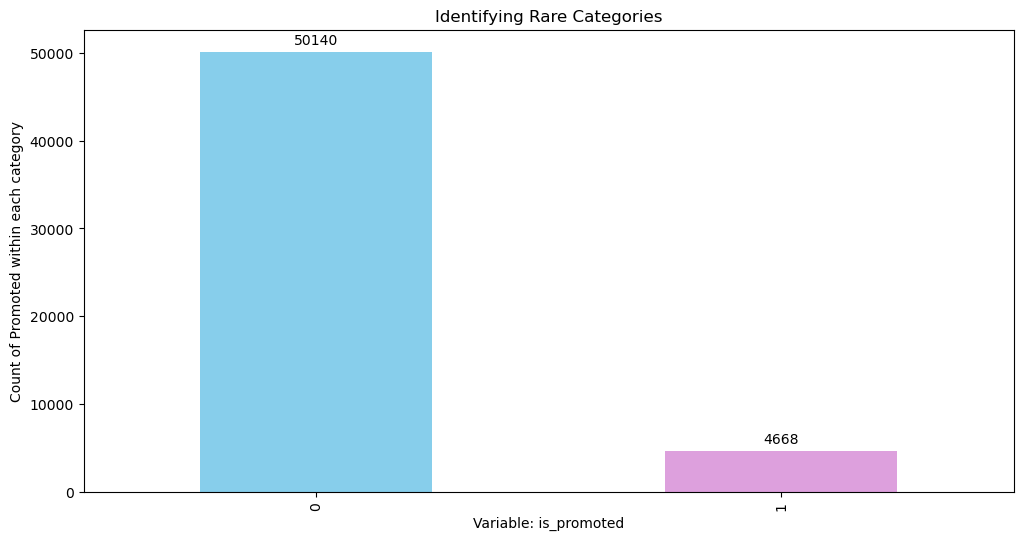

In [34]:
# Calculate label frequency
label_freq = HR_Data['is_promoted'].value_counts() 

# Inspect the frequency of the labels
print(label_freq)

# Set up colors: red for frequencies below 0.05, blue otherwise
colors = ['skyblue', 'plum']

# Plot category frequencies with conditional coloring
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12, 6), color=colors)

# Add labels above each bar
for x, y in enumerate(label_freq.sort_values(ascending=False)):
    label = "{}".format(y)
    plt.annotate(label, 
                 (x, y),  # Position the label at the top of the bar
                 textcoords="offset points", 
                 xytext=(0, 5),  # Offset the label slightly above the bar
                 ha='center')

# Add axis labels and title
fig.set_ylabel('Count of Promoted within each category')
fig.set_xlabel('Variable: is_promoted')
fig.set_title('Identifying Rare Categories')
plt.show()

In [35]:
HR_Data['is_promoted'].value_counts() 

is_promoted
0    50140
1     4668
Name: count, dtype: int64

#### Number of Row with is_promoted = 1

In [37]:
HR_1 = HR_Data[HR_Data['is_promoted']==1]
HR_1.head()

department     region         education gender recruitment_channel  \
11  Sales & Marketing   region_7        Bachelor's      f            sourcing   
39  Sales & Marketing  region_28        Bachelor's      m            sourcing   
60  Sales & Marketing   region_4  Master's & above      m               other   
66            Finance  region_22        Bachelor's      m               other   
67  Sales & Marketing  region_22        Bachelor's      m            sourcing   

    no_of_trainings  age  previous_year_rating  length_of_service  \
11                1   35                   5.0                  3   
39                1   33                   5.0                  6   
60                1   50                   4.0                 17   
66                1   27                   3.0                  1   
67                1   27                   3.0                  1   

    KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
11              1            0                  50            1  
39              1            0                  51            1  
60              1            0                  47            1  
66              1            1                  58            1  
67              0            0                  61            1

In [38]:
len(HR_1)

4668

#### Number of Row with is_promoted = 0

In [40]:
HR_0 = HR_Data[HR_Data['is_promoted']==0]
HR_0.head()

department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   
3  Sales & Marketing  region_23        Bachelor's      m               other   
4         Technology  region_26        Bachelor's      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                   5.0                  8   
1                1   30                   5.0                  4   
2                1   34                   3.0                  7   
3                2   39                   1.0                 10   
4                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0  
3              0            0                  50            0  
4              0            0                  73            0

#### Combine Data Sample to Create Equal Rows of is_promoted

In [42]:
combine_data = HR_0.sample(n=len(HR_1), random_state=2).copy()
combine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4668 entries, 6725 to 12976
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            4668 non-null   object 
 1   region                4668 non-null   object 
 2   education             4668 non-null   object 
 3   gender                4668 non-null   object 
 4   recruitment_channel   4668 non-null   object 
 5   no_of_trainings       4668 non-null   int64  
 6   age                   4668 non-null   int64  
 7   previous_year_rating  4668 non-null   float64
 8   length_of_service     4668 non-null   int64  
 9   KPIs_met >80%         4668 non-null   int64  
 10  awards_won?           4668 non-null   int64  
 11  avg_training_score    4668 non-null   int64  
 12  is_promoted           4668 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 510.6+ KB


In [44]:
HR_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9336 entries, 11 to 12976
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            9336 non-null   object 
 1   region                9336 non-null   object 
 2   education             9336 non-null   object 
 3   gender                9336 non-null   object 
 4   recruitment_channel   9336 non-null   object 
 5   no_of_trainings       9336 non-null   int64  
 6   age                   9336 non-null   int64  
 7   previous_year_rating  9336 non-null   float64
 8   length_of_service     9336 non-null   int64  
 9   KPIs_met >80%         9336 non-null   int64  
 10  awards_won?           9336 non-null   int64  
 11  avg_training_score    9336 non-null   int64  
 12  is_promoted           9336 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1021.1+ KB


In [45]:
HR_new.describe()

no_of_trainings          age  previous_year_rating  length_of_service  \
count      9336.000000  9336.000000           9336.000000        9336.000000   
mean          1.228685    34.596937              3.579799           5.759533   
std           0.567723     7.449845              1.176841           4.146011   
min           1.000000    20.000000              1.000000           1.000000   
25%           1.000000    29.000000              3.000000           3.000000   
50%           1.000000    33.000000              3.000000           5.000000   
75%           1.000000    38.000000              5.000000           7.000000   
max           7.000000    60.000000              5.000000          34.000000   

       KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
count    9336.000000  9336.000000         9336.000000  9336.000000  
mean        0.508569     0.066945           67.104863     0.500000  
std         0.499953     0.249940           14.569584     0.500027  
min         0.000000     0.000000           41.000000     0.000000  
25%         0.000000     0.000000           54.000000     0.000000  
50%         1.000000     0.000000           65.000000     0.500000  
75%         1.000000     0.000000           81.000000     1.000000  
max         1.000000     1.000000           99.000000     1.000000

is_promoted
1    4668
0    4668
Name: count, dtype: int64


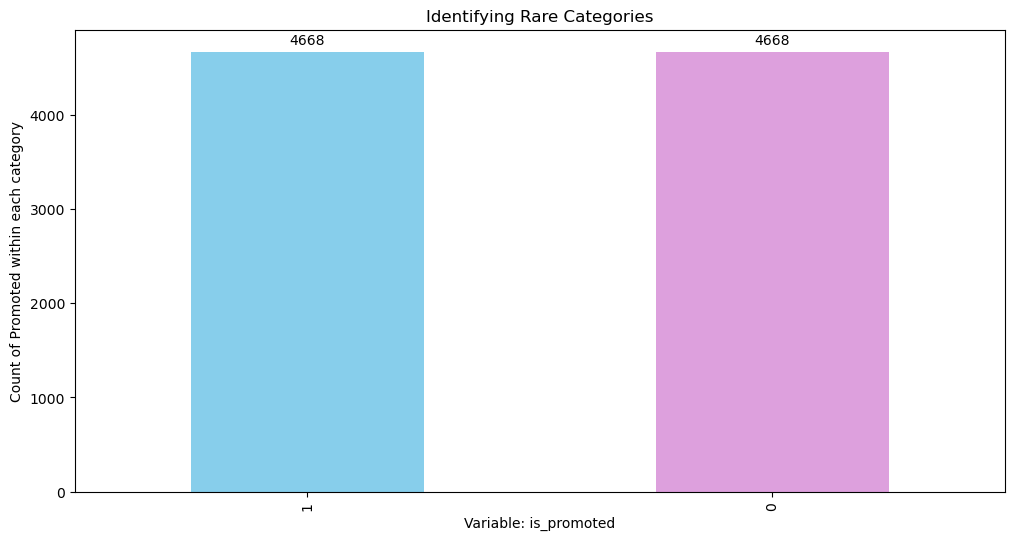

In [46]:
# Calculate label frequency
label_freq = HR_new['is_promoted'].value_counts() 

# Inspect the frequency of the labels
print(label_freq)

# Set up colors: red for frequencies below 0.05, blue otherwise
colors = ['skyblue', 'plum']

# Plot category frequencies with conditional coloring
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12, 6), color=colors)

# Add labels above each bar
for x, y in enumerate(label_freq.sort_values(ascending=False)):
    label = "{}".format(y)
    plt.annotate(label, 
                 (x, y),  # Position the label at the top of the bar
                 textcoords="offset points", 
                 xytext=(0, 5),  # Offset the label slightly above the bar
                 ha='center')

# Add axis labels and title
fig.set_ylabel('Count of Promoted within each category')
fig.set_xlabel('Variable: is_promoted')
fig.set_title('Identifying Rare Categories')
plt.show()

#### Categorize into Numerical & Categorical Columns

In [48]:
# Numerical Variables

num_cols = [n for n in HR_Data.columns if HR_new[n].dtypes!='O']
HR_new[num_cols].head()

no_of_trainings  age  previous_year_rating  length_of_service  \
11                1   35                   5.0                  3   
39                1   33                   5.0                  6   
60                1   50                   4.0                 17   
66                1   27                   3.0                  1   
67                1   27                   3.0                  1   

    KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
11              1            0                  50            1  
39              1            0                  51            1  
60              1            0                  47            1  
66              1            1                  58            1  
67              0            0                  61            1

In [49]:
# Categorical Variables

cat_cols = [c for c in HR_Data.columns if HR_new[c].dtypes=='O']
HR_new[cat_cols].head()

department     region         education gender recruitment_channel
11  Sales & Marketing   region_7        Bachelor's      f            sourcing
39  Sales & Marketing  region_28        Bachelor's      m            sourcing
60  Sales & Marketing   region_4  Master's & above      m               other
66            Finance  region_22        Bachelor's      m               other
67  Sales & Marketing  region_22        Bachelor's      m            sourcing

#### Highlighting Outliers- Choose not to handle outliers

In [51]:
# practical 1.8

def find_boundaries(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    plt.figure(figsize=(3, 6))
    sns.boxplot(y=df[variable])
    plt.title(f'Boxplot: {variable}')
    plt.show()

    return upper_boundary, lower_boundary

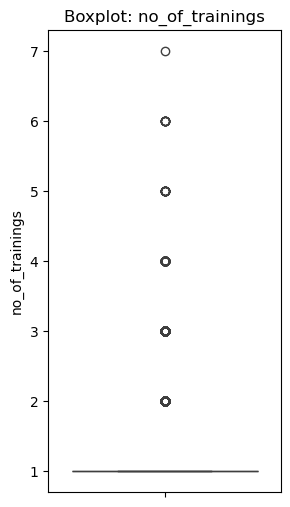

Variable: no_of_trainings, Upper Boundary: 1.0, Lower Boundary: 1.0


In [52]:
upper, lower = find_boundaries(HR_new, 'no_of_trainings')
print(f"Variable: no_of_trainings, Upper Boundary: {upper}, Lower Boundary: {lower}")

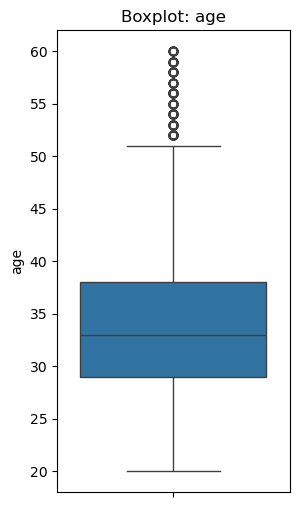

Variable: age, Upper Boundary: 51.5, Lower Boundary: 15.5


In [53]:
upper, lower = find_boundaries(HR_new, 'age')
print(f"Variable: age, Upper Boundary: {upper}, Lower Boundary: {lower}")

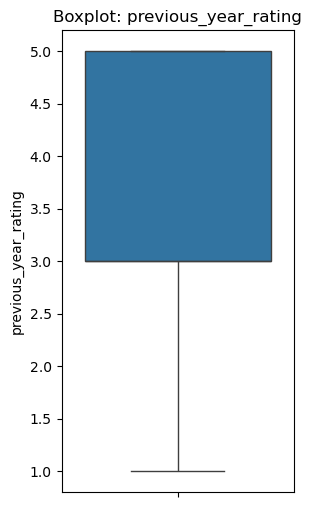

Variable: previous_year_rating, Upper Boundary: 8.0, Lower Boundary: 0.0


In [54]:
upper, lower = find_boundaries(HR_new, 'previous_year_rating')
print(f"Variable: previous_year_rating, Upper Boundary: {upper}, Lower Boundary: {lower}")

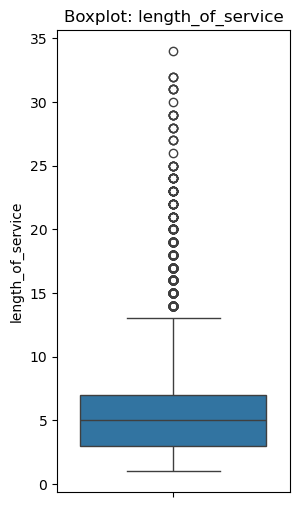

Variable: length_of_service, Upper Boundary: 13.0, Lower Boundary: -3.0


In [55]:
upper, lower = find_boundaries(HR_new, 'length_of_service')
print(f"Variable: length_of_service, Upper Boundary: {upper}, Lower Boundary: {lower}")

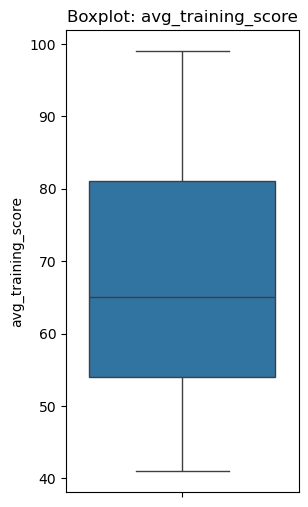

Variable: avg_training_score, Upper Boundary: 121.5, Lower Boundary: 13.5


In [56]:
upper, lower = find_boundaries(HR_new, 'avg_training_score')
print(f"Variable: avg_training_score, Upper Boundary: {upper}, Lower Boundary: {lower}")

#### Transform Numerical Columns

In [58]:
# plot histogram, QQ-Plot & Boxplot

def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.suptitle(f"{variable}")
      
    plt.subplot(1, 3, 1)
    df[variable].hist(bins=30)
    plt.title("Histogram")

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title("QQ-Plot")
    
    plt.subplot(1,3,3)
    sns.boxplot(y=variable, data=df)
    plt.title("Boxplot")
    
    plt.show()

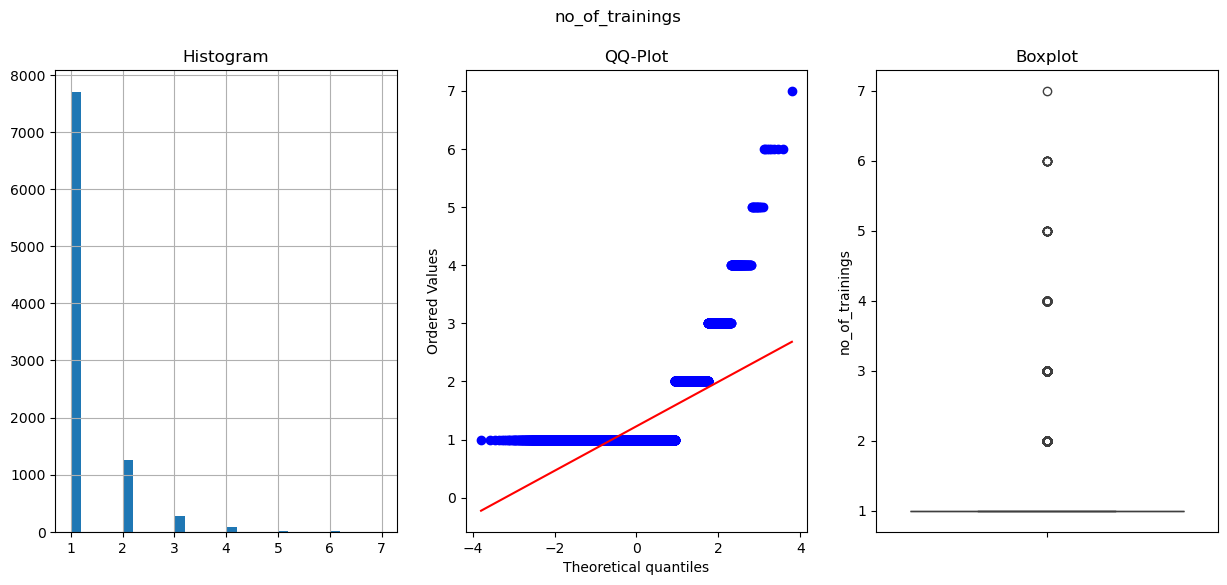

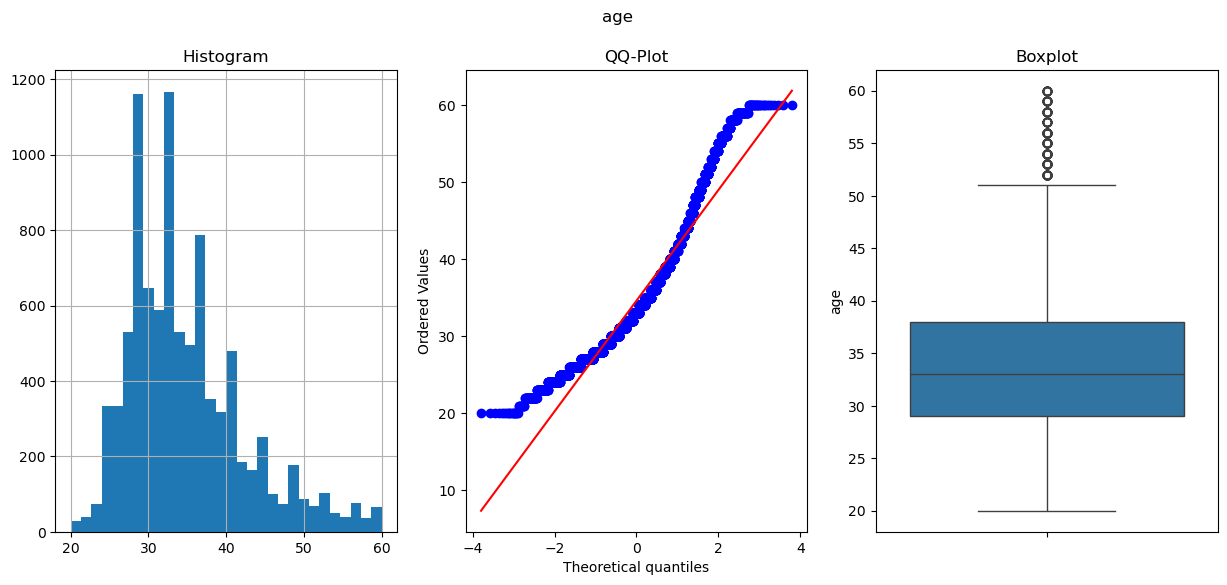

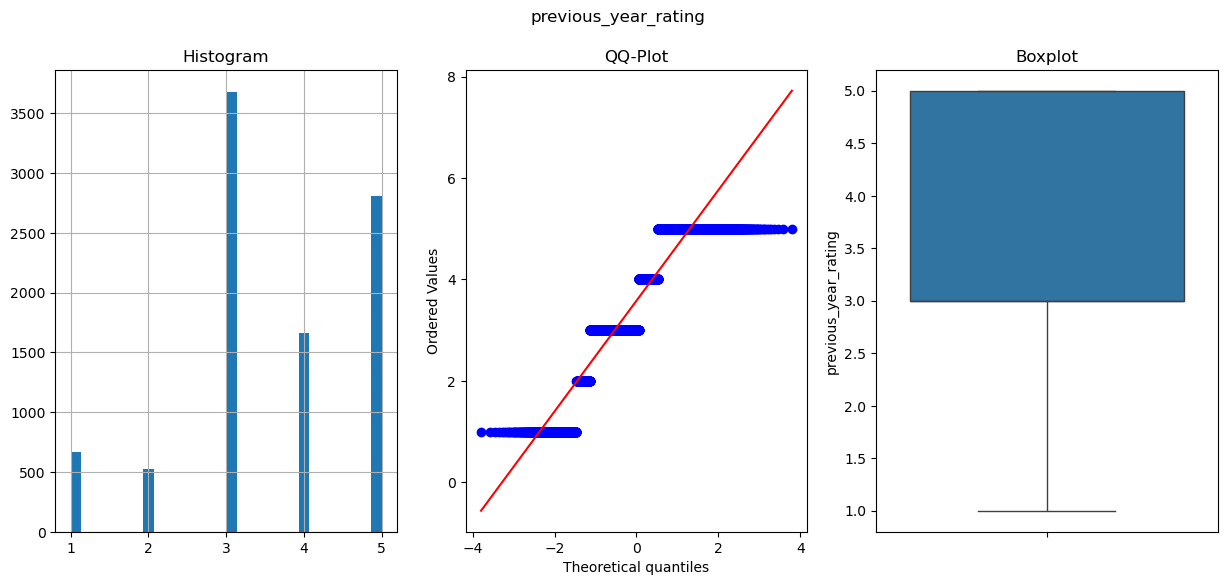

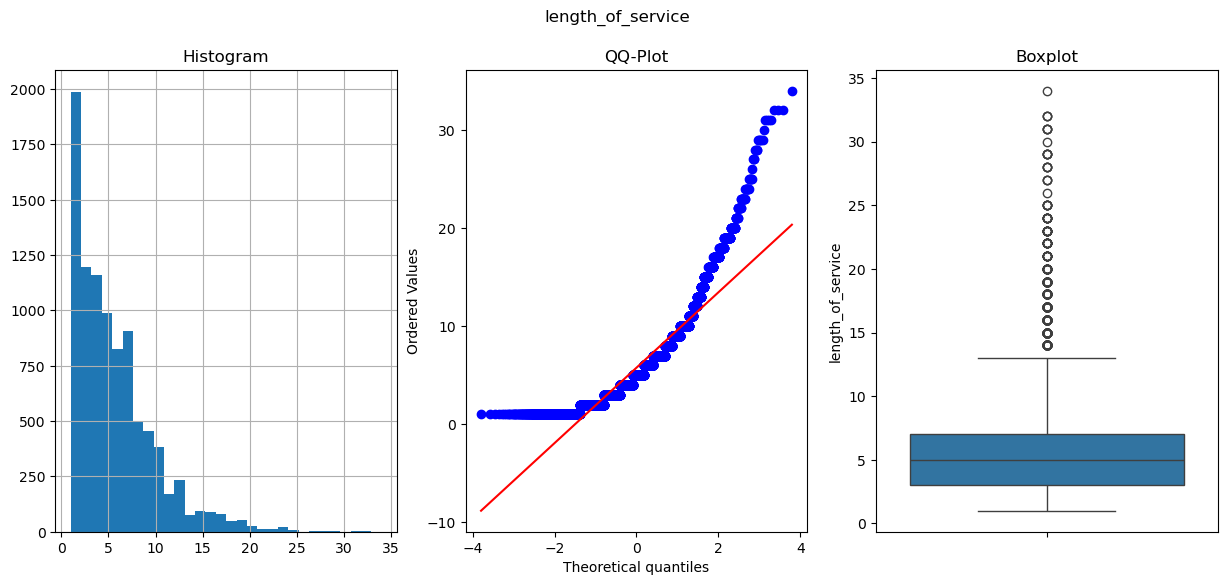

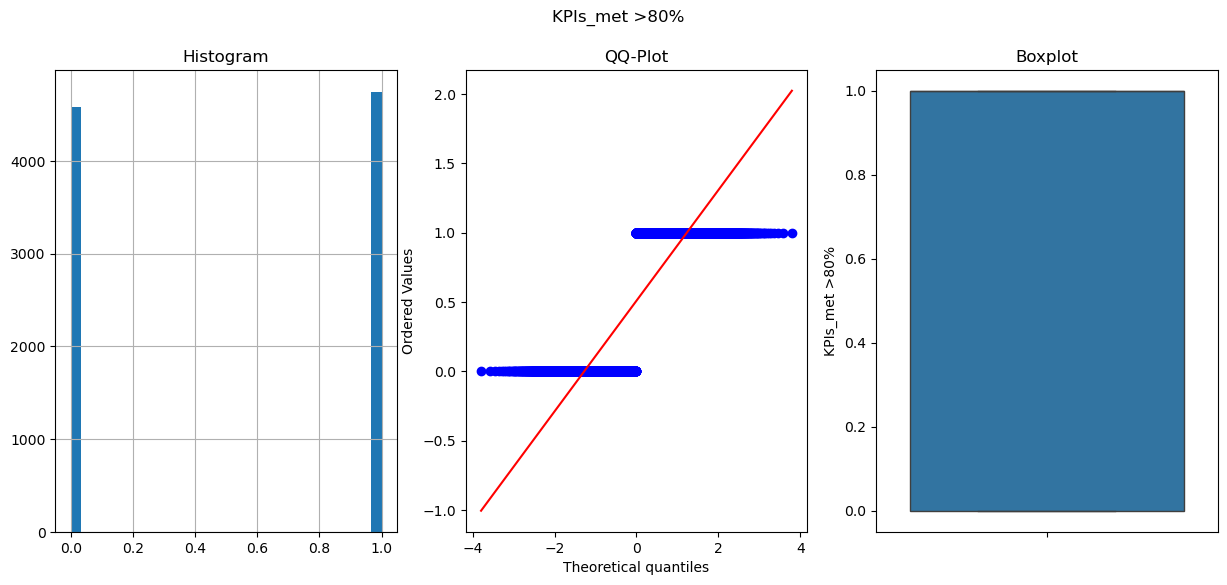

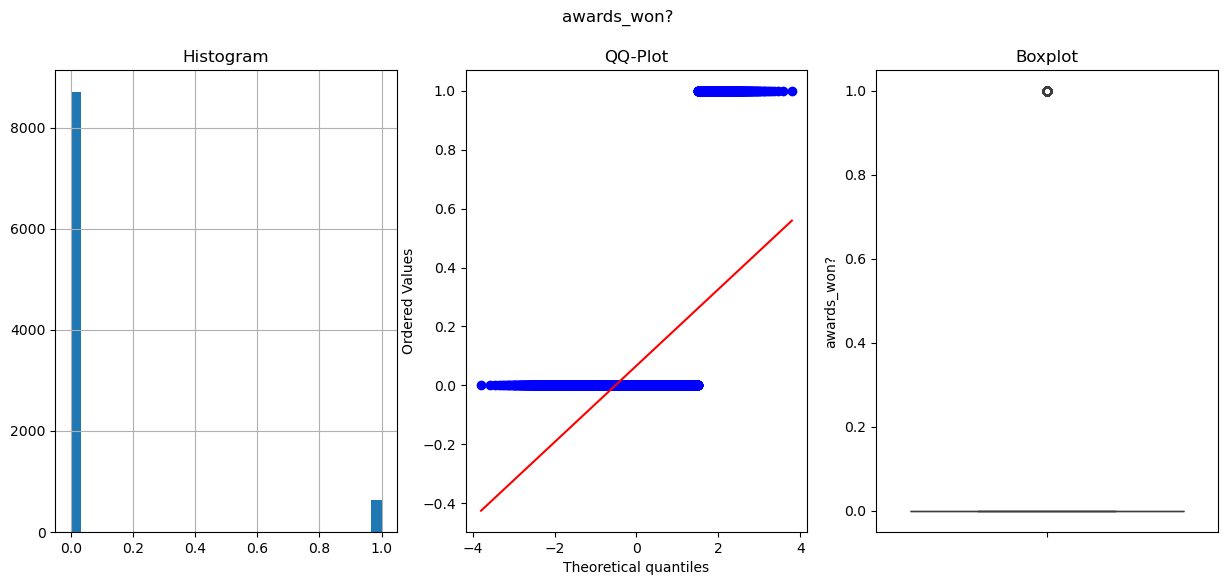

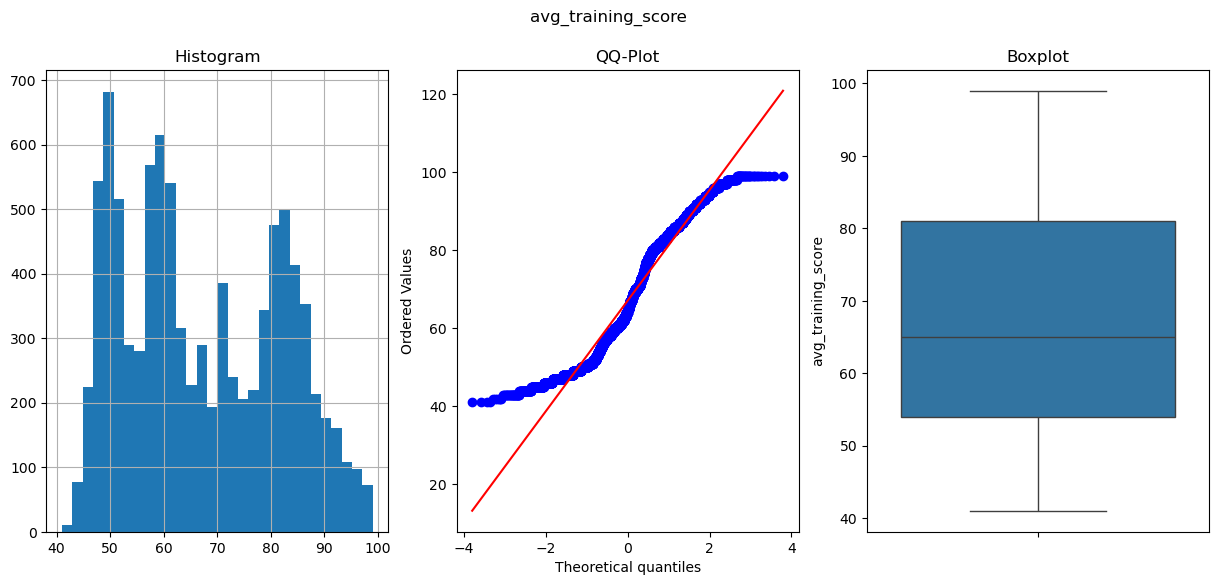

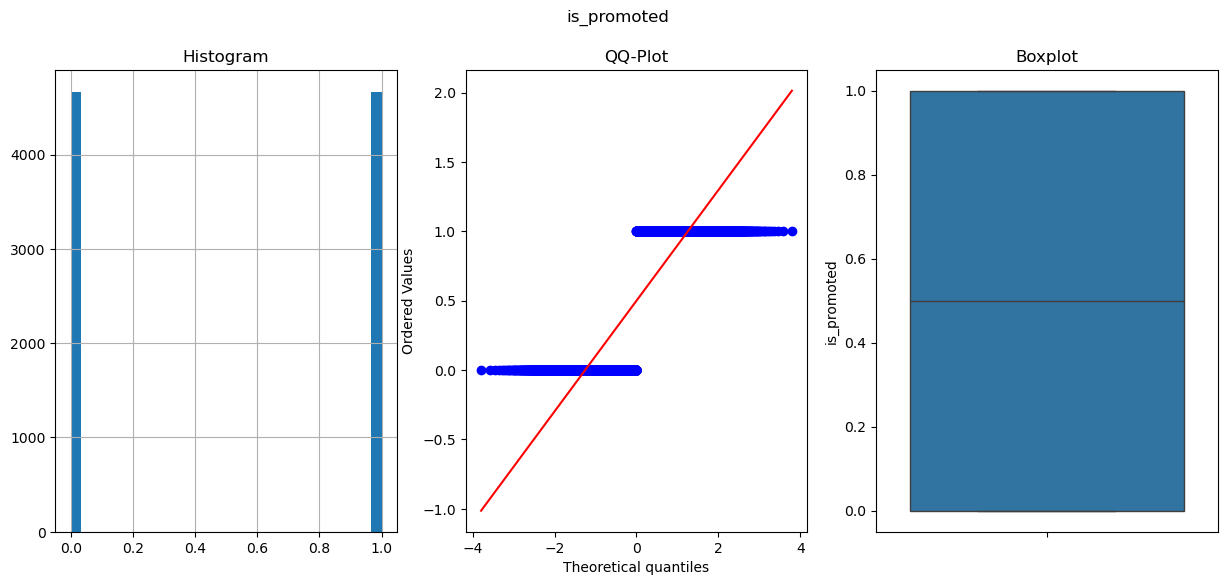

In [59]:
for cols in num_cols:
    diagnostic_plots(HR_new, cols)

In [60]:
values = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']

In [61]:
# initialize the transformer: no_of_trainings
lt = LogTransformer(variables= ['no_of_trainings'])

lt.fit(HR_new)

HR_Data = lt.transform(HR_new)

In [62]:
# Yeo_johnson Transformation: age
HR_new['age'], param = stats.yeojohnson(HR_new['age']) 

print('Optimal λ (age): ', param)

Optimal λ (age):  -0.9929407920254427


In [63]:
# Box-Cox Transformation: previous_year_rating
HR_new['previous_year_rating'], param = stats.boxcox(HR_new['previous_year_rating']) 

print('Optimal λ: ', param)

Optimal λ:  1.3095906401608364


In [64]:
# Yeo_johnson Transformation: length_of_service
HR_new['length_of_service'], param = stats.yeojohnson(HR_new['length_of_service']) 
    
print('Optimal λ (length_of_service): ', param)

Optimal λ (length_of_service):  -0.033668913734590106


In [65]:
# Logarithm Transformer: avg_training_score
lt = LogTransformer(variables= ['avg_training_score'])

lt.fit(HR_new)

HR_new = lt.transform(HR_new)

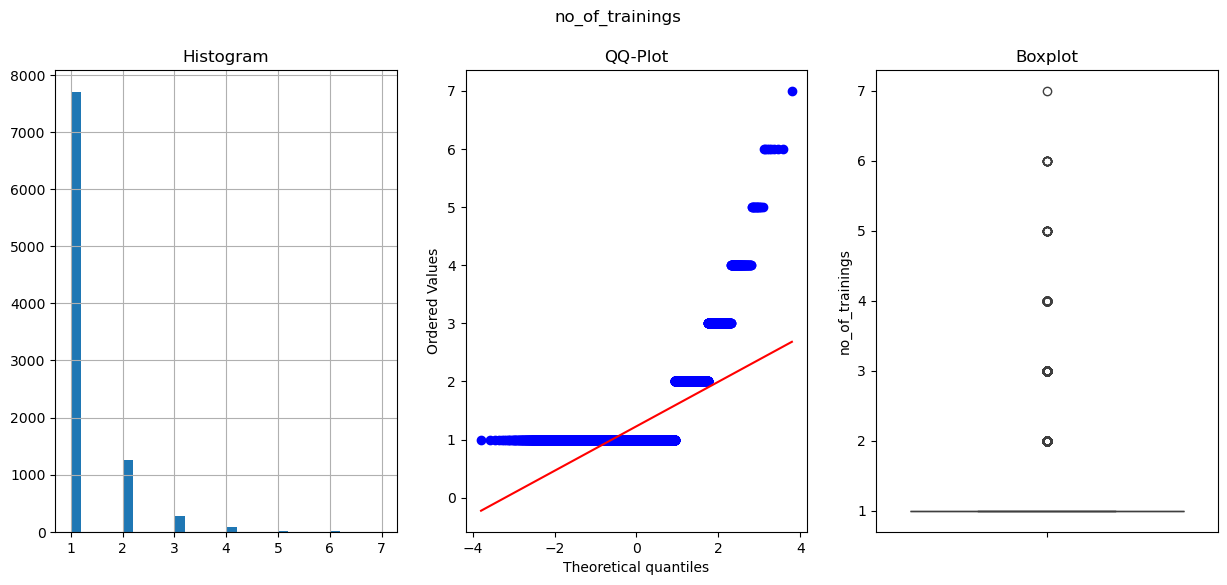

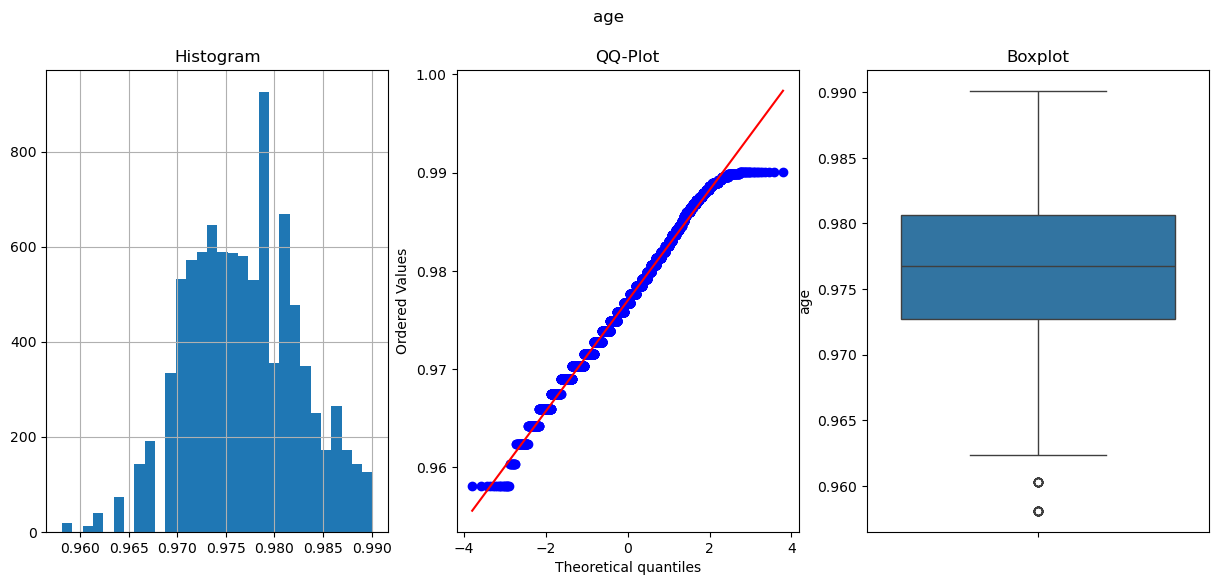

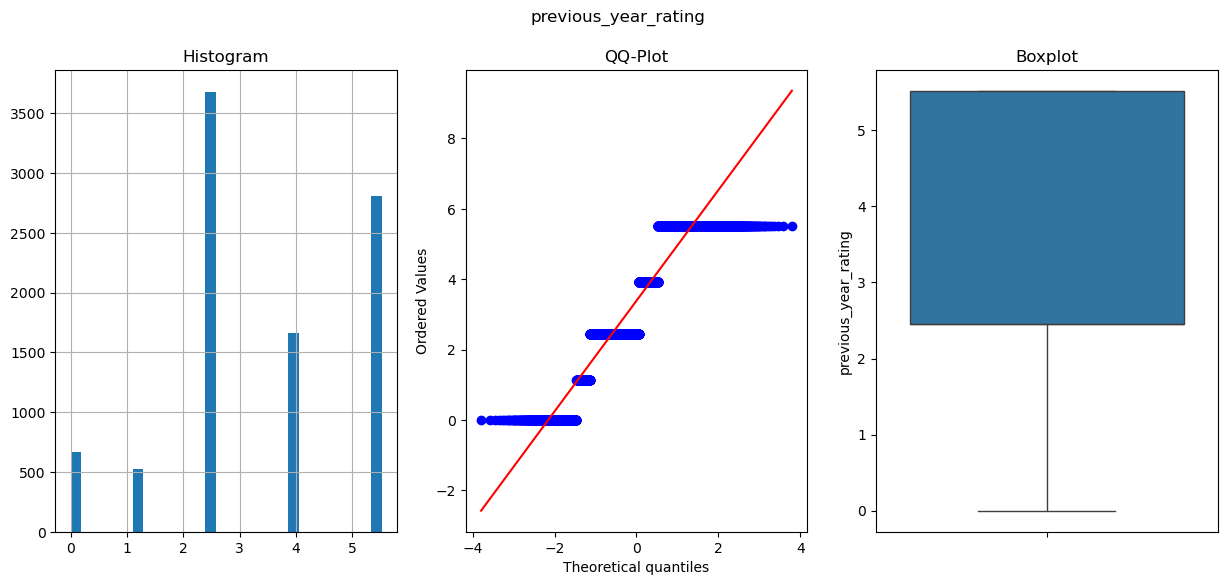

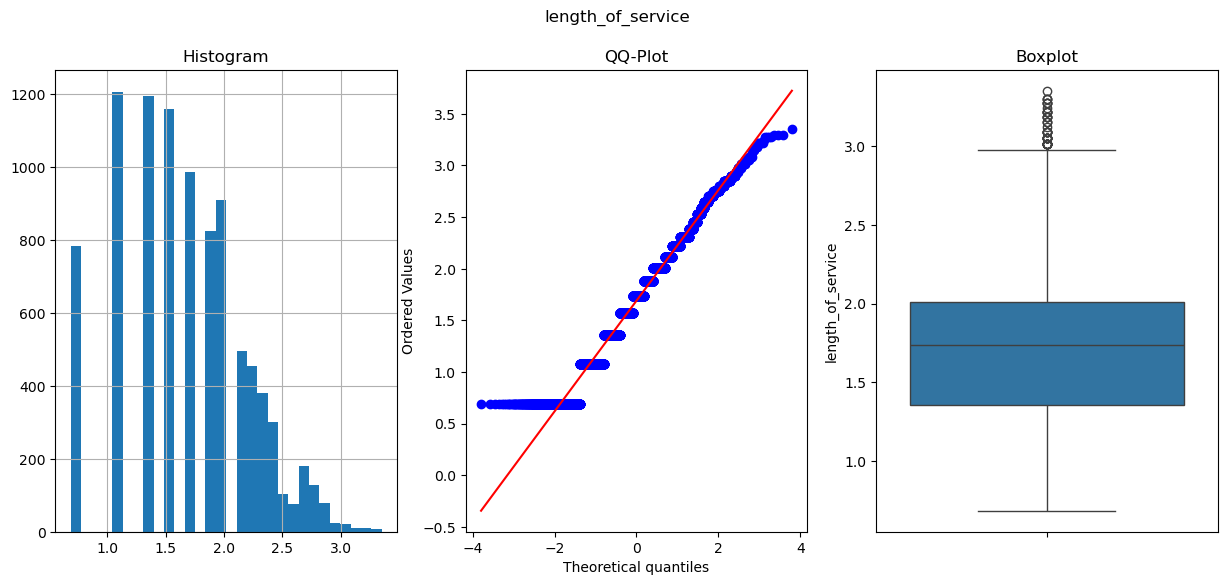

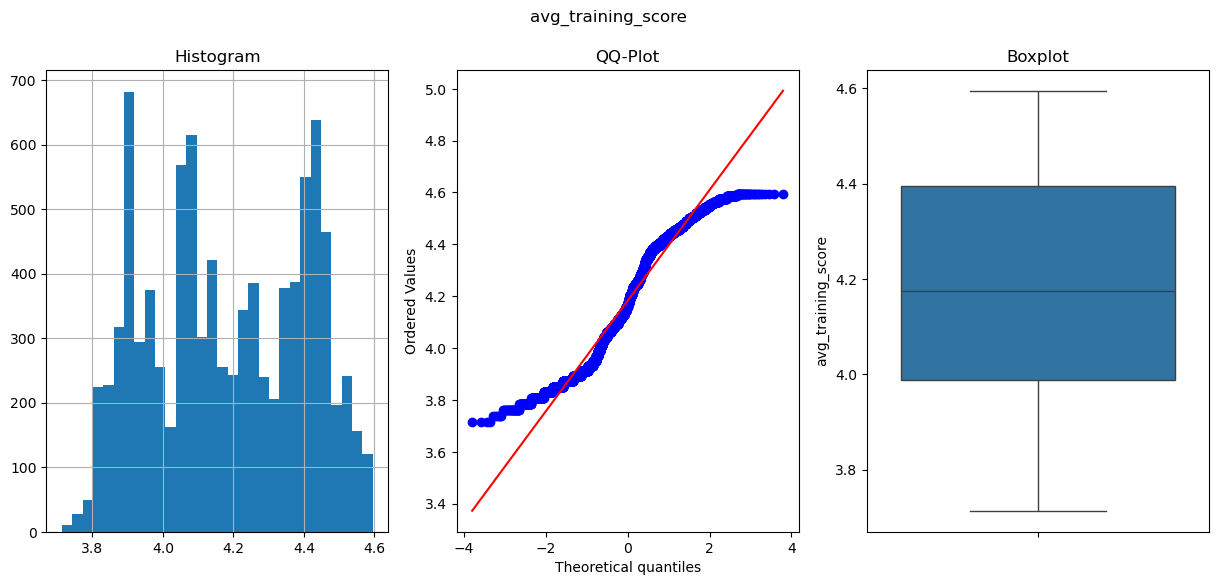

In [66]:
for cols in values:
    diagnostic_plots(HR_new, cols)

#### Tested Codes

- Yeo Johnson

for cols in values:
    
    HR_new[cols], param = stats.yeojohnson(HR_new[cols]) 
    
    print(f'Optimal λ {cols}: ', param)

    diagnostic_plots(HR_new, cols)

- Box Cox

for cols in values:

    HR_new[cols], param = stats.boxcox(HR_new[cols]) 

    print('Optimal λ: ', param)
    
    diagnostic_plots(HR_new, cols)

- Logarithmic Transformation

    lt = LogTransformer(variables = values)
    
    lt.fit(HR_new)
    
    HR_new = lt.transform(HR_new)
    
    for cols in values:
        diagnostic_plots(HR_new, cols)

- Power Transformation

    et = PowerTransformer(variables = values , exp = 0.3)
    
    et.fit(HR_new)
    
    HR_new = et.transform(HR_new)
    
    for cols in values:
        diagnostic_plots(HR_new, cols)

- Root Transformation
  
for cols in values:

    et = PowerTransformer(variables = [cols], exp=1/3) # for cube root
    
    et.fit(HR_new)

    HR_Data = et.transform(HR_new)
      
    diagnostic_plots(HR_new, cols)

#### Transform Categorical Columns

In [74]:
HR_new[cat_cols].head()

department     region         education gender recruitment_channel
11  Sales & Marketing   region_7        Bachelor's      f            sourcing
39  Sales & Marketing  region_28        Bachelor's      m            sourcing
60  Sales & Marketing   region_4  Master's & above      m               other
66            Finance  region_22        Bachelor's      m               other
67  Sales & Marketing  region_22        Bachelor's      m            sourcing

In [75]:
from feature_engine.encoding import OrdinalEncoder

# Instantiate the encoder with 'arbitrary' encoding
encoder = OrdinalEncoder(encoding_method='ordered')

# Fit and transform the categorical columns
HR_encoded = encoder.fit_transform(HR_new, HR_new['is_promoted'])

In [76]:
# Verify the transformation
HR_encoded[cat_cols].head()

department  region  education  gender  recruitment_channel
11           3      26          0       1                    1
39           3      27          0       0                    1
60           3      33          2       0                    0
66           4      28          0       0                    0
67           3      28          0       0                    1

#### Train Test Split

In [78]:
X = HR_encoded.drop(['is_promoted'], axis=1)
y = HR_encoded['is_promoted']

In [79]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [80]:
print(y_train.value_counts())

y_train.value_counts()/len(y_train)

is_promoted
0    3268
1    3267
Name: count, dtype: int64


is_promoted
0    0.500077
1    0.499923
Name: count, dtype: float64

In [81]:
print(y_test.value_counts())

y_test.value_counts()/len(y_test)

is_promoted
1    1401
0    1400
Name: count, dtype: int64


is_promoted
1    0.500179
0    0.499821
Name: count, dtype: float64

In [82]:
X_train.head()

department  region  education  gender  recruitment_channel  \
39230           8      15          0       0                    0   
6053            5      28          0       1                    0   
36296           7       9          0       0                    0   
53277           7       8          0       1                    1   
21660           3      33          2       1                    1   

       no_of_trainings       age  previous_year_rating  length_of_service  \
39230                2  0.970285              2.455232           1.566609   
6053                 1  0.973825              0.000000           1.738785   
36296                1  0.975828              3.927955           2.117919   
53277                1  0.973825              2.455232           0.685122   
21660                1  0.977604              2.455232           1.566609   

       KPIs_met >80%  awards_won?  avg_training_score  
39230              1            0            4.394449  
6053               1            0            4.077537  
36296              1            0            4.477337  
53277              1            0            4.234107  
21660              1            0            3.931826

In [83]:
X_test.head()

department  region  education  gender  recruitment_channel  \
6776            5      17          0       0                    0   
21181           7      21          0       1                    1   
51808           3       0          2       0                    0   
24227           8      21          1       0                    0   
45932           6      26          2       0                    0   

       no_of_trainings       age  previous_year_rating  length_of_service  \
6776                 2  0.970285              2.455232           1.566609   
21181                2  0.973825              5.520299           1.566609   
51808                1  0.974858              5.520299           2.008318   
24227                2  0.965899              2.455232           0.685122   
45932                1  0.977604              5.520299           2.008318   

       KPIs_met >80%  awards_won?  avg_training_score  
6776               0            0            4.262680  
21181              1            0            4.174387  
51808              0            0            3.891820  
24227              1            0            4.382027  
45932              0            0            4.406719

#### Train Model

In [85]:
# Create the model "lg"
lg = LogisticRegression(solver='lbfgs', # optimization solver
                        max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver will
# run enough iterations to let the model converge

# Fit the model to the training set
lg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [86]:
# print out the model coefficients and intercept
print(lg.coef_)
print(lg.intercept_)

[[-0.2500907   0.03803484  0.05170619  0.11847898  0.02554242 -0.21439891
  -0.31896701  0.22142353  0.04079157  1.67146702  1.87897337  4.61274052]]
[-20.13220639]


In [87]:
# calculated the training accuracy
print(lg.score(X_train, y_train), '(Train Accuracy)')

0.7265493496557001 (Train Accuracy)


In [88]:
# Calculated the fitted values for training set
y_fitted = lg.predict(X_train) # returns 0 or 1
y_fitted_prob = lg.predict_proba(X_train)[:,0] # returns probabilities

In [89]:
print(y_fitted)
print(y_fitted_prob)

[1 0 1 ... 0 1 0]
[0.43812499 0.54319338 0.22895678 ... 0.68640213 0.25955351 0.83752925]


#### Test Model

In [91]:
# calculated the testing accuracy
print(lg.score(X_test, y_test), '(Test Accuracy)')

0.7329525169582292 (Test Accuracy)


#### Model Summary

In [93]:
# The lg model refers to sklearn model and lg2 model refers to statsmodel.api model

# Create another model lg2 using statsmodel.api: the Logit method and fit function
lg2 = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.517667
         Iterations 6


In [94]:
# Print out the Model Summary
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6522
Method:                           MLE   Df Model:                           12
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.2532
Time:                        00:53:05   Log-Likelihood:                -3383.0
converged:                       True   LL-Null:                       -4529.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.3835      7.272     -0.603      0.547     -18.637       9.870
department              -0.2665      0.022    -12.069      0.000      -0.310      -0.223
region                   0.0379      0.004      9.166      0.000       0.030       0.046
education                0.0770      0.036      2.138      0.033       0.006       0.148
gender                   0.1260      0.065      1.928      0.054      -0.002       0.254
recruitment_channel      0.0206      0.054      0.383      0.702      -0.085       0.126
no_of_trainings         -0.2234      0.057     -3.892      0.000      -0.336      -0.111
age                    -17.4835      7.436     -2.351      0.019     -32.058      -2.909
previous_year_rating     0.2213      0.019     11.816      0.000       0.185       0.258
length_of_service        0.1527      0.074      2.068      0.039       0.008       0.297
KPIs_met >80%            1.7005      0.064     26.616      0.000       1.575       1.826
awards_won?              1.9406      0.170     11.421      0.000       1.608       2.274
avg_training_score       4.8270      0.226     21.357      0.000       4.384       5.270
========================================================================================
"""

#### Equal Width Discretization- Choose to not proceed

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

disc.fit(X_train)

disc.bin_edges_

X_train = disc.transform(X_train)

X_train_bin = pd.DataFrame(X_train)

X_train_bin.head()

X_test = disc.transform(X_test)

X_test_bin = pd.DataFrame(X_test)

X_test_bin.head()

X_train_bin.columns = X.columns
X_test_bin.columns = X.columns

for cols in X_train_bin.columns:

    t1 = X_train_bin.groupby([cols])[cols].count() / len(X_train_bin)
    t2 = X_test_bin.groupby([cols])[cols].count() / len(X_test_bin)
    
    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=45)
    plt.ylabel('Number of observations per bin')
    plt.title (f'Variable: {cols}')

#### Standardization

In [103]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([ 4.93006886, 21.06993114,  0.59770467,  0.30160673,  0.47620505,
        1.22616679,  0.97692627,  3.37702908,  1.69209292,  0.50879878,
        0.06840092,  4.18298793])

In [105]:
# the scaler stores the standard deviation deviation of the features,
# learned from train set

scaler.scale_

array([2.06167497e+00, 7.48968218e+00, 9.07282917e-01, 4.58955457e-01,
       5.50168630e-01, 5.58405956e-01, 5.60707003e-03, 1.69522873e+00,
       5.37935590e-01, 4.99922576e-01, 2.52432630e-01, 2.18544228e-01])

In [106]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#### Comparision on Before & After Transformation

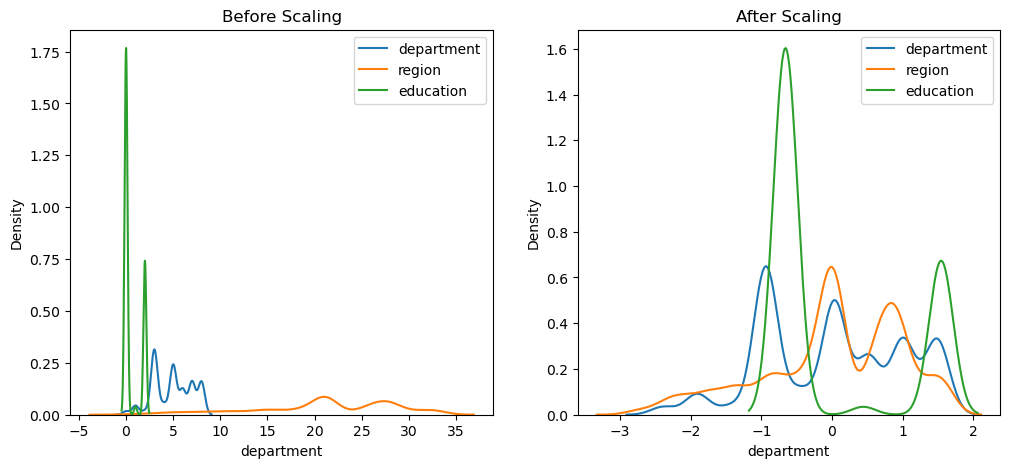

In [108]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['department'], ax=ax1, label ='department')
sns.kdeplot(X_train['region'], ax=ax1, label ='region')
sns.kdeplot(X_train['education'], ax=ax1, label ='education')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['department'], ax=ax2, label ='department')
sns.kdeplot(X_train_scaled['region'], ax=ax2, label ='region')
sns.kdeplot(X_train_scaled['education'], ax=ax2, label ='education')
ax2.legend()
plt.show()

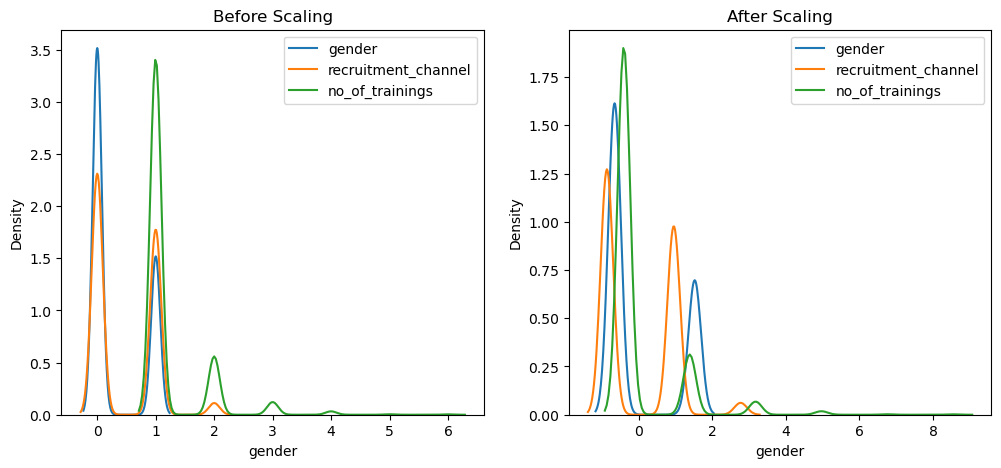

In [109]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['gender'], ax=ax1, label ='gender')
sns.kdeplot(X_train['recruitment_channel'], ax=ax1, label ='recruitment_channel')
sns.kdeplot(X_train['no_of_trainings'], ax=ax1, label ='no_of_trainings')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['gender'], ax=ax2, label ='gender')
sns.kdeplot(X_train_scaled['recruitment_channel'], ax=ax2, label ='recruitment_channel')
sns.kdeplot(X_train_scaled['no_of_trainings'], ax=ax2, label ='no_of_trainings')
ax2.legend()
plt.show()

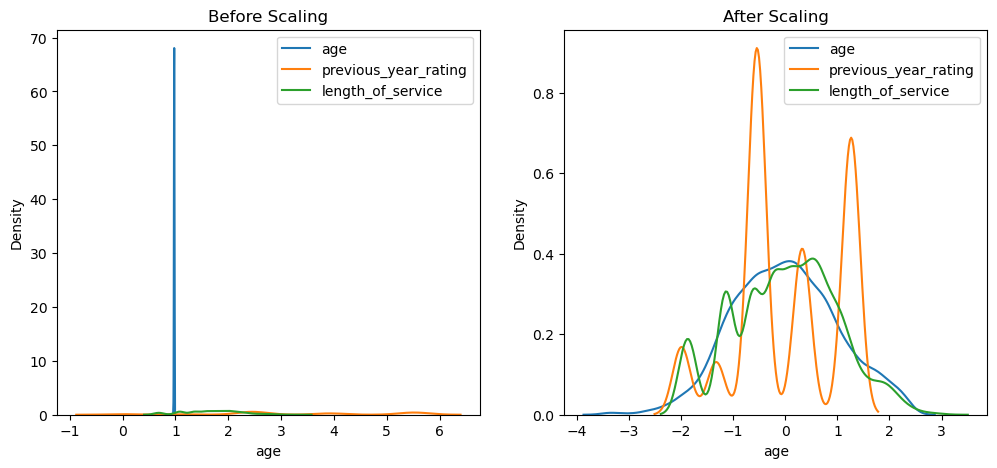

In [110]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['age'], ax=ax1, label ='age')
sns.kdeplot(X_train['previous_year_rating'], ax=ax1, label ='previous_year_rating')
sns.kdeplot(X_train['length_of_service'], ax=ax1, label ='length_of_service')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['age'], ax=ax2, label ='age')
sns.kdeplot(X_train_scaled['previous_year_rating'], ax=ax2, label ='previous_year_rating')
sns.kdeplot(X_train_scaled['length_of_service'], ax=ax2, label ='length_of_service')
ax2.legend()
plt.show()

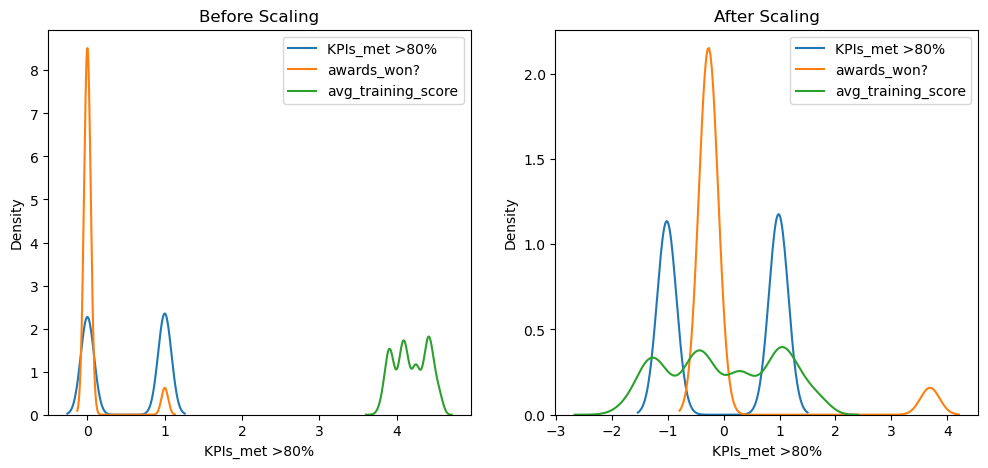

In [111]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['KPIs_met >80%'], ax=ax1, label ='KPIs_met >80%')
sns.kdeplot(X_train['awards_won?'], ax=ax1, label ='awards_won?')
sns.kdeplot(X_train['avg_training_score'], ax=ax1, label ='avg_training_score')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['KPIs_met >80%'], ax=ax2, label ='KPIs_met >80%')
sns.kdeplot(X_train_scaled['awards_won?'], ax=ax2, label ='awards_won?')
sns.kdeplot(X_train_scaled['avg_training_score'], ax=ax2, label ='avg_training_score')
ax2.legend()
plt.show()

#### Train Model

In [113]:
# Create the model "lg"
lg = LogisticRegression(solver='lbfgs', # optimization solver
                        max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver will
# run enough iterations to let the model converge

# Fit the model to the training set
lg.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [114]:
# print out the model coefficients and intercept
print(lg.coef_)
print(lg.intercept_)

[[-0.54629649  0.2834727   0.06994841  0.05724268  0.01142236 -0.12444023
  -0.09869821  0.37490753  0.08261706  0.84835325  0.4890963   1.0508611 ]]
[0.03484174]


In [115]:
# calculated the training accuracy
print(lg.score(X_train_scaled, y_train), '(Train Accuracy)')

0.7247130833970926 (Train Accuracy)


In [116]:
# Calculated the fitted values for training set
y_fitted= lg.predict(X_train_scaled) # returns 0 or 1
y_fitted_prob = lg.predict_proba(X_train_scaled)[:,0] # returns probabilities

In [117]:
print(y_fitted)
print(y_fitted_prob)

[1 0 1 ... 0 1 0]
[0.41648826 0.5326953  0.21260389 ... 0.69408293 0.26341419 0.84036372]


#### Test Model

In [119]:
# calculated the testing accuracy
print(lg.score(X_test_scaled, y_test), '(Test Accuracy)')

0.7333095323098894 (Test Accuracy)


In [120]:
# If using pandas DataFrame for X_train_scaled and Series for y_train
X_train_scaled = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

#### Model Summary

In [122]:
# The lg model refers to sklearn model and lg2 model refers to statsmodel.api model

# Create another model lg2 using statsmodel.api: the Logit method and fit function
lg2 = sm.Logit(y_train, sm.add_constant(X_train_scaled)).fit()

Optimization terminated successfully.
         Current function value: 0.517667
         Iterations 6


In [123]:
# Print out the Model Summary
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6522
Method:                           MLE   Df Model:                           12
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.2532
Time:                        00:53:08   Log-Likelihood:                -3383.0
converged:                       True   LL-Null:                       -4529.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0354      0.031      1.157      0.247      -0.025       0.095
department              -0.5495      0.046    -12.069      0.000      -0.639      -0.460
region                   0.2837      0.031      9.166      0.000       0.223       0.344
education                0.0699      0.033      2.138      0.033       0.006       0.134
gender                   0.0578      0.030      1.928      0.054      -0.001       0.117
recruitment_channel      0.0113      0.030      0.383      0.702      -0.047       0.069
no_of_trainings         -0.1248      0.032     -3.892      0.000      -0.188      -0.062
age                     -0.0980      0.042     -2.351      0.019      -0.180      -0.016
previous_year_rating     0.3752      0.032     11.816      0.000       0.313       0.437
length_of_service        0.0822      0.040      2.068      0.039       0.004       0.160
KPIs_met >80%            0.8501      0.032     26.616      0.000       0.788       0.913
awards_won?              0.4899      0.043     11.421      0.000       0.406       0.574
avg_training_score       1.0549      0.049     21.357      0.000       0.958       1.152
========================================================================================
"""

### 1.3 Correlation Analysis <a id="part1.3"></a>

Investigate the relationships between different features/variables. Which features are likely helpful for making predications? Did you create any new features/variables? Did you drop any features/variables and why? 

#### Drop Features 

In [126]:
X_train_drop = X_train_scaled.drop('recruitment_channel', axis = 1)
X_test_drop = X_test_scaled.drop('recruitment_channel', axis = 1)

#### Train Model

In [128]:
# Create the model "lg"
lg = LogisticRegression(solver='lbfgs', # optimization solver
                        max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver will
# run enough iterations to let the model converge

# Fit the model to the training set
lg.fit(X_train_drop,y_train)

LogisticRegression(max_iter=10000)

In [129]:
# print out the model coefficients and intercept
print(lg.coef_)
print(lg.intercept_)

[[-0.54641381  0.28380057  0.06986226  0.05703963 -0.12465751 -0.09929919
   0.37495685  0.08276967  0.84864552  0.48914263  1.05106995]]
[0.03495353]


In [130]:
# calculated the training accuracy
print(lg.score(X_train_drop, y_train), '(Train Accuracy)')

0.7248661055853098 (Train Accuracy)


In [131]:
# Calculated the fitted values for training set
y_fitted = lg.predict(X_train_drop) # returns 0 or 1
y_fitted_prob = lg.predict_proba(X_train_drop)[:,0] # returns probabilities

In [132]:
print(y_fitted)
print(y_fitted_prob)

[1 0 1 ... 0 1 0]
[0.41392096 0.53006696 0.21086127 ... 0.69206617 0.26159461 0.83923626]


#### Test Model

In [134]:
# calculated the testing accuracy
print(lg.score(X_test_drop, y_test), '(Test Accuracy)')

0.7340235630132096 (Test Accuracy)


#### Model Summary

In [136]:
# The lg model refers to sklearn model and lg2 model refers to statsmodel.api model

# Create another model lg2 using statsmodel.api: the Logit method and fit function
lg2 = sm.Logit(y_train, sm.add_constant(X_train_drop)).fit()

Optimization terminated successfully.
         Current function value: 0.517678
         Iterations 6


In [137]:
# Print out the Model Summary
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6523
Method:                           MLE   Df Model:                           11
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.2531
Time:                        00:53:08   Log-Likelihood:                -3383.0
converged:                       True   LL-Null:                       -4529.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0355      0.031      1.161      0.246      -0.024       0.095
department              -0.5496      0.046    -12.071      0.000      -0.639      -0.460
region                   0.2840      0.031      9.180      0.000       0.223       0.345
education                0.0698      0.033      2.135      0.033       0.006       0.134
gender                   0.0576      0.030      1.921      0.055      -0.001       0.116
no_of_trainings         -0.1250      0.032     -3.900      0.000      -0.188      -0.062
age                     -0.0986      0.042     -2.367      0.018      -0.180      -0.017
previous_year_rating     0.3752      0.032     11.818      0.000       0.313       0.437
length_of_service        0.0823      0.040      2.072      0.038       0.004       0.160
KPIs_met >80%            0.8504      0.032     26.633      0.000       0.788       0.913
awards_won?              0.4899      0.043     11.421      0.000       0.406       0.574
avg_training_score       1.0551      0.049     21.361      0.000       0.958       1.152
========================================================================================
"""

#### Creation of Features: dept_gender_interaction

Gender & Department: Analyze if specific departments prefer certain genders for promotion

In [139]:
X_train_drop['dept_gender'] = X_train_drop['department'] * X_train_drop['gender']
X_test_drop['dept_gender'] = X_test_drop['department'] * X_test_drop['gender']

#### Train Model

In [141]:
# Create the model "lg"
lg = LogisticRegression(solver='lbfgs', # optimization solver
                        max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver will
# run enough iterations to let the model converge

# Fit the model to the training set
lg.fit(X_train_drop,y_train)

LogisticRegression(max_iter=10000)

In [142]:
# print out the model coefficients and intercept
print(lg.coef_)
print(lg.intercept_)

[[-0.54899524  0.2840829   0.07130379  0.04827433 -0.12415011 -0.09735625
   0.37567293  0.08139693  0.84827765  0.48811619  1.05365045  0.06107494]]
[0.02742189]


In [143]:
# calculated the training accuracy
print(lg.score(X_train_drop, y_train), '(Train Accuracy)')

0.7267023718439174 (Train Accuracy)


In [144]:
# Calculated the fitted values for training set
y_fitted = lg.predict(X_train_drop) # returns 0 or 1
y_fitted_prob = lg.predict_proba(X_train_drop)[:,0] # returns probabilities

In [145]:
print(y_fitted)
print(y_fitted_prob)

[1 0 1 ... 0 1 0]
[0.42997142 0.53570432 0.2182951  ... 0.69511372 0.26444284 0.84182932]


#### Test Model

In [147]:
# calculated the testing accuracy
print(lg.score(X_test_drop, y_test), '(Test Accuracy)')

0.7329525169582292 (Test Accuracy)


#### Model Summary

In [149]:
# The lg model refers to sklearn model and lg2 model refers to statsmodel.api model

# Create another model lg2 using statsmodel.api: the Logit method and fit function
lg2 = sm.Logit(y_train, sm.add_constant(X_train_drop)).fit()

Optimization terminated successfully.
         Current function value: 0.517357
         Iterations 6


In [150]:
# Print out the Model Summary
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6522
Method:                           MLE   Df Model:                           12
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.2536
Time:                        00:53:09   Log-Likelihood:                -3380.9
converged:                       True   LL-Null:                       -4529.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0278      0.031      0.901      0.368      -0.033       0.088
department              -0.5521      0.046    -12.089      0.000      -0.642      -0.463
region                   0.2843      0.031      9.190      0.000       0.224       0.345
education                0.0713      0.033      2.179      0.029       0.007       0.135
gender                   0.0486      0.030      1.600      0.110      -0.011       0.108
no_of_trainings         -0.1244      0.032     -3.882      0.000      -0.187      -0.062
age                     -0.0970      0.042     -2.327      0.020      -0.179      -0.015
previous_year_rating     0.3758      0.032     11.832      0.000       0.314       0.438
length_of_service        0.0813      0.040      2.045      0.041       0.003       0.159
KPIs_met >80%            0.8499      0.032     26.601      0.000       0.787       0.912
awards_won?              0.4891      0.043     11.403      0.000       0.405       0.573
avg_training_score       1.0575      0.050     21.361      0.000       0.960       1.154
dept_gender              0.0613      0.030      2.045      0.041       0.003       0.120
========================================================================================
"""

#### Creation of Features: perf_train

KPIs_met >80% & avg_training_score: Employees with high ratings and high average training score may have a disproportionately higher likelihood of promotion.

In [152]:
X_train_drop['perf_train'] = X_train_drop['KPIs_met >80%'] * X_train_drop['avg_training_score']
X_test_drop['perf_train'] = X_test_drop['KPIs_met >80%'] * X_test_drop['avg_training_score']

#### Train Model

In [154]:
# Create the model "lg"
lg = LogisticRegression(solver='lbfgs', # optimization solver
                        max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver will
# run enough iterations to let the model converge

# Fit the model to the training set
lg.fit(X_train_drop,y_train)

LogisticRegression(max_iter=10000)

In [155]:
# print out the model coefficients and intercept
print(lg.coef_)
print(lg.intercept_)

[[-0.55055429  0.28449471  0.07310079  0.06041934 -0.11361014 -0.08966049
   0.3659979   0.0767734   0.89506431  0.47450266  1.14080097  0.05479468
  -0.50229937]]
[-0.08426502]


In [156]:
# calculated the training accuracy
print(lg.score(X_train_drop, y_train), '(Train Accuracy)')

0.7378729915837796 (Train Accuracy)


In [157]:
# Calculated the fitted values for training set
y_fitted = lg.predict(X_train_drop) # returns 0 or 1
y_fitted_prob = lg.predict_proba(X_train_drop)[:,0] # returns probabilities

In [158]:
print(y_fitted)
print(y_fitted_prob)

[0 1 1 ... 0 1 0]
[0.54168283 0.49533866 0.34379548 ... 0.76126687 0.24892257 0.88532123]


#### Test Model

In [160]:
# calculated the testing accuracy
print(lg.score(X_test_drop, y_test), '(Test Accuracy)')

0.7400928239914316 (Test Accuracy)


#### Model Summary

In [162]:
# The lg model refers to sklearn model and lg2 model refers to statsmodel.api model

# Create another model lg2 using statsmodel.api: the Logit method and fit function
lg2 = sm.Logit(y_train, sm.add_constant(X_train_drop)).fit()

Optimization terminated successfully.
         Current function value: 0.500717
         Iterations 6


In [163]:
# Print out the Model Summary
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6521
Method:                           MLE   Df Model:                           13
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.2776
Time:                        00:53:10   Log-Likelihood:                -3272.2
converged:                       True   LL-Null:                       -4529.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0845      0.033     -2.548      0.011      -0.149      -0.019
department              -0.5538      0.045    -12.215      0.000      -0.643      -0.465
region                   0.2849      0.031      9.128      0.000       0.224       0.346
education                0.0730      0.033      2.189      0.029       0.008       0.138
gender                   0.0612      0.032      1.930      0.054      -0.001       0.123
no_of_trainings         -0.1140      0.032     -3.539      0.000      -0.177      -0.051
age                     -0.0888      0.043     -2.084      0.037      -0.172      -0.005
previous_year_rating     0.3664      0.033     11.267      0.000       0.303       0.430
length_of_service        0.0763      0.040      1.890      0.059      -0.003       0.156
KPIs_met >80%            0.8973      0.033     26.799      0.000       0.832       0.963
awards_won?              0.4752      0.044     10.835      0.000       0.389       0.561
avg_training_score       1.1457      0.051     22.447      0.000       1.046       1.246
dept_gender              0.0553      0.031      1.776      0.076      -0.006       0.116
perf_train              -0.5042      0.036    -14.160      0.000      -0.574      -0.434
========================================================================================
"""

#### Creation of Features: Choose to not proceed

X_train_drop['perf_award'] = X_train_drop['KPIs_met >80%'] * X_train_drop['awards_won?']
X_test_drop['perf_award'] = X_test_drop['KPIs_met >80%'] * X_test_drop['awards_won?']

### 1.4 Export the data <a id="part1.4"></a>

#### Combine Train & Test Data

In [168]:
# Combine train and test features
X_combined = pd.concat([X_train_drop, X_test_drop], axis=0).reset_index(drop=True)

In [169]:
X_combined.head()

department    region  education    gender  no_of_trainings       age  \
0    1.489047 -0.810439  -0.658785 -0.657159         1.385790 -1.184427   
1    0.033920  0.925282  -0.658785  1.521702        -0.405022 -0.553129   
2    1.004005 -1.611541  -0.658785 -0.657159        -0.405022 -0.195822   
3    1.004005 -1.745058  -0.658785  1.521702        -0.405022 -0.553129   
4   -0.936165  1.592867   1.545599  1.521702        -0.405022  0.120785   

   previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
0             -0.543760          -0.233270       0.982555    -0.270967   
1             -1.992079           0.086798       0.982555    -0.270967   
2              0.324986           0.791593       0.982555    -0.270967   
3             -0.543760          -1.871918       0.982555    -0.270967   
4             -0.543760          -0.233270       0.982555    -0.270967   

   avg_training_score  dept_gender  perf_train  
0            0.967590    -0.978541    0.950710  
1           -0.482513     0.051615   -0.474096  
2            1.346862    -0.659791    1.323365  
3            0.233905     1.527795    0.229824  
4           -1.149252    -1.424564   -1.129202

In [170]:
# Combine train and test targets
y_combined = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

In [171]:
y_combined.head()

0    0
1    0
2    1
3    1
4    1
Name: is_promoted, dtype: int64

In [172]:
# Add the target variable to the features DataFrame
data_combined = pd.concat([X_combined, y_combined], axis=1)

In [173]:
data_combined.head()

department    region  education    gender  no_of_trainings       age  \
0    1.489047 -0.810439  -0.658785 -0.657159         1.385790 -1.184427   
1    0.033920  0.925282  -0.658785  1.521702        -0.405022 -0.553129   
2    1.004005 -1.611541  -0.658785 -0.657159        -0.405022 -0.195822   
3    1.004005 -1.745058  -0.658785  1.521702        -0.405022 -0.553129   
4   -0.936165  1.592867   1.545599  1.521702        -0.405022  0.120785   

   previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
0             -0.543760          -0.233270       0.982555    -0.270967   
1             -1.992079           0.086798       0.982555    -0.270967   
2              0.324986           0.791593       0.982555    -0.270967   
3             -0.543760          -1.871918       0.982555    -0.270967   
4             -0.543760          -0.233270       0.982555    -0.270967   

   avg_training_score  dept_gender  perf_train  is_promoted  
0            0.967590    -0.978541    0.950710            0  
1           -0.482513     0.051615   -0.474096            0  
2            1.346862    -0.659791    1.323365            1  
3            0.233905     1.527795    0.229824            1  
4           -1.149252    -1.424564   -1.129202            1

In [174]:
 data_combined.to_csv("hr_data_new.csv ", index=False)

### 1.5 Modeling <a id="part1.5"></a>

In [176]:
# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]

print(f"The modal class label is {int(modal_class_label)}")

ModeResult(mode=0, count=3268)
The modal class label is 0


In [177]:
y_train_preds_naive = [int(modal_class_label) for row in X_train_drop.iloc[:,0]]
y_train_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [178]:
y_test_preds_naive = [int(modal_class_label) for row in X_test_drop.iloc[:,0]]
y_test_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [179]:
# scoring accuracy of model
# note that other metrics exist, eg. AUC-ROC, Confusion Matrix-Based Metrics, but these matter more for imbalanced data
# where classes don't share same representation, eg. class 0 is 80%, class 1 is 10%, class 2 is 10%
# and are advanced Machine Learning topics

from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_train_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_train_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_test_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_test_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 50.01%.
The Naive Baseline Model's accuracy on test data is 49.98%.


### 1.6 Performance Analysis

#### K-Fold

In [182]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Assuming X_train_drop and y_train are already prepared
model = LogisticRegression()

# Perform cross-validation directly
cv_scores = cross_val_score(model, X_train_drop, y_train, cv=10, scoring='accuracy')

# Results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.7324159  0.70183486 0.72018349 0.74159021 0.73853211 0.75497703
 0.74272588 0.75497703 0.75803982 0.72281776]
Mean Accuracy: 0.7368


#### Confusion Matrix

#### Train Model

In [185]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = lg.predict(X_train_drop)

# Calculate accuracy, precision, recall, F1-score
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7378729915837796
Precision: 0.7093211206896551
Recall: 0.8059381695745332
F1 Score: 0.7545493623728328


#### Test Model

In [187]:
from sklearn.metrics import confusion_matrix
y_pred = lg.predict(X_test_drop)

# Calculate accuracy, precision, recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
y_true = y_test

Accuracy: 0.7400928239914316
Precision: 0.7081014223871367
Recall: 0.8172733761598858
F1 Score: 0.7587806494367131


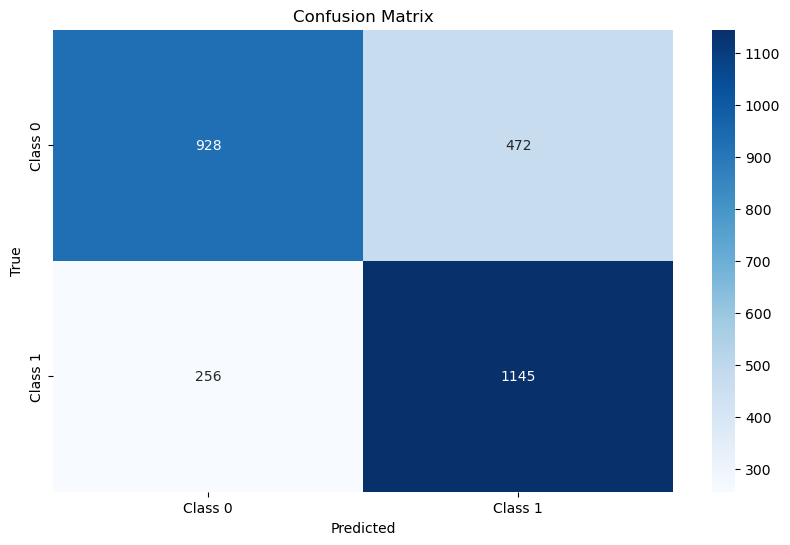

In [188]:
# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a heatmap to display the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Correlation Matrix

In [190]:
corr_matrix = data_combined.corr()

In [191]:
# Get correlation of each feature with the target variable (e.g., 'price')
target_corr = corr_matrix['is_promoted'].sort_values(ascending=False)

# Print the correlation values
print(target_corr)

is_promoted             1.000000
KPIs_met >80%           0.380519
avg_training_score      0.285668
previous_year_rating    0.282337
awards_won?             0.211287
region                  0.168259
department              0.087452
education               0.051220
dept_gender             0.025858
gender                  0.021415
length_of_service       0.000035
age                    -0.015070
no_of_trainings        -0.044717
perf_train             -0.161344
Name: is_promoted, dtype: float64


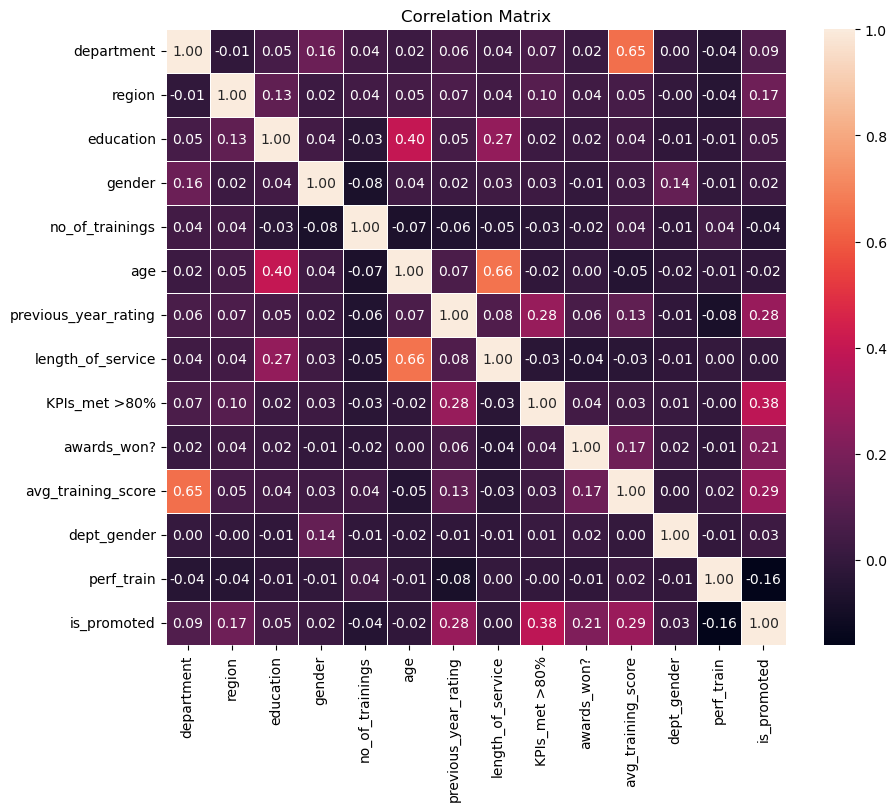

In [192]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## 2. Airbnb

### 2.1 Load and Explore the data <a id="part2.1"></a>

In [195]:
listing = pd.read_csv('listings.csv')

In [196]:
# Top 5 Rows
listing.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

In [197]:
# Bottom 5 Rows
listing.tail()

id                                               name    host_id  \
7902  38105126  Loft 2 pax near Haw Par / Pasir Panjang. Free ...  278109833   
7903  38108273                         3bedroom luxury at Orchard  238891646   
7904  38109336    [ Farrer Park ] New City Fringe CBD Mins to MRT  281448565   
7905  38110493          Cheap Master Room in Central of Singapore  243835202   
7906  38112762  Amazing room with private bathroom walk to Orc...   28788520   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
7902     Belle      Central Region    Queenstown   1.27973  103.78751   
7903      Neha      Central Region       Tanglin   1.29269  103.82623   
7904     Mindy      Central Region       Kallang   1.31286  103.85996   
7905     Huang      Central Region  River Valley   1.29543  103.83801   
7906   Terence      Central Region  River Valley   1.29672  103.83325   

            room_type  price  minimum_nights  number_of_reviews last_review  \
7902  Entire home/apt    100               3                  0         NaN   
7903  Entire home/apt    550               6                  0         NaN   
7904     Private room     58              30                  0         NaN   
7905     Private room     56              14                  0         NaN   
7906     Private room     65              90                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
7902                NaN                              31                61  
7903                NaN                              34               365  
7904                NaN                               3               173  
7905                NaN                               2                30  
7906                NaN                               7               365

In [198]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

#### Change Data Type

In [200]:
listing['last_review'] = listing['last_review'].astype('datetime64[ns]')

In [201]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              7907 non-null   int64         
 1   name                            7905 non-null   object        
 2   host_id                         7907 non-null   int64         
 3   host_name                       7907 non-null   object        
 4   neighbourhood_group             7907 non-null   object        
 5   neighbourhood                   7907 non-null   object        
 6   latitude                        7907 non-null   float64       
 7   longitude                       7907 non-null   float64       
 8   room_type                       7907 non-null   object        
 9   price                           7907 non-null   int64         
 10  minimum_nights                  7907 non-null   int64         
 11  numb

In [202]:
listing.describe()

id       host_id     latitude    longitude         price  \
count  7.907000e+03  7.907000e+03  7907.000000  7907.000000   7907.000000   
mean   2.338862e+07  9.114481e+07     1.314192   103.848787    169.332996   
min    4.909100e+04  2.366600e+04     1.243870   103.646560      0.000000   
25%    1.582180e+07  2.305808e+07     1.295795   103.835825     65.000000   
50%    2.470627e+07  6.344891e+07     1.311030   103.849410    124.000000   
75%    3.234850e+07  1.553811e+08     1.322110   103.872535    199.000000   
max    3.811276e+07  2.885676e+08     1.454590   103.973420  10000.000000   
std    1.016416e+07  8.190910e+07     0.030577     0.043675    340.187599   

       minimum_nights  number_of_reviews                    last_review  \
count     7907.000000        7907.000000                           5149   
mean        17.510054          12.807386  2019-01-11 17:29:18.399689216   
min          1.000000           0.000000            2013-10-21 00:00:00   
25%          1.000000           0.000000            2018-11-21 00:00:00   
50%          3.000000           2.000000            2019-06-27 00:00:00   
75%         10.000000          10.000000            2019-08-07 00:00:00   
max       1000.000000         323.000000            2019-08-27 00:00:00   
std         42.094616          29.707746                            NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
count        5149.000000                     7907.000000       7907.000000  
mean            1.043669                       40.607689        208.726318  
min             0.010000                        1.000000          0.000000  
25%             0.180000                        2.000000         54.000000  
50%             0.550000                        9.000000        260.000000  
75%             1.370000                       48.000000        355.000000  
max            13.000000                      274.000000        365.000000  
std             1.285851                       65.135253        146.120034

#### Inspecting Unique Values

In [204]:
listing['neighbourhood_group'].unique()

array(['North Region', 'Central Region', 'East Region', 'West Region',
       'North-East Region'], dtype=object)

In [205]:
listing['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [206]:
listing['neighbourhood'].unique()

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bedok', 'Bukit Merah',
       'Newton', 'Geylang', 'River Valley', 'Jurong West', 'Rochor',
       'Queenstown', 'Serangoon', 'Marine Parade', 'Pasir Ris',
       'Toa Payoh', 'Outram', 'Punggol', 'Tanglin', 'Hougang', 'Kallang',
       'Novena', 'Downtown Core', 'Bukit Panjang', 'Singapore River',
       'Orchard', 'Ang Mo Kio', 'Bukit Batok', 'Museum', 'Sembawang',
       'Choa Chu Kang', 'Central Water Catchment', 'Sengkang', 'Clementi',
       'Jurong East', 'Bishan', 'Yishun', 'Mandai', 'Southern Islands',
       'Sungei Kadut', 'Western Water Catchment', 'Tuas', 'Marina South',
       'Lim Chu Kang'], dtype=object)

<Axes: >

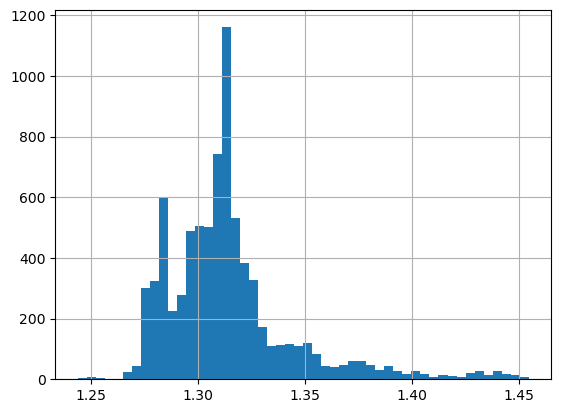

In [207]:
listing['latitude'].hist(bins=50)

<Axes: >

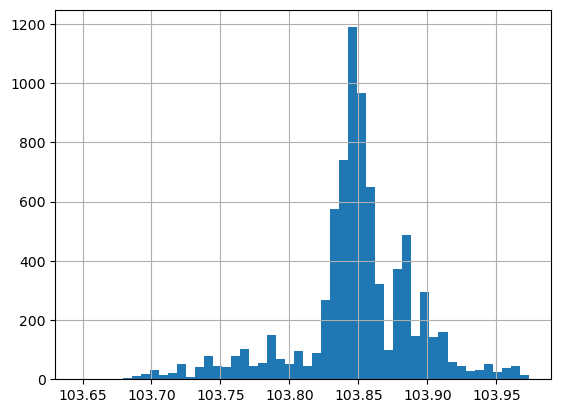

In [208]:
listing['longitude'].hist(bins=50)

<Axes: >

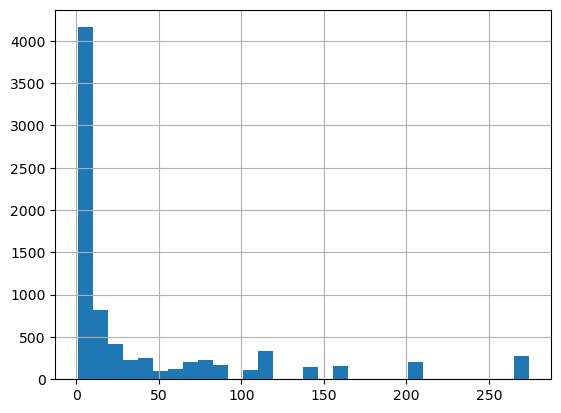

In [209]:
listing['calculated_host_listings_count'].hist(bins=30)

<Axes: >

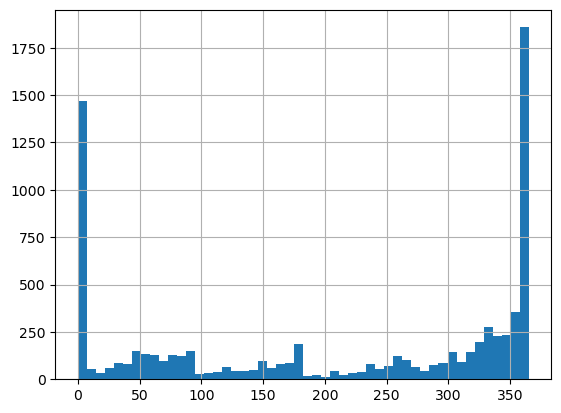

In [210]:
listing['availability_365'].hist(bins=50)

#### Quantifying Missing Date

In [212]:
# Count of Rows with Missing Data
listing.isnull().sum().sort_values(ascending = False)

last_review                       2758
reviews_per_month                 2758
name                                 2
id                                   0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [213]:
# Percentage of Rows with Missing Data
listing.isnull().mean().sort_values(ascending = False)

last_review                       0.348805
reviews_per_month                 0.348805
name                              0.000253
id                                0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

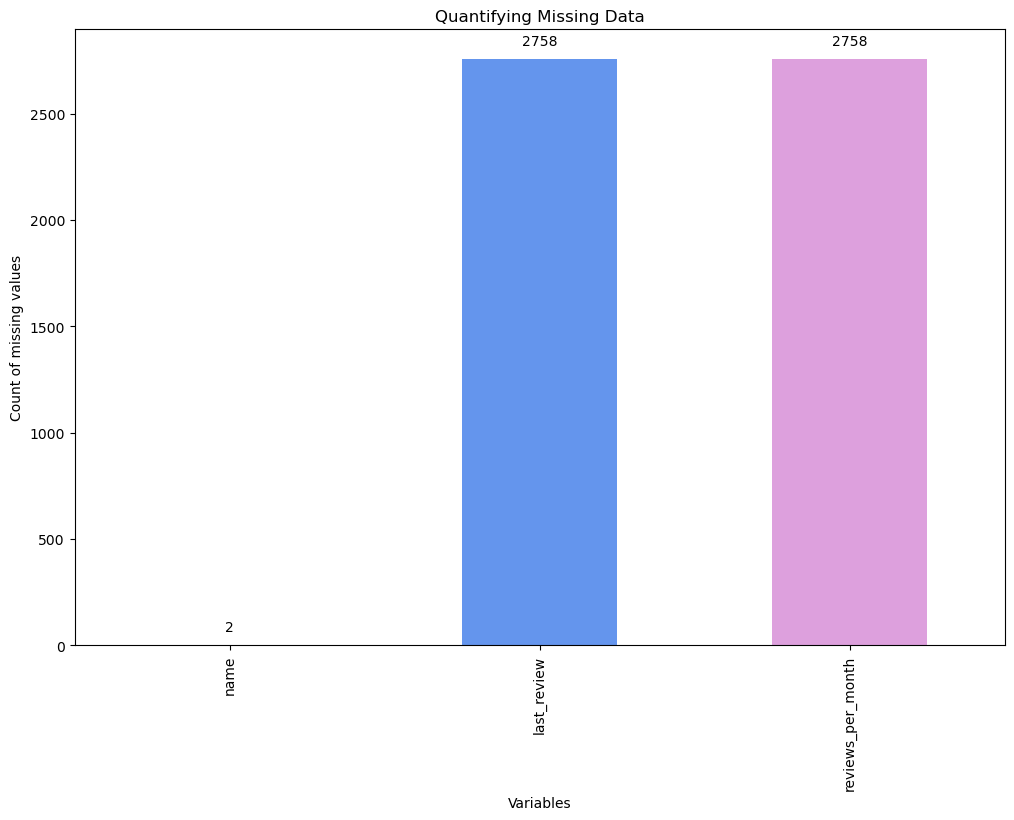

In [214]:
# Plot the percentages of missing data utilising
# Calculate the percentage of missing values
missing_data = listing.isnull().sum()

# Filter to only include columns with missing values
missing_data = missing_data[missing_data > 0]

# Plot the missing data
missing_data.plot.bar(figsize=(12,8), color=['orange','cornflowerblue', 'plum'])

for x, y in enumerate(missing_data):
    label = "{}".format(y)
    plt.annotate(label, 
                 (x, missing_data.iloc[x]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center')
    
plt.ylabel('Count of missing values')
plt.xlabel('Variables')
plt.title('Quantifying Missing Data')
plt.show()

#### Determining Cardinality

In [216]:
listing.nunique(dropna= True)

id                                7907
name                              7457
host_id                           2705
host_name                         1833
neighbourhood_group                  5
neighbourhood                       43
latitude                          4885
longitude                         5414
room_type                            3
price                              374
minimum_nights                      73
number_of_reviews                  208
last_review                       1001
reviews_per_month                  527
calculated_host_listings_count      55
availability_365                   359
dtype: int64

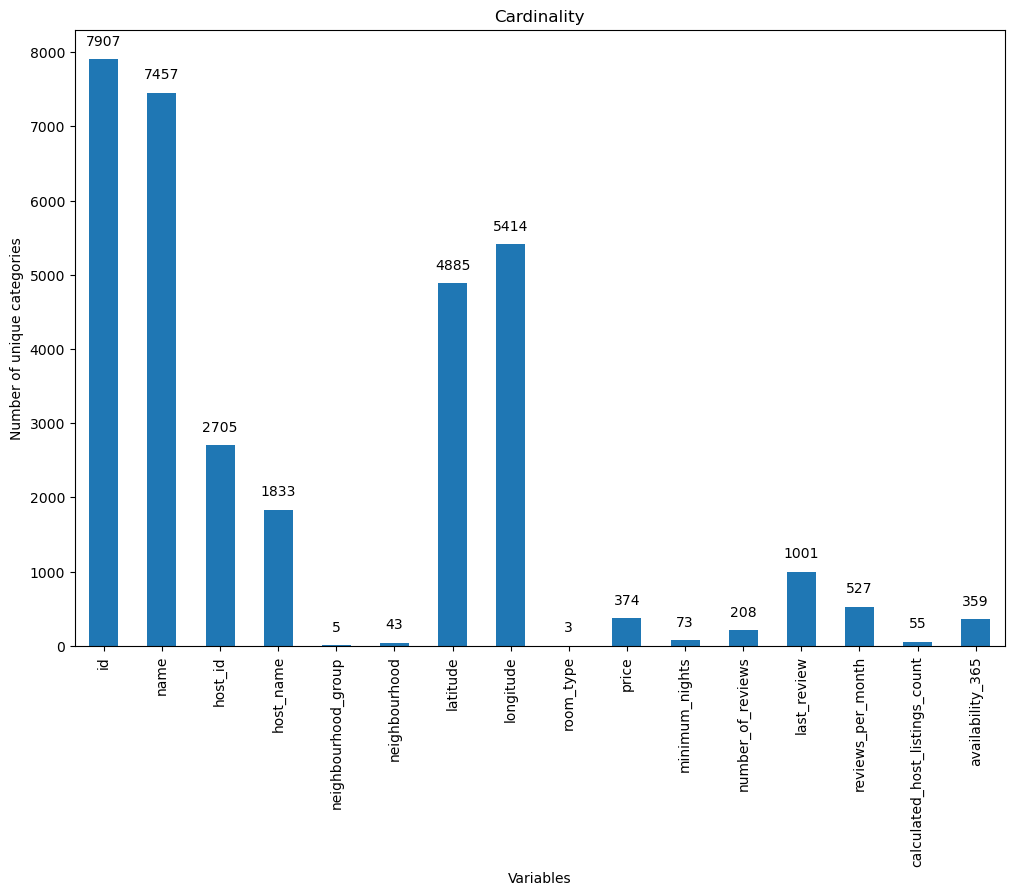

In [217]:
# Plot the cardinality of the variables
cardinality = listing.nunique()
ax = cardinality.plot.bar(figsize=(12, 8))

# Add annotations for each bar
for x, y in enumerate(cardinality):
    label = "{}".format(y)
    plt.annotate(label, 
                 (x, y), 
                 textcoords="offset points", 
                 xytext=(0, 10),  # Offset for the annotation
                 ha='center')

# Add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

# Show the plot
plt.show()

#### Pinpointing Rare Categories

neighbourhood_group
Central Region       0.797901
West Region          0.068294
East Region          0.064247
North-East Region    0.043759
North Region         0.025800
Name: count, dtype: float64


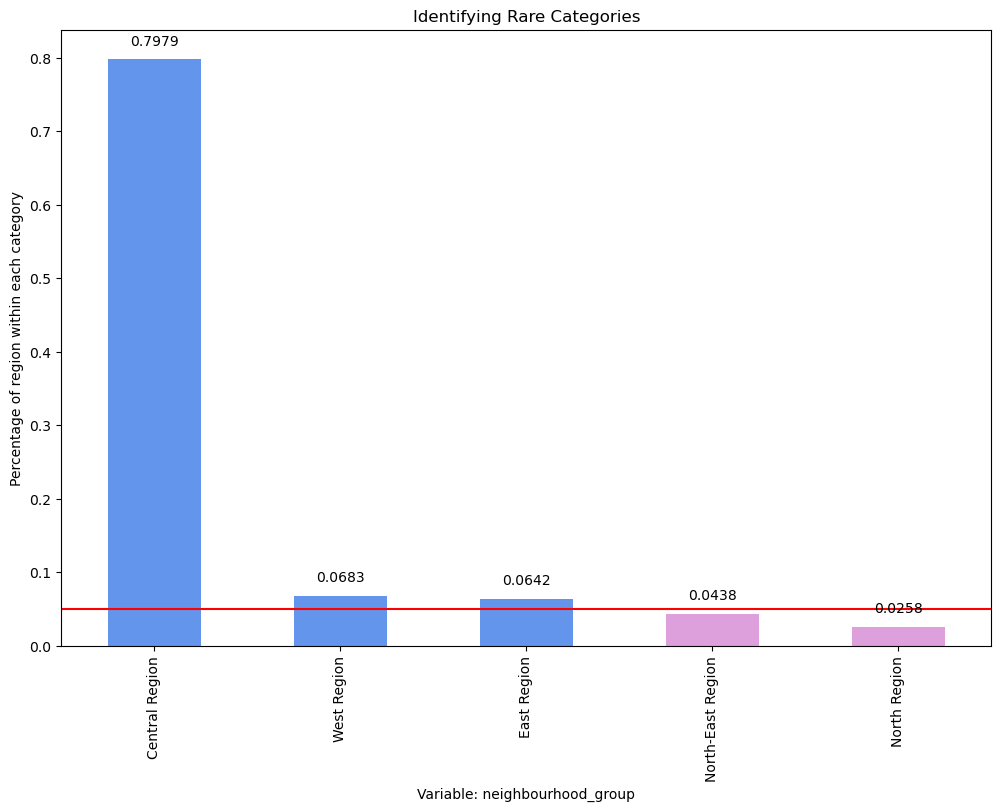

In [219]:
# Frequency of the labels
label_freq = listing['neighbourhood_group'].value_counts() / len(listing)
print(label_freq)

# Set the bar colors based on the condition
colors = ['plum' if value < 0.05 else 'cornflowerblue' for value in label_freq]

# Create the bar plot with custom colors
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12, 8), color=colors)

# Add a line to signal 5% frequency limit
fig.axhline(y=0.05, color='red')

# Annotate each bar with its value
for x, y in enumerate(label_freq):
    label = "{:.4f}".format(y)
    plt.annotate(label, 
                 (x, y), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center')

# Add axis labels and title
fig.set_ylabel('Percentage of region within each category')
fig.set_xlabel('Variable: neighbourhood_group')
fig.set_title('Identifying Rare Categories')

# Show the plot
plt.show()

room_type
Entire home/apt    0.522575
Private room       0.427596
Shared room        0.049829
Name: count, dtype: float64


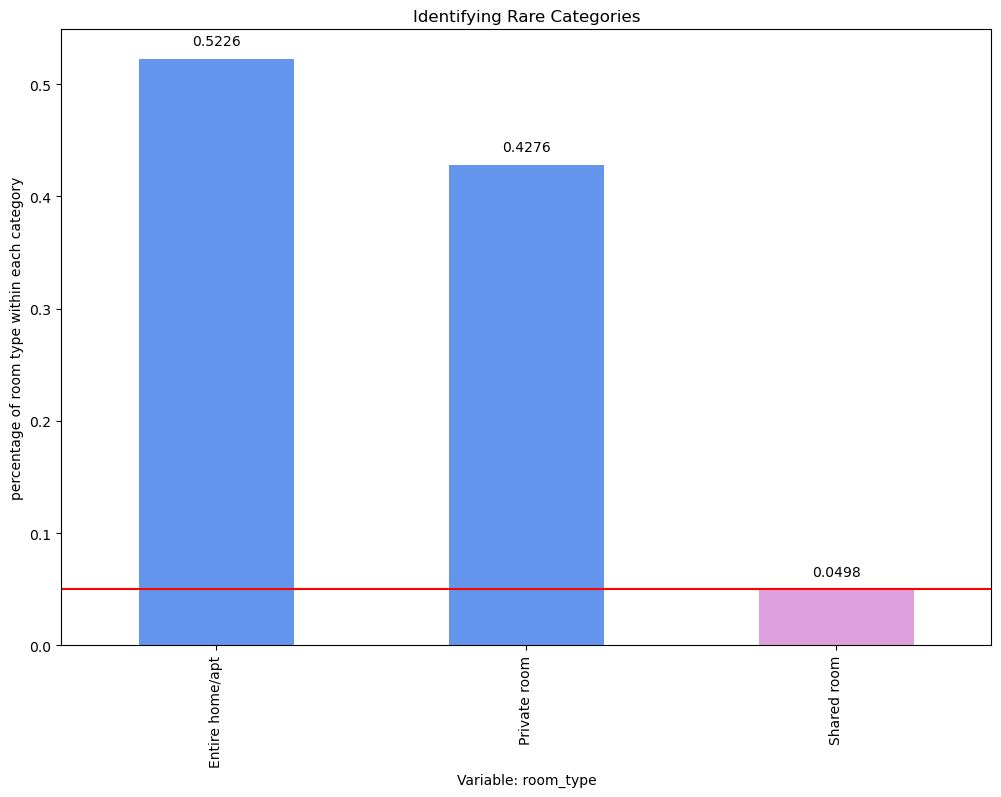

In [220]:
# Frequency of the labels
label_freq = listing['room_type'].value_counts() / len(listing)
print(label_freq)

colors = ['plum' if value < 0.05 else 'cornflowerblue' for value in label_freq]

# let's make plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12,8), color=colors)

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

for x, y in enumerate(label_freq):
    label = "{:.4f}".format(y)
    plt.annotate(label, 
                 (x, label_freq.iloc[x]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center')

# add axis labels and title
fig.set_ylabel('percentage of room type within each category')
fig.set_xlabel('Variable: room_type')
fig.set_title('Identifying Rare Categories')
plt.show()

In [221]:
# Frequency of the labels
label_freq = listing['neighbourhood'].value_counts() / len(listing)
print (label_freq)

neighbourhood
Kallang                    0.131908
Geylang                    0.125711
Novena                     0.067915
Rochor                     0.067788
Outram                     0.060326
Bukit Merah                0.059441
Downtown Core              0.054129
Bedok                      0.047173
River Valley               0.045782
Queenstown                 0.033641
Tanglin                    0.026559
Singapore River            0.022132
Marine Parade              0.021626
Jurong West                0.019350
Orchard                    0.017200
Newton                     0.016947
Bukit Timah                0.016568
Jurong East                0.014923
Hougang                    0.013785
Clementi                   0.012900
Toa Payoh                  0.012773
Pasir Ris                  0.008979
Serangoon                  0.008726
Sengkang                   0.008474
Woodlands                  0.008474
Bukit Batok                0.008221
Tampines                   0.008094
Museum        

#### Identifying Linear Relationship Between Target & Other Variables

In [223]:
columns = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

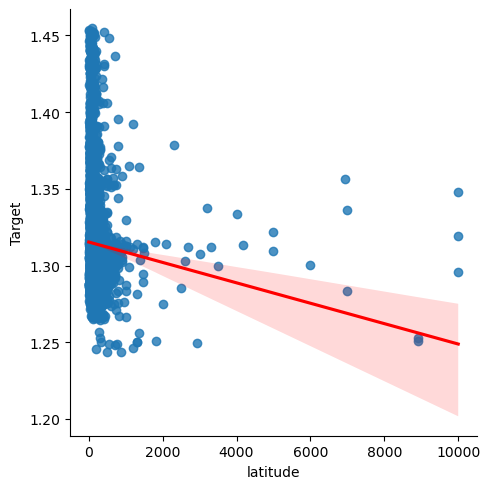

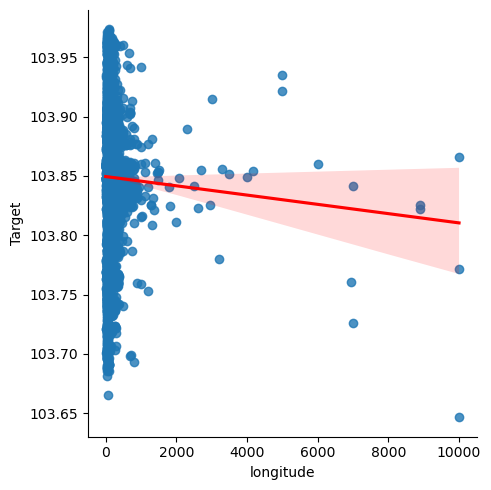

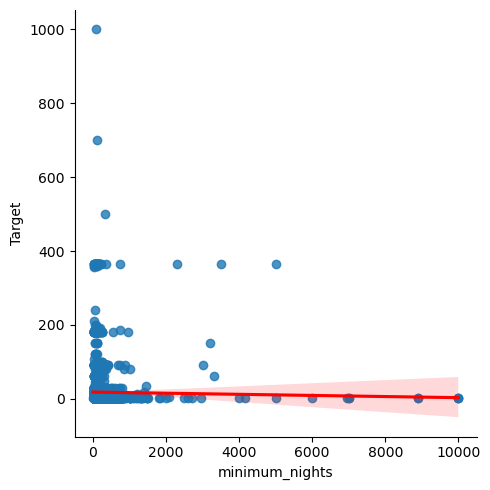

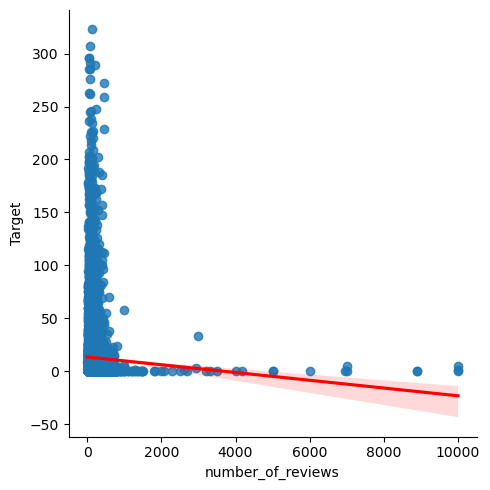

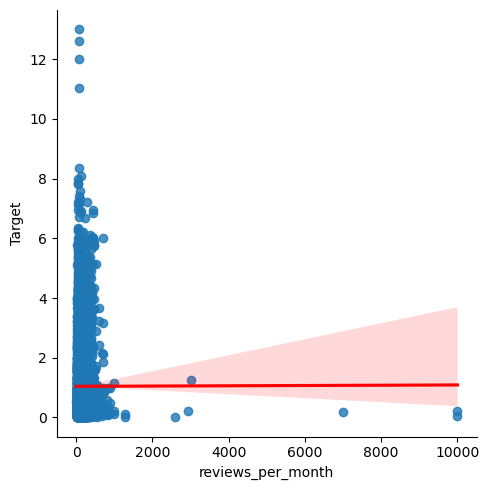

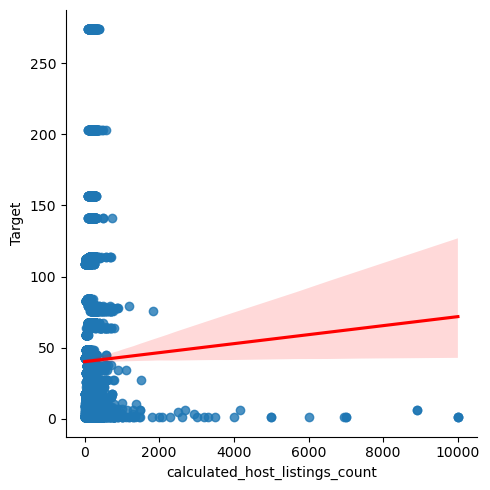

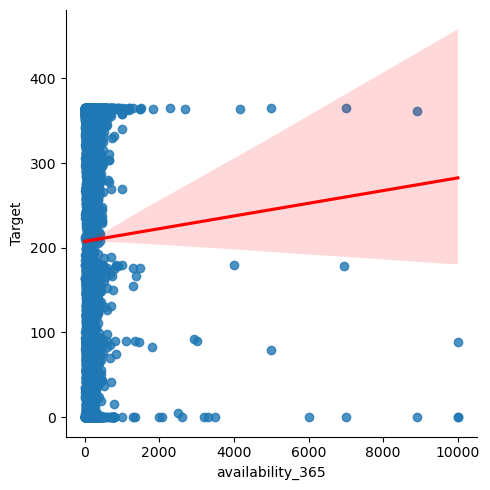

In [224]:
# Create a scatter plot
for cols in columns:
    sns.lmplot(x="price", y=cols, data=listing, order=1, line_kws={'color':'red'})
    plt.ylabel('Target')
    plt.xlabel(cols)

### 2.2 Cleanse and Transform the data <a id="part2.2"></a>

Are there any missing values? How did you handle them? Are there any outliers? How did you identify them and how to deal with them? Do you need to transform the Categorical Data into numbers? Do you need to scale the data or not? 

#### Replace NaN (Not a Number) with '?'

In [227]:
listing = listing.replace('?', np.nan)
listing.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

In [228]:
listing.isnull().mean().sort_values(ascending = False)

last_review                       0.348805
reviews_per_month                 0.348805
name                              0.000253
id                                0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

#### Mean Imputation with Feature Engine: reviews_per_month

<Axes: >

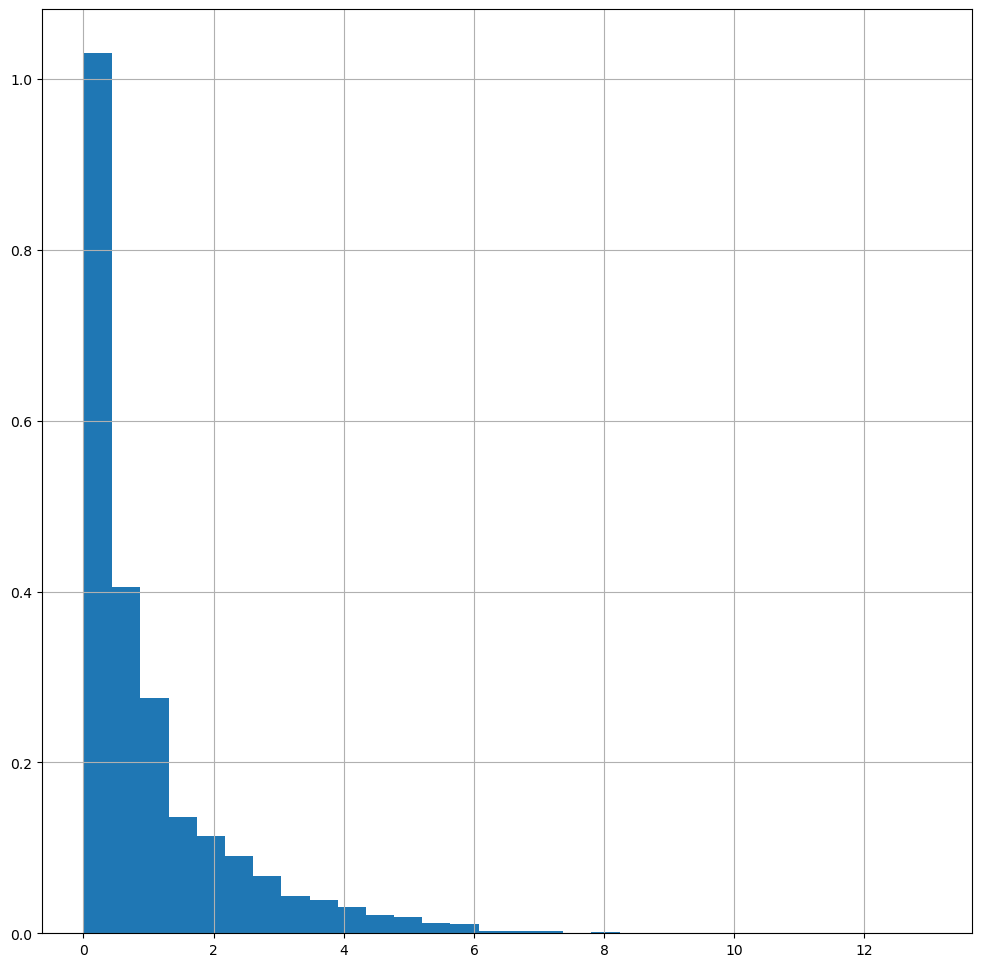

In [230]:
listing['reviews_per_month'].hist(bins=30, figsize=(12,12), density=True)

In [231]:
mean_imputer = MeanMedianImputer(imputation_method='mean',
                                   variables=['reviews_per_month'])

mean_imputer.fit(listing)

MeanMedianImputer(imputation_method='mean', variables=['reviews_per_month'])

In [232]:
mean_imputer.imputer_dict_

{'reviews_per_month': 1.0436686735288405}

In [233]:
listing = mean_imputer.transform(listing)

In [234]:
listing.tail()

id                                               name    host_id  \
7902  38105126  Loft 2 pax near Haw Par / Pasir Panjang. Free ...  278109833   
7903  38108273                         3bedroom luxury at Orchard  238891646   
7904  38109336    [ Farrer Park ] New City Fringe CBD Mins to MRT  281448565   
7905  38110493          Cheap Master Room in Central of Singapore  243835202   
7906  38112762  Amazing room with private bathroom walk to Orc...   28788520   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
7902     Belle      Central Region    Queenstown   1.27973  103.78751   
7903      Neha      Central Region       Tanglin   1.29269  103.82623   
7904     Mindy      Central Region       Kallang   1.31286  103.85996   
7905     Huang      Central Region  River Valley   1.29543  103.83801   
7906   Terence      Central Region  River Valley   1.29672  103.83325   

            room_type  price  minimum_nights  number_of_reviews last_review  \
7902  Entire home/apt    100               3                  0         NaT   
7903  Entire home/apt    550               6                  0         NaT   
7904     Private room     58              30                  0         NaT   
7905     Private room     56              14                  0         NaT   
7906     Private room     65              90                  0         NaT   

      reviews_per_month  calculated_host_listings_count  availability_365  
7902           1.043669                              31                61  
7903           1.043669                              34               365  
7904           1.043669                               3               173  
7905           1.043669                               2                30  
7906           1.043669                               7               365

#### Mean Imputation: last_review

In [236]:
mean = listing['last_review'].mean()

mean

Timestamp('2019-01-11 17:29:18.399689216')

In [237]:
# Fill missing values with the most common date
listing['last_review'] = listing['last_review'].fillna(mean)

In [238]:
listing.tail()

id                                               name    host_id  \
7902  38105126  Loft 2 pax near Haw Par / Pasir Panjang. Free ...  278109833   
7903  38108273                         3bedroom luxury at Orchard  238891646   
7904  38109336    [ Farrer Park ] New City Fringe CBD Mins to MRT  281448565   
7905  38110493          Cheap Master Room in Central of Singapore  243835202   
7906  38112762  Amazing room with private bathroom walk to Orc...   28788520   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
7902     Belle      Central Region    Queenstown   1.27973  103.78751   
7903      Neha      Central Region       Tanglin   1.29269  103.82623   
7904     Mindy      Central Region       Kallang   1.31286  103.85996   
7905     Huang      Central Region  River Valley   1.29543  103.83801   
7906   Terence      Central Region  River Valley   1.29672  103.83325   

            room_type  price  minimum_nights  number_of_reviews  \
7902  Entire home/apt    100               3                  0   
7903  Entire home/apt    550               6                  0   
7904     Private room     58              30                  0   
7905     Private room     56              14                  0   
7906     Private room     65              90                  0   

                       last_review  reviews_per_month  \
7902 2019-01-11 17:29:18.399689216           1.043669   
7903 2019-01-11 17:29:18.399689216           1.043669   
7904 2019-01-11 17:29:18.399689216           1.043669   
7905 2019-01-11 17:29:18.399689216           1.043669   
7906 2019-01-11 17:29:18.399689216           1.043669   

      calculated_host_listings_count  availability_365  
7902                              31                61  
7903                              34               365  
7904                               3               173  
7905                               2                30  
7906                               7               365

#### Tried Methods:
- ##### Last Observation Carried Forward:
listing['last_review'] = listing['last_review'].ffill()  # Forward fill

- ##### Next Observation Carried Backward: 
listing['last_review'] = listing['last_review'].bfill()

- ##### Linear Interpolation: 

##### Convert datetime to numeric (ordinal representation)

inter_data['datetime_numeric'] = inter_data['last_review'].map(lambda x: x.toordinal() if pd.notnull(x) else None)

##### Interpolate the numeric values

listing['datetime_numeric'] = listing['datetime_numeric'].interpolate(method='linear')

##### Convert back to datetime

listing['last_review'] = listing['last_review'].astype('datetime64[ns]')

##### Drop the helper column

listing.drop(columns=['datetime_numeric'], inplace=True)

##### Display the updated DataFrame

listing.head()

#### Drop Rows with NaN: Name

In [241]:
listing = listing.dropna()

In [242]:
listing.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

#### Check for Null

In [244]:
listing.isnull().mean().sort_values(ascending = False)

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

#### Drop Unnecessary Columns

In [246]:
listing_drop = listing.drop(['id', 'host_id'], axis=1)

#### Creation of Column: Number of Days since last_review

In [248]:
current = datetime.now()

In [249]:
listing_drop['no_of_days'] = (current - listing_drop['last_review']).dt.days

In [250]:
listing_drop['no_of_days'].head()

0    4067
1    3636
2    3357
3    1947
4    1961
Name: no_of_days, dtype: int64

#### Creation of Column: Year

In [252]:
listing_drop['year'] = listing_drop['last_review'].dt.year

In [253]:
listing_drop.head()

name  host_name neighbourhood_group  \
0    COZICOMFORT LONG TERM STAY ROOM 2  Francesca        North Region   
1      Pleasant Room along Bukit Timah    Sujatha      Central Region   
2                          COZICOMFORT  Francesca        North Region   
3  Ensuite Room (Room 1 & 2) near EXPO    Belinda         East Region   
4      B&B  Room 1 near Airport & EXPO    Belinda         East Region   

  neighbourhood  latitude  longitude     room_type  price  minimum_nights  \
0     Woodlands   1.44255  103.79580  Private room     83             180   
1   Bukit Timah   1.33235  103.78521  Private room     81              90   
2     Woodlands   1.44246  103.79667  Private room     69               6   
3      Tampines   1.34541  103.95712  Private room    206               1   
4      Tampines   1.34567  103.95963  Private room     94               1   

   number_of_reviews last_review  reviews_per_month  \
0                  1  2013-10-21               0.01   
1                 18  2014-12-26               0.28   
2                 20  2015-10-01               0.20   
3                 14  2019-08-11               0.15   
4                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  no_of_days  year  
0                               2               365        4067  2013  
1                               1               365        3636  2014  
2                               2               365        3357  2015  
3                               9               353        1947  2019  
4                               9               355        1961  2019

#### Extraction of Datetime: month, quarter, semester, day, day_week, is_weekend

listing_drop['quarter'] = listing_drop['last_review'].dt.quarter
listing_drop['semester'] = np.where(listing_drop['quarter'].isin([1,2]),1,2)
listing_drop['day'] = listing_drop['last_review'].dt.day
listing_drop['day_week'] = listing_drop['last_review'].dt.dayofweek
listing_drop['is_weekend'] = np.where(listing_drop['day_week'].isin([0,1,2,3,4]), 1,0)
listing_drop['month'] = listing_drop['last_review'].dt.month

In [256]:
listing_drop.head()

name  host_name neighbourhood_group  \
0    COZICOMFORT LONG TERM STAY ROOM 2  Francesca        North Region   
1      Pleasant Room along Bukit Timah    Sujatha      Central Region   
2                          COZICOMFORT  Francesca        North Region   
3  Ensuite Room (Room 1 & 2) near EXPO    Belinda         East Region   
4      B&B  Room 1 near Airport & EXPO    Belinda         East Region   

  neighbourhood  latitude  longitude     room_type  price  minimum_nights  \
0     Woodlands   1.44255  103.79580  Private room     83             180   
1   Bukit Timah   1.33235  103.78521  Private room     81              90   
2     Woodlands   1.44246  103.79667  Private room     69               6   
3      Tampines   1.34541  103.95712  Private room    206               1   
4      Tampines   1.34567  103.95963  Private room     94               1   

   number_of_reviews last_review  reviews_per_month  \
0                  1  2013-10-21               0.01   
1                 18  2014-12-26               0.28   
2                 20  2015-10-01               0.20   
3                 14  2019-08-11               0.15   
4                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  no_of_days  year  
0                               2               365        4067  2013  
1                               1               365        3636  2014  
2                               2               365        3357  2015  
3                               9               353        1947  2019  
4                               9               355        1961  2019

#### Drop last_review

In [258]:
listing_drop = listing_drop.drop(['last_review'], axis=1)

In [259]:
listing_drop.head()

name  host_name neighbourhood_group  \
0    COZICOMFORT LONG TERM STAY ROOM 2  Francesca        North Region   
1      Pleasant Room along Bukit Timah    Sujatha      Central Region   
2                          COZICOMFORT  Francesca        North Region   
3  Ensuite Room (Room 1 & 2) near EXPO    Belinda         East Region   
4      B&B  Room 1 near Airport & EXPO    Belinda         East Region   

  neighbourhood  latitude  longitude     room_type  price  minimum_nights  \
0     Woodlands   1.44255  103.79580  Private room     83             180   
1   Bukit Timah   1.33235  103.78521  Private room     81              90   
2     Woodlands   1.44246  103.79667  Private room     69               6   
3      Tampines   1.34541  103.95712  Private room    206               1   
4      Tampines   1.34567  103.95963  Private room     94               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  1               0.01                               2   
1                 18               0.28                               1   
2                 20               0.20                               2   
3                 14               0.15                               9   
4                 22               0.22                               9   

   availability_365  no_of_days  year  
0               365        4067  2013  
1               365        3636  2014  
2               365        3357  2015  
3               353        1947  2019  
4               355        1961  2019

#### Categorize into Numerical & Categorical

In [261]:
# Numerical Variables
num_cols = [n for n in listing_drop.columns if listing_drop[n].dtypes != 'O' and n != 'price']
listing_drop[num_cols].head()

latitude  longitude  minimum_nights  number_of_reviews  reviews_per_month  \
0   1.44255  103.79580             180                  1               0.01   
1   1.33235  103.78521              90                 18               0.28   
2   1.44246  103.79667               6                 20               0.20   
3   1.34541  103.95712               1                 14               0.15   
4   1.34567  103.95963               1                 22               0.22   

   calculated_host_listings_count  availability_365  no_of_days  year  
0                               2               365        4067  2013  
1                               1               365        3636  2014  
2                               2               365        3357  2015  
3                               9               353        1947  2019  
4                               9               355        1961  2019

In [262]:
# Categorical Variables
cat_cols = [c for c in listing_drop.columns if listing_drop[c].dtypes=='O']
listing_drop[cat_cols].head()

name  host_name neighbourhood_group  \
0    COZICOMFORT LONG TERM STAY ROOM 2  Francesca        North Region   
1      Pleasant Room along Bukit Timah    Sujatha      Central Region   
2                          COZICOMFORT  Francesca        North Region   
3  Ensuite Room (Room 1 & 2) near EXPO    Belinda         East Region   
4      B&B  Room 1 near Airport & EXPO    Belinda         East Region   

  neighbourhood     room_type  
0     Woodlands  Private room  
1   Bukit Timah  Private room  
2     Woodlands  Private room  
3      Tampines  Private room  
4      Tampines  Private room

#### Ordinal Encoding

In [264]:
listing_drop[cat_cols].head()

name  host_name neighbourhood_group  \
0    COZICOMFORT LONG TERM STAY ROOM 2  Francesca        North Region   
1      Pleasant Room along Bukit Timah    Sujatha      Central Region   
2                          COZICOMFORT  Francesca        North Region   
3  Ensuite Room (Room 1 & 2) near EXPO    Belinda         East Region   
4      B&B  Room 1 near Airport & EXPO    Belinda         East Region   

  neighbourhood     room_type  
0     Woodlands  Private room  
1   Bukit Timah  Private room  
2     Woodlands  Private room  
3      Tampines  Private room  
4      Tampines  Private room

In [265]:
from feature_engine.encoding import OrdinalEncoder

# Instantiate the encoder with 'arbitrary' encoding
encoder = OrdinalEncoder(encoding_method='arbitrary')

# Fit and transform the categorical columns
listing_enc = encoder.fit_transform(listing_drop)

In [266]:
listing_enc[cat_cols].head()

name  host_name  neighbourhood_group  neighbourhood  room_type
0     0          0                    0              0          0
1     1          1                    1              1          0
2     2          0                    0              0          0
3     3          2                    2              2          0
4     4          2                    2              2          0

#### Highlighting Outliers

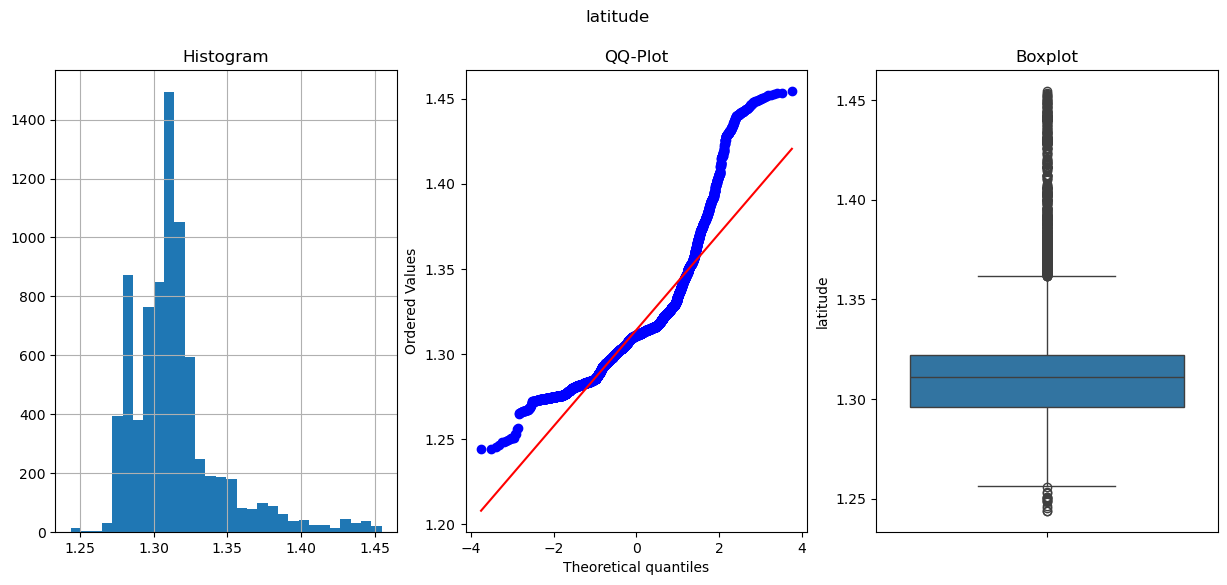

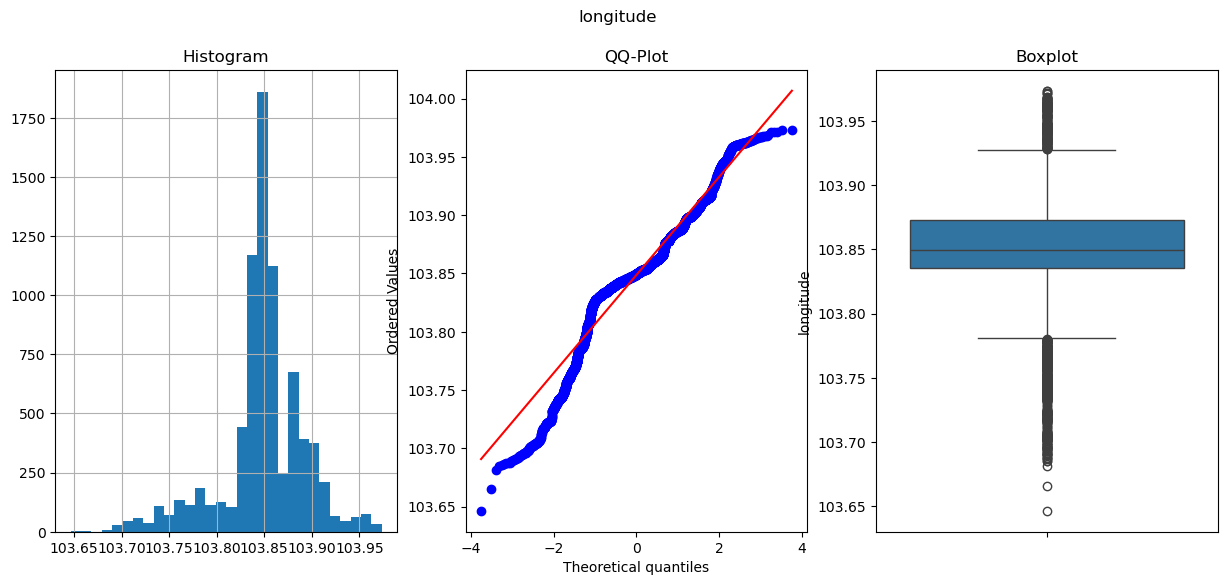

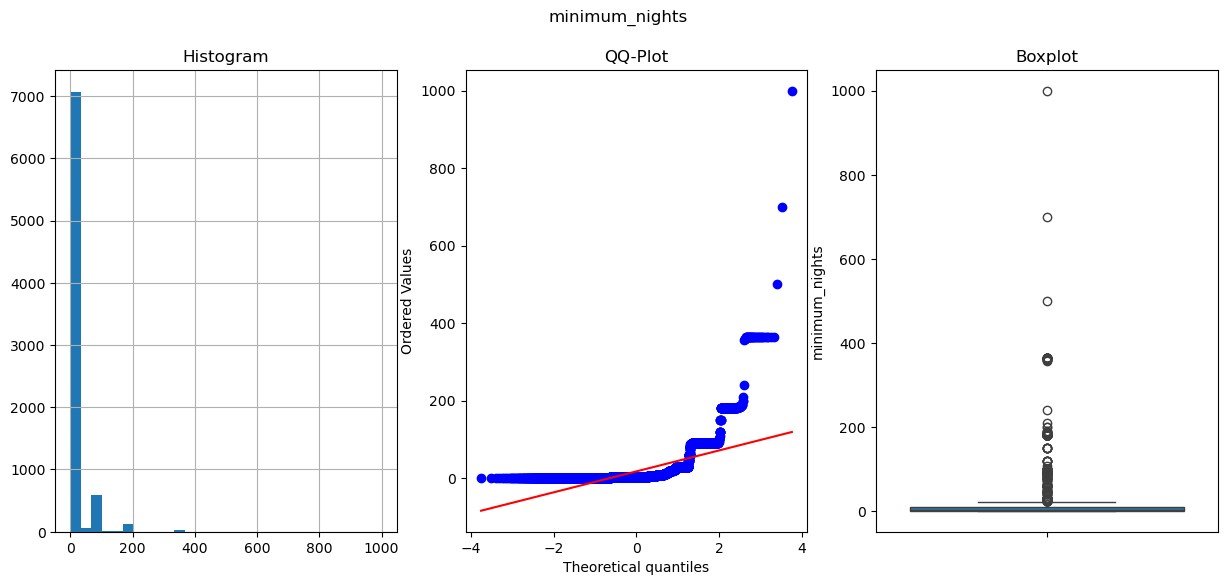

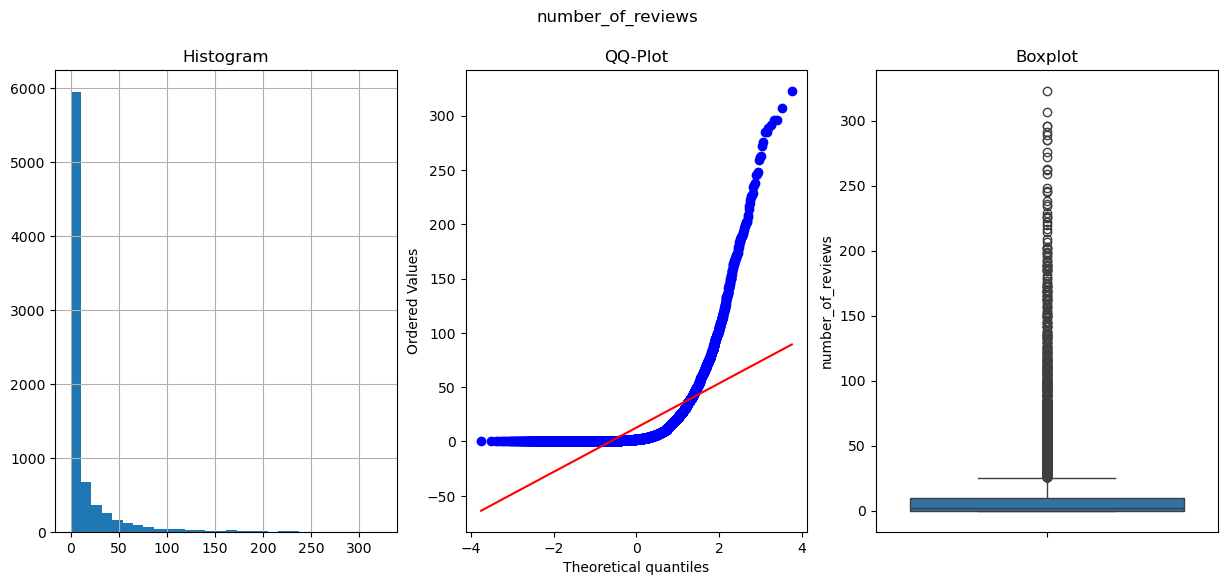

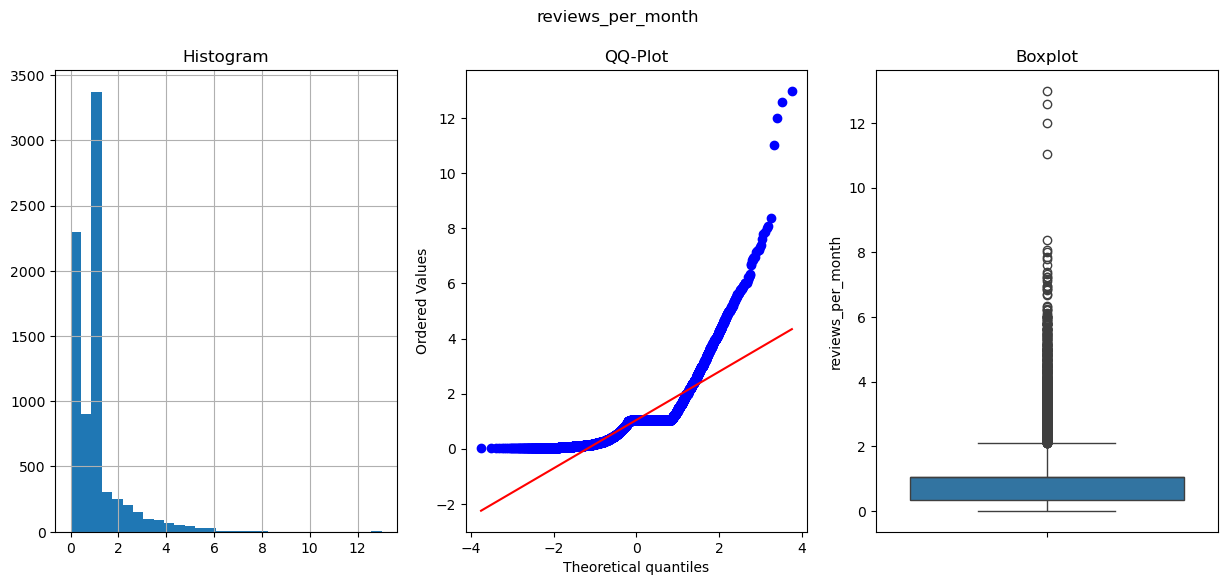

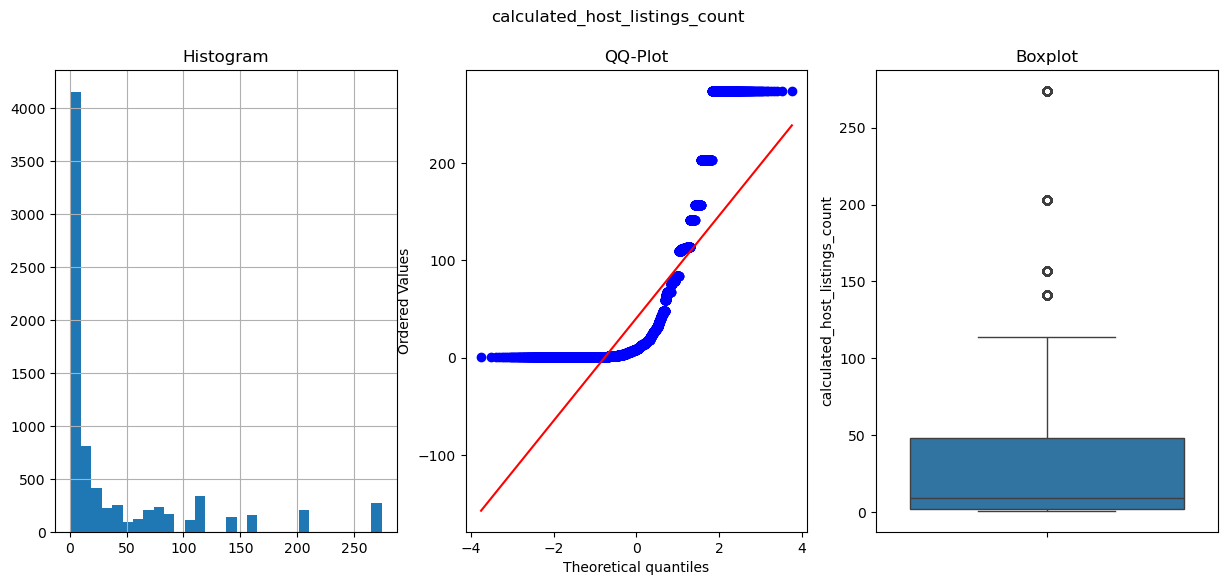

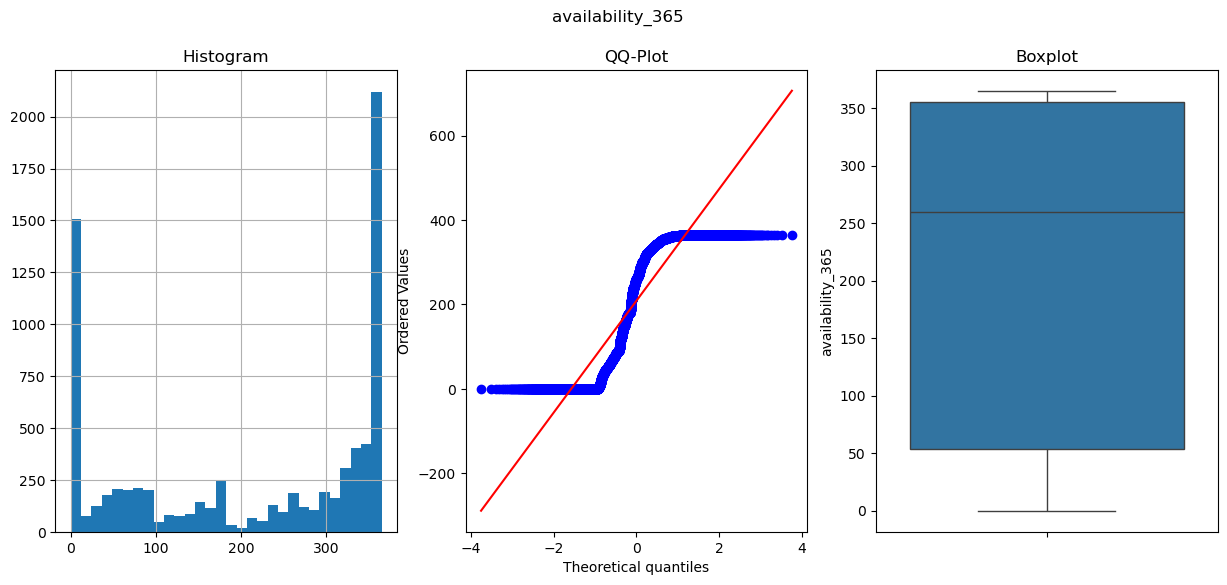

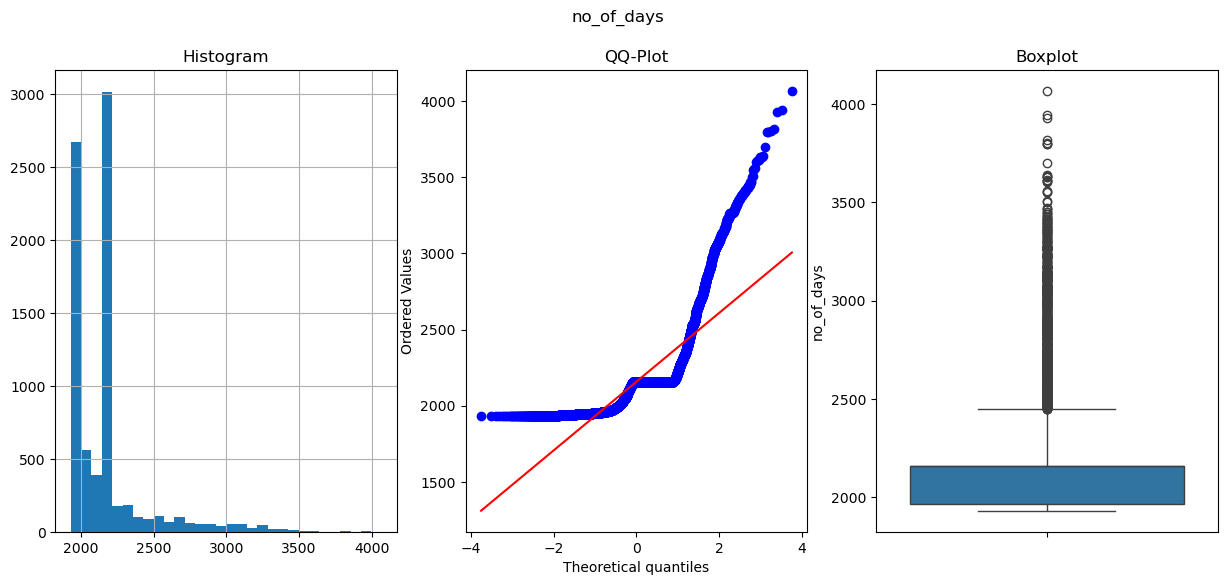

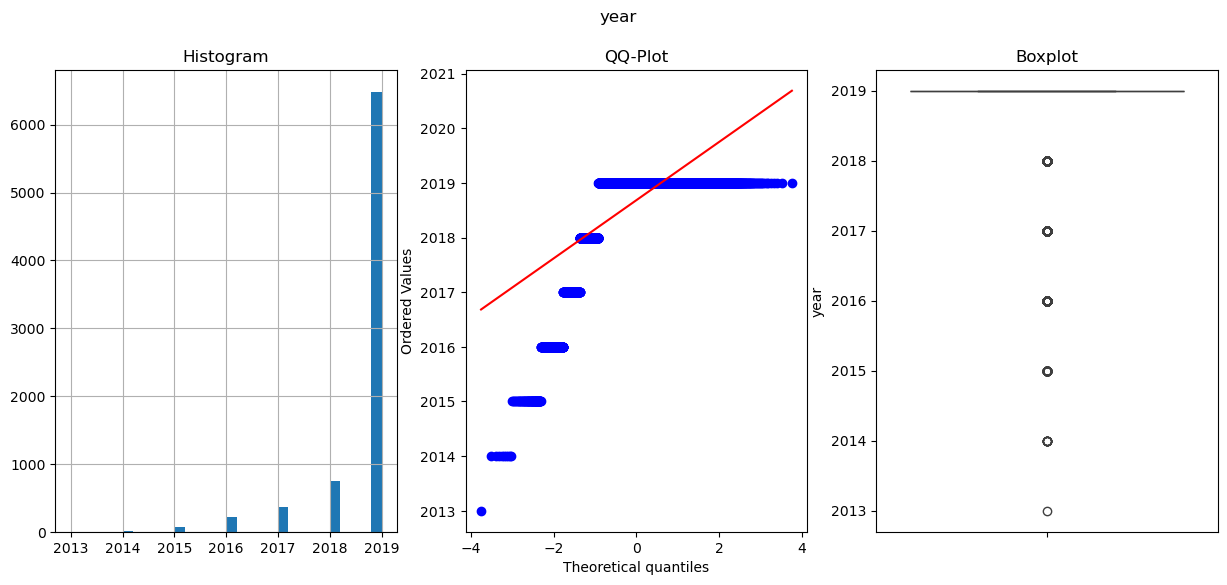

In [268]:
for cols in num_cols:
    diagnostic_plots(listing_enc, cols)

#### Winsorisation

In [270]:
windsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='both', # cap left, right or both tails
                        fold =0.05,
                        variables=num_cols)

windsorizer.fit(listing_enc)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['latitude', 'longitude', 'minimum_nights',
                      'number_of_reviews', 'reviews_per_month',
                      'calculated_host_listings_count', 'availability_365',
                      'no_of_days', 'year'])

In [271]:
listing_enc = windsorizer.transform(listing_enc)

#### Numerical Transformation

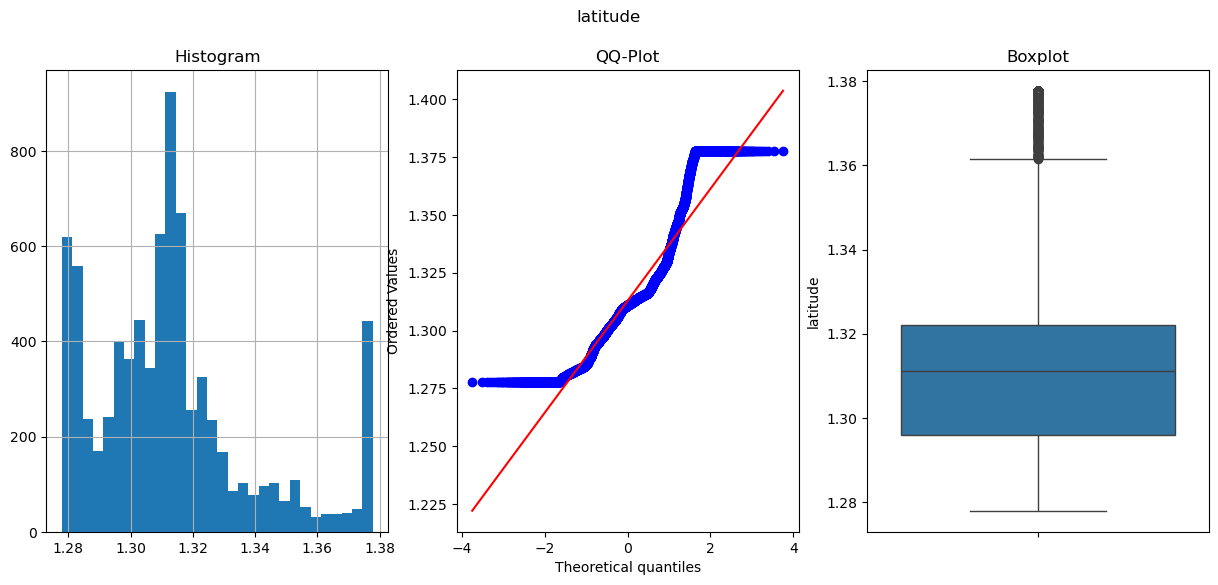

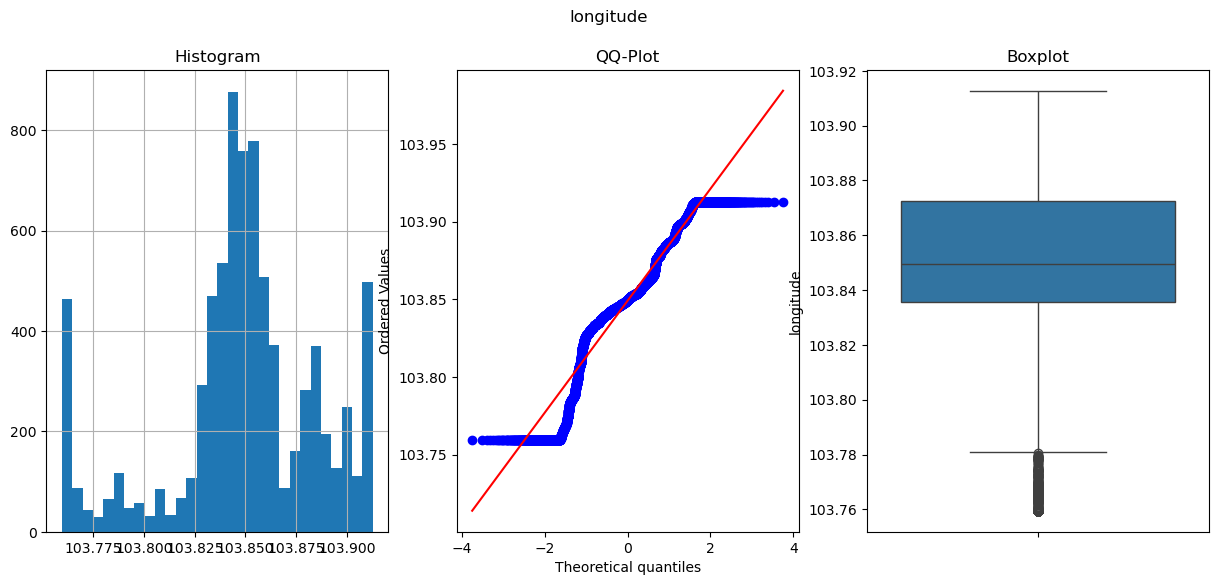

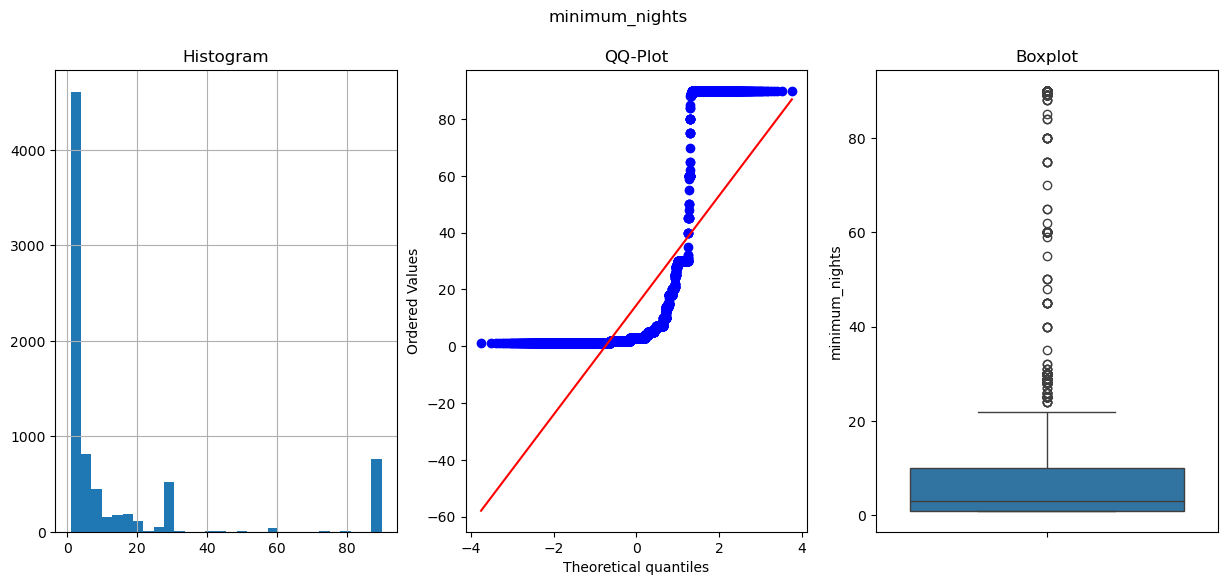

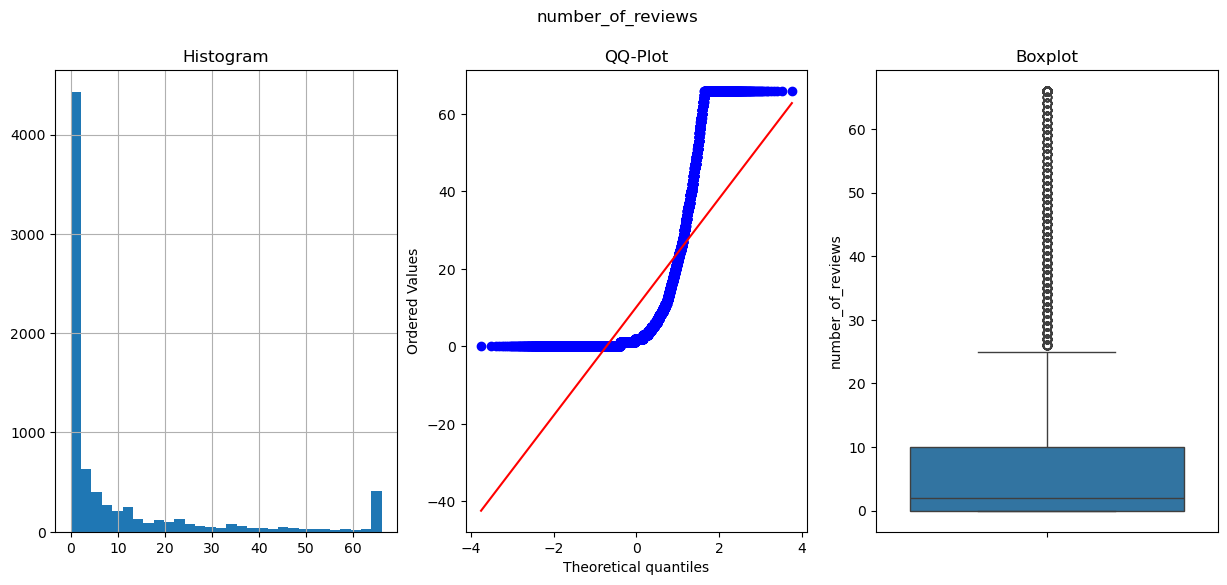

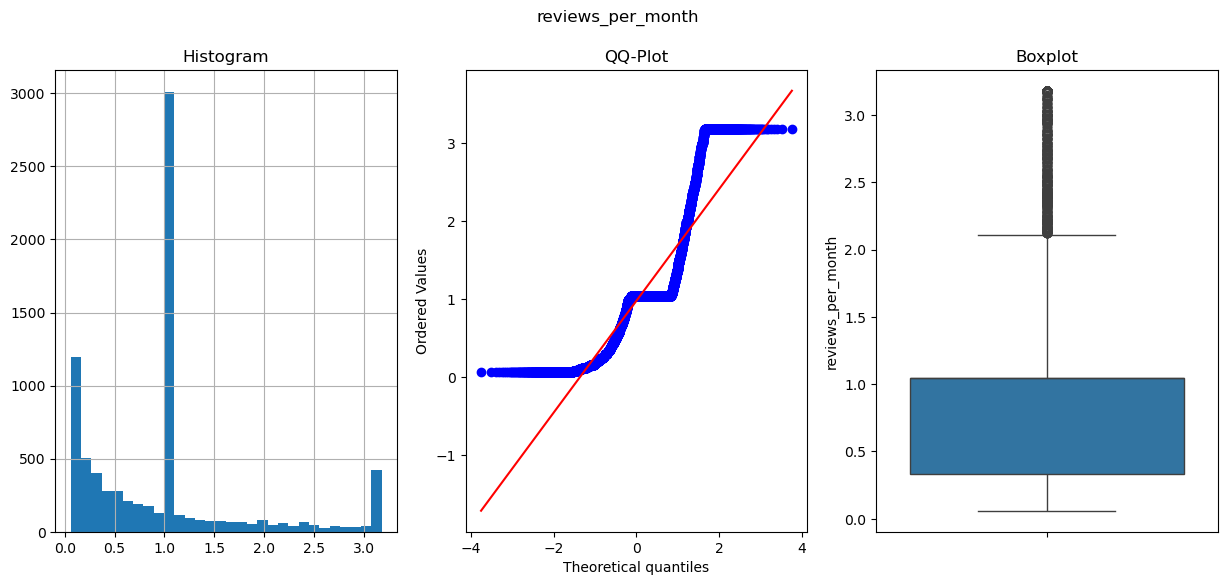

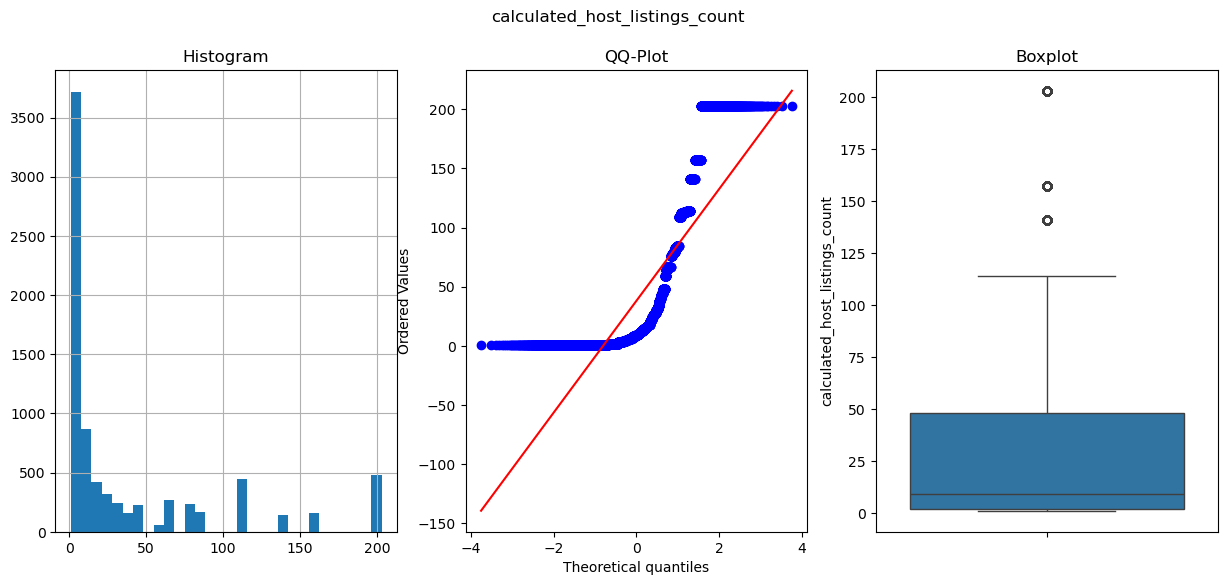

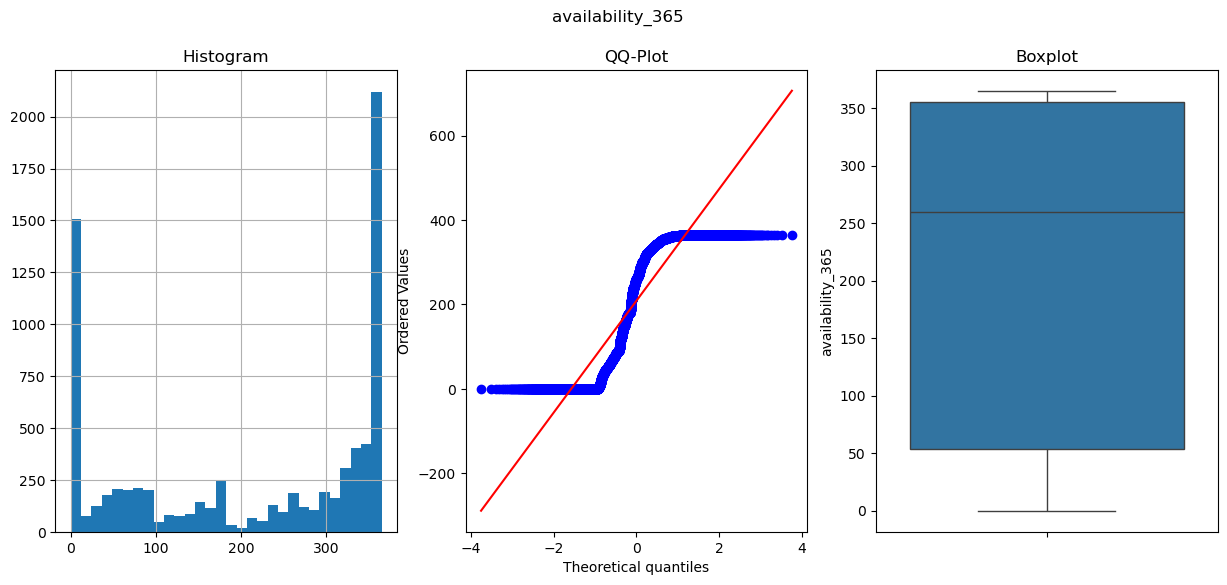

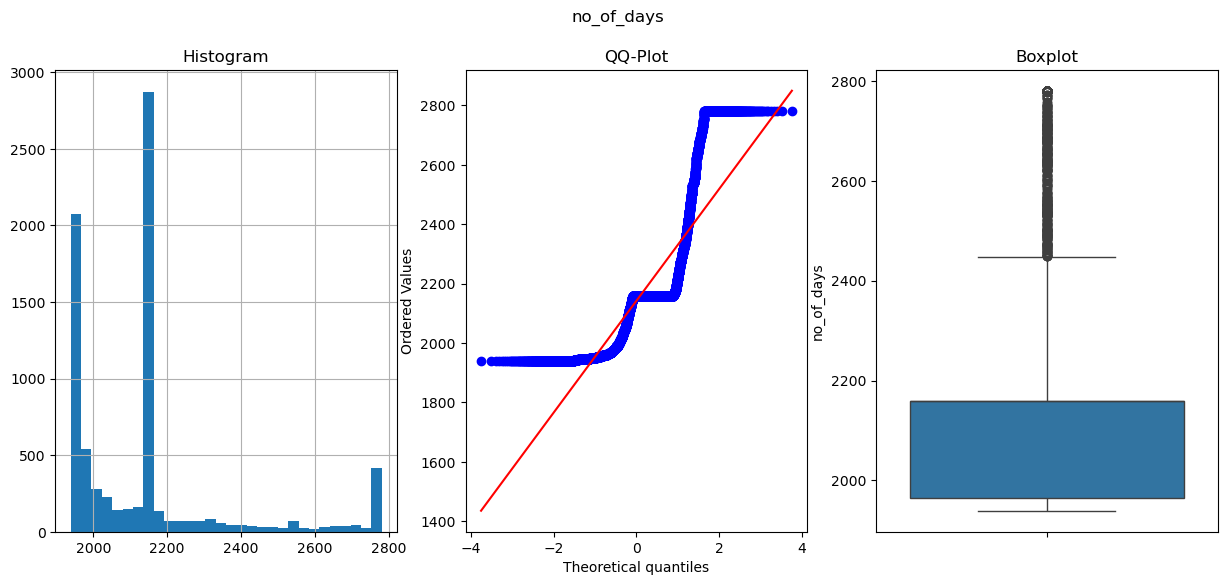

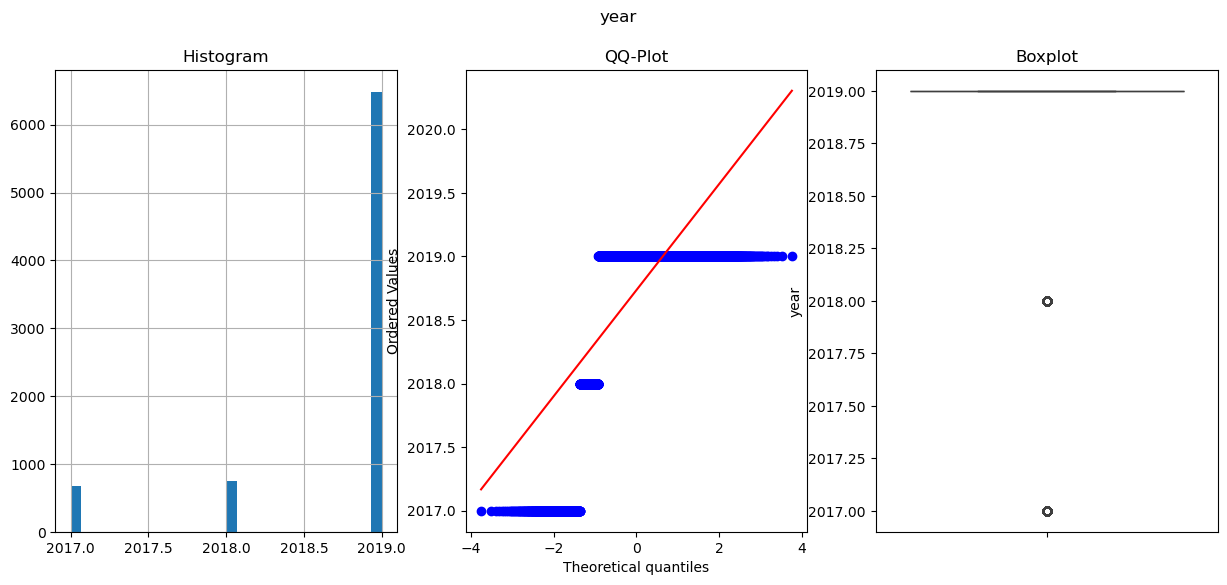

In [273]:
for cols in num_cols:
    diagnostic_plots(listing_enc, cols)

In [274]:
# Logarithmic Transformation: longitude
lt = LogTransformer(variables= ['longitude'])

lt.fit(listing_enc)

listing_enc = lt.transform(listing_enc)

In [275]:
# Yeo_johnson transformation: number_of_reviews
listing_enc['number_of_reviews'], param = stats.yeojohnson(listing_enc['number_of_reviews']) 

print(f'Optimal λ {cols}: ', param)

Optimal λ year:  -0.33492312589716705


In [276]:
# Box Cox Transformation: reviews_per_month
listing_enc['reviews_per_month'], param = stats.boxcox(listing_enc['reviews_per_month']) 
    
print('Optimal λ: ', param)

Optimal λ:  0.3535077879731998


In [277]:
# Box Cox Transformation: calculated_host_listings_count
listing_enc['calculated_host_listings_count'], param = stats.boxcox(listing_enc['calculated_host_listings_count']) 
    
print('Optimal λ: ', param)

Optimal λ:  -0.06785950730391595


Columns not Transformed: availability_365, no_of_days, year, minimum_nights, latitude
    
- Yeo_johnson transformation: minimum_nights
    
    listing_enc['minimum_nights'], param = stats.yeojohnson(listing_enc['minimum_nights']) 
    
    print(f'Optimal λ {cols}: ', param)
    
- Yeo Johnson Transformation: latitude
    
    listing_enc['latitude'], param = stats.yeojohnson(listing_enc['latitude']) 
    
    print(f'Optimal λ latitude: ', param)
    
- box cox:
    
    columns = ['latitude', 'longitude', 'minimum_nights', 'reviews_per_month',  calculated_host_listings', 'no_of_days', 'year']
    
    for cols in columns:
          listing_enc[cols], param = stats.boxcox(listing_enc[cols])
          print('Optimal λ: ', param)
    
- logarithimic:
    
    for cols in columns:
          lt = LogTransformer(variables= [cols])
    
          lt.fit(listing_enc)
    
          listing_enc = lt.transform(listing_enc)
    
- yeo johnson
    
    for cols in num_cols:
    
    listing_enc[cols], param = stats.yeojohnson(listing_enc[cols]) 
        
    
    print(f'Optimal λ {cols}: ', param)


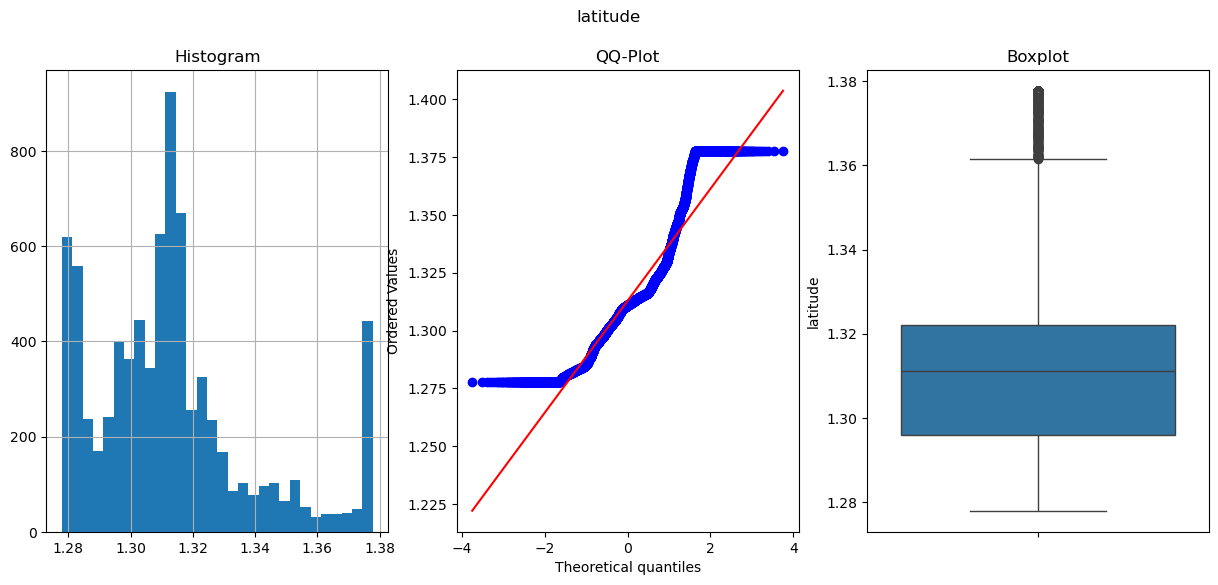

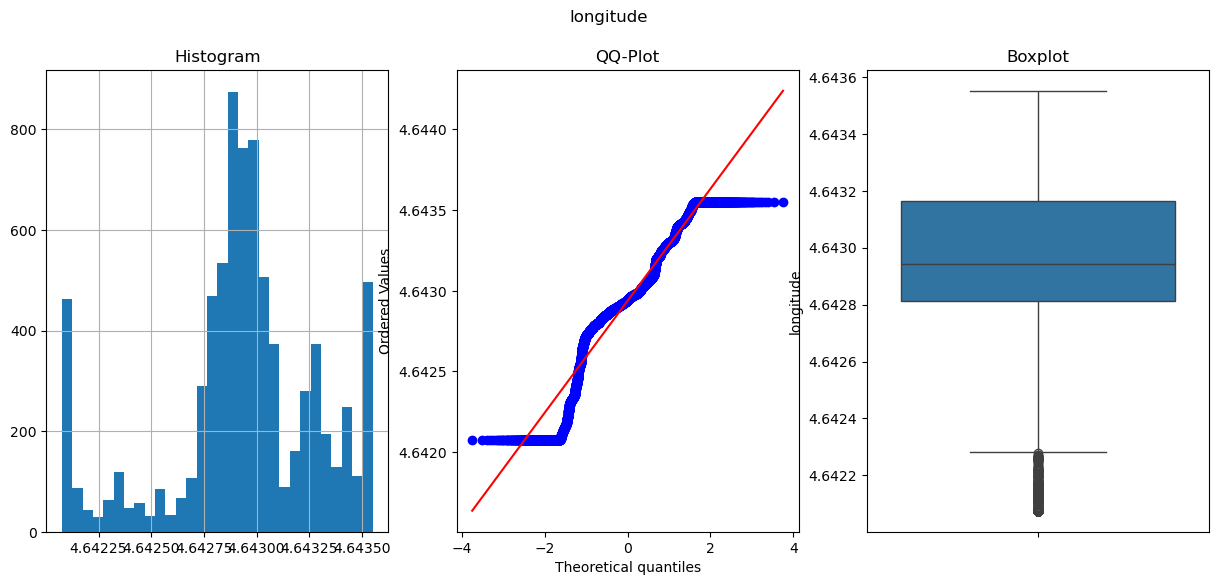

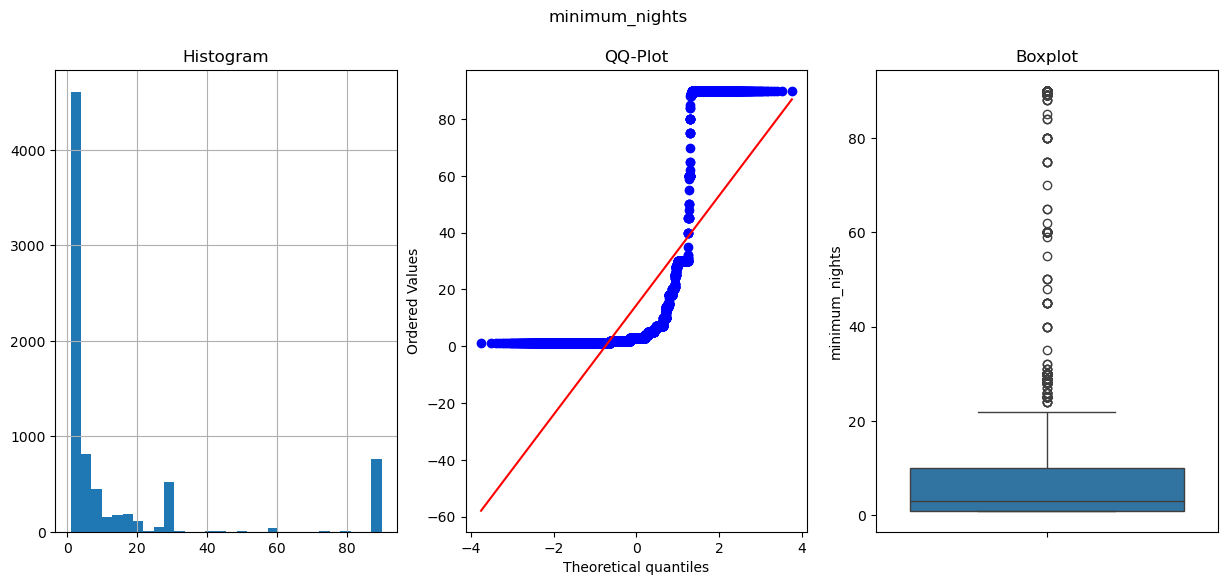

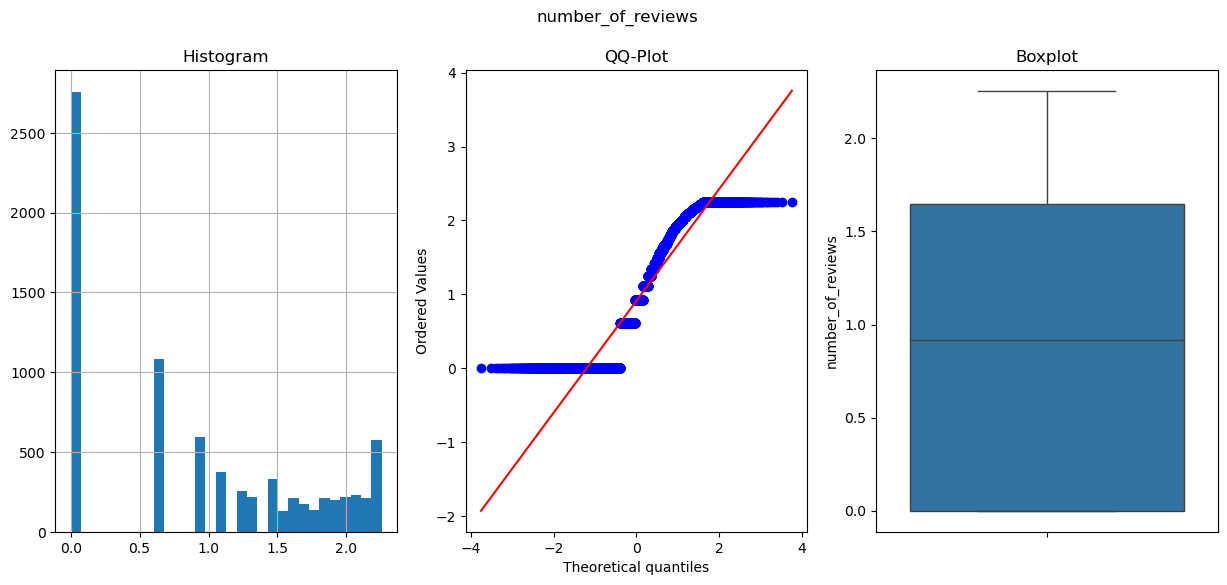

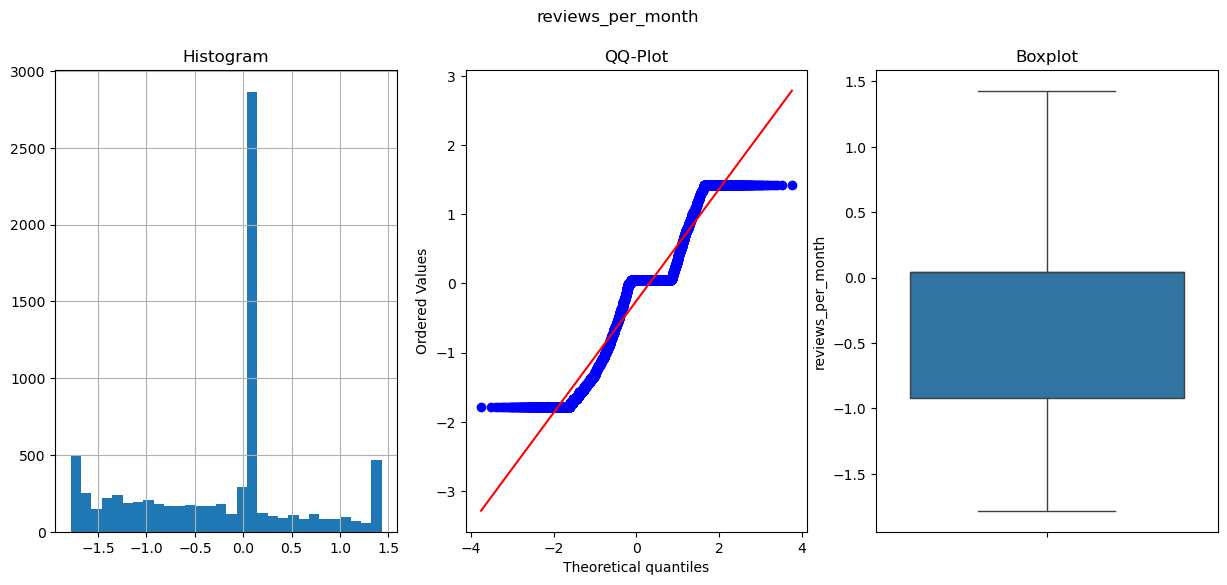

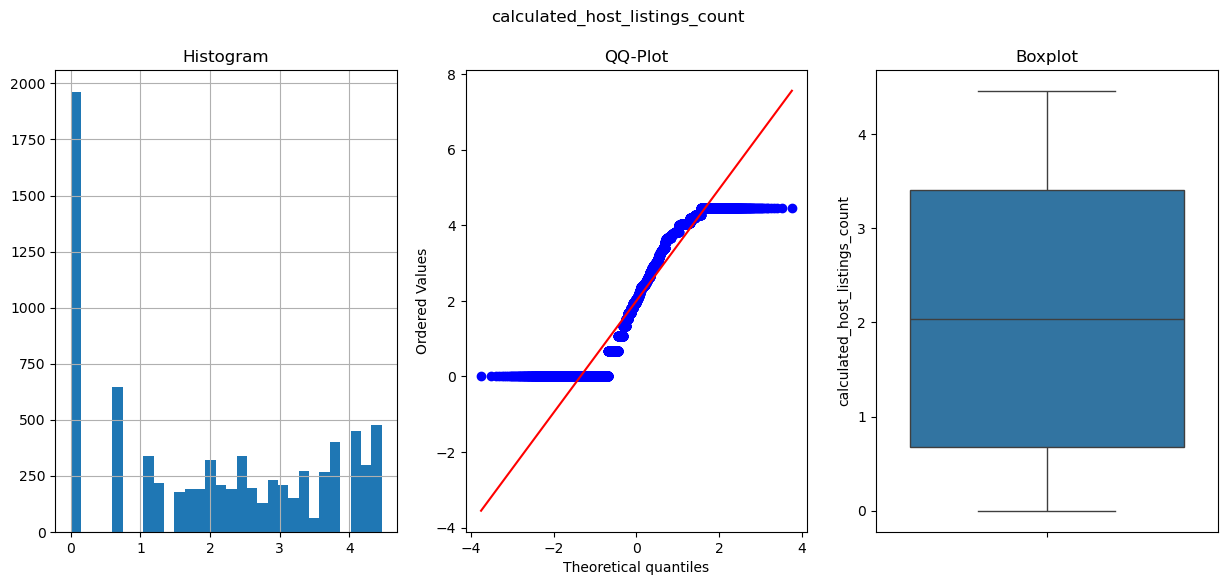

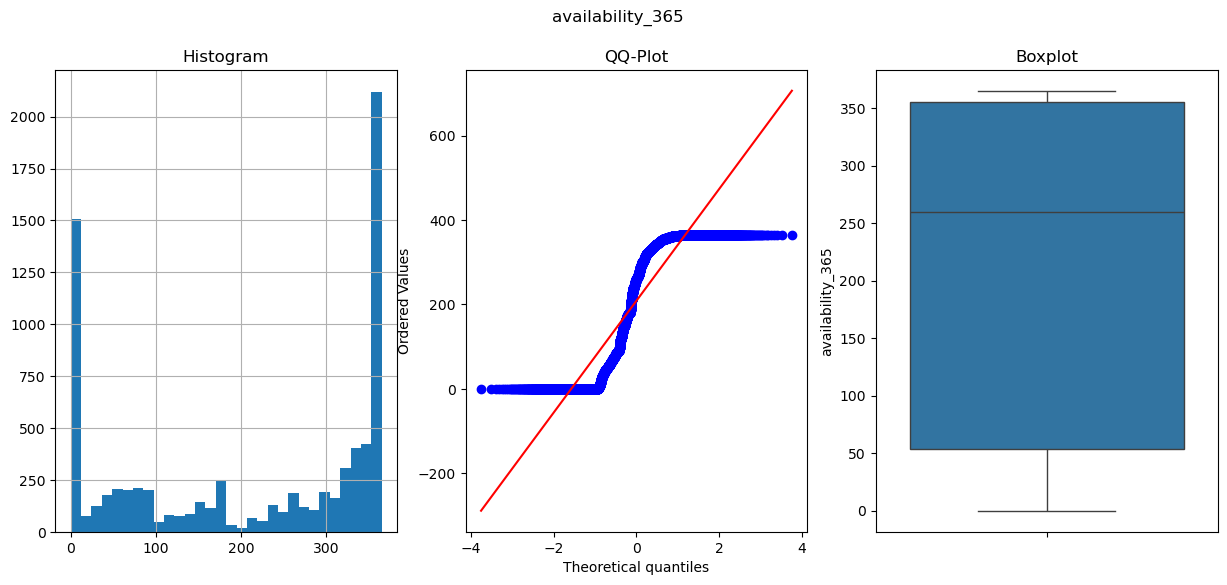

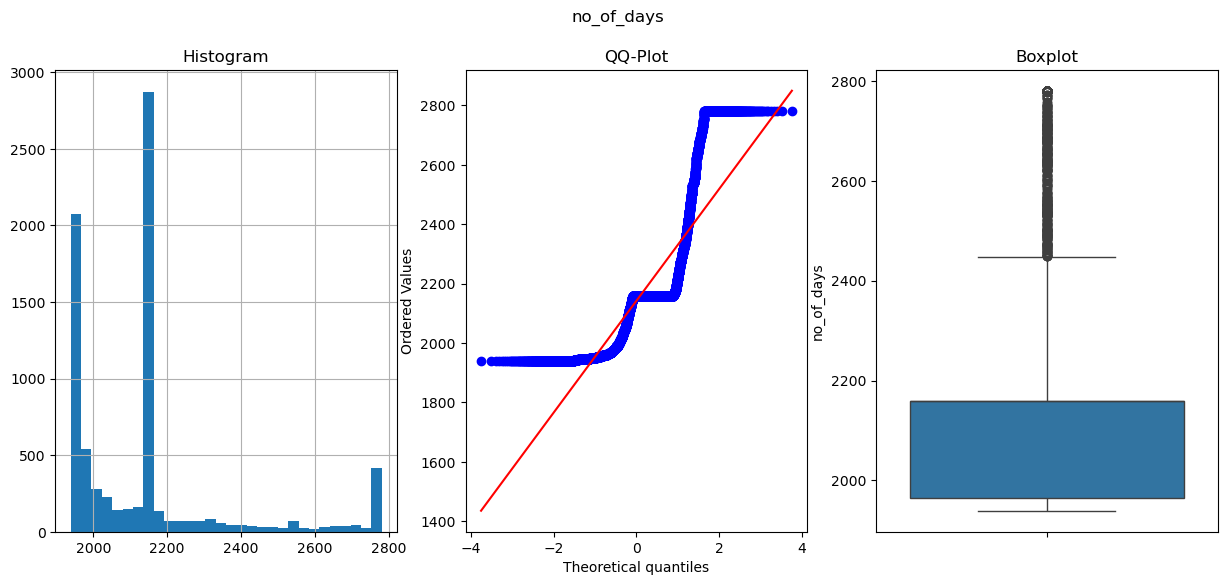

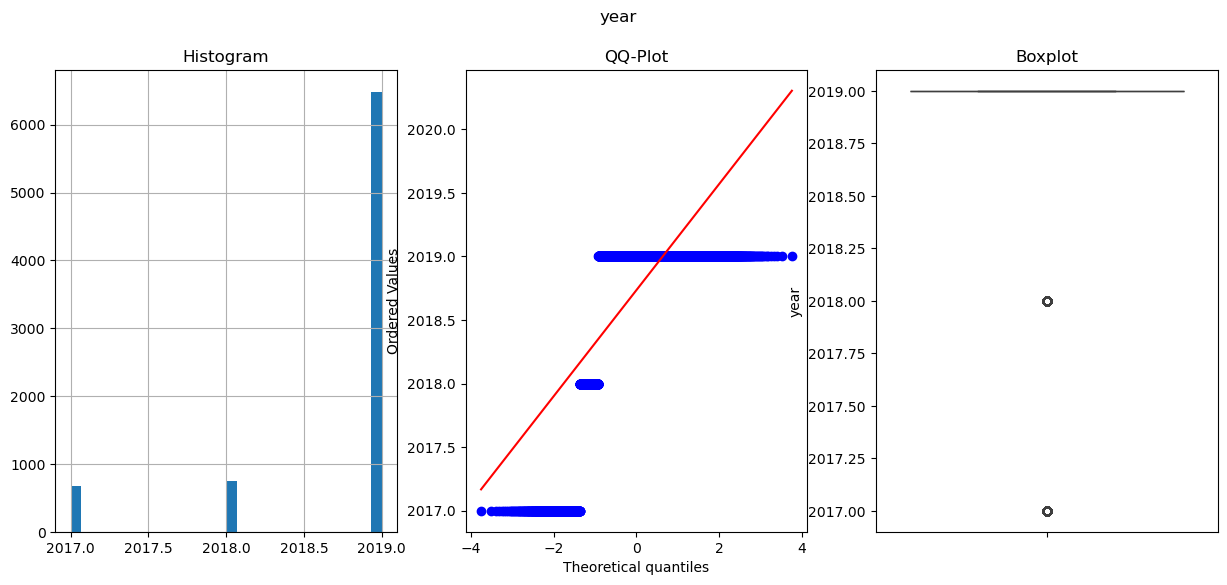

In [279]:
for cols in num_cols:
    diagnostic_plots(listing_enc, cols)

#### Train Test Split

In [281]:
# Define Model Inputs (X) and Output (y)
X = listing_enc.drop(['price'], axis =1)
y = listing_enc["price"]

In [282]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [283]:
X_train.head()

name  host_name  neighbourhood_group  neighbourhood  latitude  \
579    571        281                    1             20  1.324010   
7848  7402         20                    1             19  1.310040   
3106  3014        252                    3             32  1.316760   
2758  2676        738                    1              5  1.304680   
7741  7315       1345                    1             21  1.277906   

      longitude  room_type  minimum_nights  number_of_reviews  \
579    4.642976          1              90           1.108990   
7848   4.643075          0              18           0.000000   
3106   4.642076          1              20           1.347307   
2758   4.642804          1               4           0.000000   
7741   4.642898          0              30           0.000000   

      reviews_per_month  calculated_host_listings_count  availability_365  \
579           -1.575382                        1.058660                42   
7848           0.043067                        4.037644               362   
3106          -1.172479                        4.460810                19   
2758           0.043067                        0.000000                 0   
7741           0.043067                        1.058660               251   

      no_of_days  year  
579       1979.0  2019  
7848      2158.0  2019  
3106      2094.0  2019  
2758      2158.0  2019  
7741      2158.0  2019

In [284]:
X_test.head()

name  host_name  neighbourhood_group  neighbourhood  latitude  \
3596  3494       1278                    1              9  1.304080   
427    419        206                    1              6  1.312430   
5232  3935        252                    1             21  1.277906   
6555  6236       1634                    2              2  1.344410   
6801  6462       1663                    1              6  1.311390   

      longitude  room_type  minimum_nights  number_of_reviews  \
3596   4.643037          0               1           0.919162   
427    4.643279          1               1           1.555362   
5232   4.642912          1              30           0.618571   
6555   4.643551          0               1           1.244139   
6801   4.643211          1               2           0.000000   

      reviews_per_month  calculated_host_listings_count  availability_365  \
3596          -1.256132                        2.473792               344   
427           -1.382211                        1.524664               353   
5232          -1.348828                        4.460810               248   
6555          -0.050831                        0.000000                 0   
6801           0.043067                        2.858725               317   

      no_of_days  year  
3596      2108.0  2019  
427       1988.0  2019  
5232      2111.0  2019  
6555      2044.0  2019  
6801      2158.0  2019

#### Linear Regression Model

#### Train Model

In [287]:
# train the model using training set
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [288]:
# print out the model coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.72033884e-03 -1.36467061e-03 -2.98450114e+00  1.81928955e+00
 -7.14462355e+02 -2.31929139e+03  4.74118499e+01 -6.34821857e-01
 -2.76383920e+01  1.25289099e+01 -8.38442202e+00  4.53283121e-02
  5.62986900e-02  9.65317061e+00]
-7750.567981167813


In [289]:
# Calculated the fitted values for training set
y_fitted = lm.predict(X_train)

# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print(lm.score(X_train, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

283.48699022220563 (Train RMSE)
0.02874928942556776 (Train R^2 Value)


#### Test Model

In [291]:
# calculated the predicated value for testing data
y_pred = lm.predict(X_test)

# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(lm.score(X_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

433.7857781956621 (Test RMSE)
0.02266231650218009 (Test R^2 Value)


#### Model Summary

In [293]:
# The lm model refers to sklearn model and lm2 model refers to statsmodel.api model

# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit functionvv
lm2 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     11.67
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           4.19e-27
Time:                        00:53:32   Log-Likelihood:                -39097.
No. Observations:                5533   AIC:                         7.822e+04
Df Residuals:                    5518   BIC:                         7.832e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7750.5680   6.87e+04     -0.113      0.910   -1.42e+05    1.27e+05
name                               0.0027      0.003      1.082      0.280      -0.002       0.008
host_name                         -0.0014      0.008     -0.168      0.867      -0.017       0.015
neighbourhood_group               -2.9845      5.633     -0.530      0.596     -14.028       8.059
neighbourhood                      1.8193      0.486      3.740      0.000       0.866       2.773
latitude                        -714.4624    186.730     -3.826      0.000   -1080.526    -348.398
longitude                      -2319.2914   1.13e+04     -0.205      0.838   -2.45e+04    1.99e+04
room_type                         47.4118      7.112      6.666      0.000      33.469      61.355
minimum_nights                    -0.6348      0.155     -4.096      0.000      -0.939      -0.331
number_of_reviews                -27.6384      8.298     -3.331      0.001     -43.905     -11.371
reviews_per_month                 12.5289      6.327      1.980      0.048       0.126      24.931
calculated_host_listings_count    -8.3844      3.202     -2.618      0.009     -14.662      -2.107
availability_365                   0.0453      0.030      1.494      0.135      -0.014       0.105
no_of_days                         0.0563      0.061      0.927      0.354      -0.063       0.175
year                               9.6532     21.622      0.446      0.655     -32.735      52.041
==============================================================================
Omnibus:                    12556.583   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         94500330.928
Skew:                          21.468   Prob(JB):                         0.00
Kurtosis:                     641.797   Cond. No.                     9.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Equal Width Discretization

In [295]:
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

disc.fit(X_train)

C:\Users\leong\anaconda\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [296]:
disc.bin_edges_

array([array([   0. ,  745.6, 1491.2, 2236.8, 2982.4, 3728. , 4473.6, 5219.2,
              5964.8, 6710.4, 7456. ])                                       ,
       array([   0. ,  183.1,  366.2,  549.3,  732.4,  915.5, 1098.6, 1281.7,
              1464.8, 1647.9, 1831. ])                                       ,
       array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
       array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
       array([1.277906 , 1.2878928, 1.2978796, 1.3078664, 1.3178532, 1.32784  ,
              1.3378268, 1.3478136, 1.3578004, 1.3677872, 1.377774 ])          ,
       array([4.64207568, 4.64222326, 4.64237084, 4.64251842, 4.642666  ,
              4.64281358, 4.64296116, 4.64310873, 4.64325631, 4.64340389,
              4.64355147])                                               ,
       array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
       array([ 1. ,  9.9, 18.8, 27.7, 36.6, 45.5, 54.4, 63.3, 72.2, 81.1, 90. 

In [297]:
X_train_bin = disc.transform(X_train)

X_train_bin = pd.DataFrame(X_train_bin)

X_train_bin.head()

0    1    2    3    4    5    6    7    8    9    10   11   12   13
0  0.0  1.0  2.0  4.0  4.0  6.0  5.0  9.0  4.0  0.0  2.0  1.0  0.0  9.0
1  9.0  0.0  2.0  4.0  3.0  6.0  0.0  1.0  0.0  5.0  9.0  9.0  2.0  9.0
2  4.0  1.0  7.0  7.0  3.0  0.0  5.0  2.0  5.0  1.0  9.0  0.0  1.0  9.0
3  3.0  4.0  2.0  1.0  2.0  4.0  5.0  0.0  0.0  5.0  0.0  0.0  2.0  9.0
4  9.0  7.0  2.0  5.0  0.0  5.0  0.0  3.0  0.0  5.0  2.0  6.0  2.0  9.0

In [298]:
X_test_bin = disc.transform(X_test)

X_test_bin = pd.DataFrame(X_test_bin)

X_test_bin.head()

0    1    2    3    4    5    6    7    8    9    10   11   12   13
0  4.0  6.0  2.0  2.0  2.0  6.0  0.0  0.0  4.0  1.0  5.0  9.0  2.0  9.0
1  0.0  1.0  2.0  1.0  3.0  8.0  5.0  0.0  6.0  1.0  3.0  9.0  0.0  9.0
2  5.0  1.0  2.0  5.0  0.0  5.0  5.0  3.0  2.0  1.0  9.0  6.0  2.0  9.0
3  8.0  8.0  5.0  0.0  6.0  9.0  0.0  0.0  5.0  5.0  0.0  0.0  1.0  9.0
4  8.0  9.0  2.0  1.0  3.0  7.0  5.0  0.0  0.0  5.0  6.0  8.0  2.0  9.0

In [299]:
X_train_bin.columns = X_train.columns
X_test_bin.columns = X_test.columns

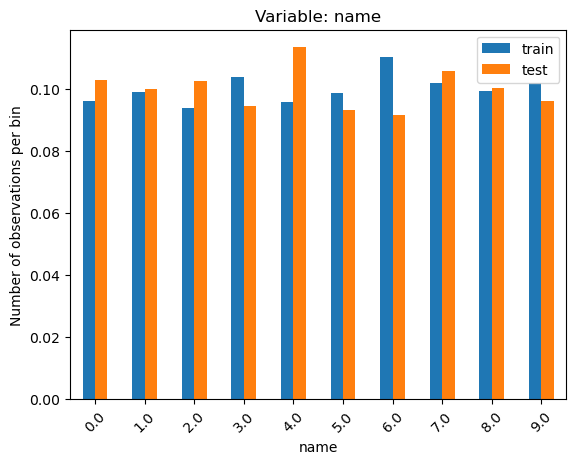

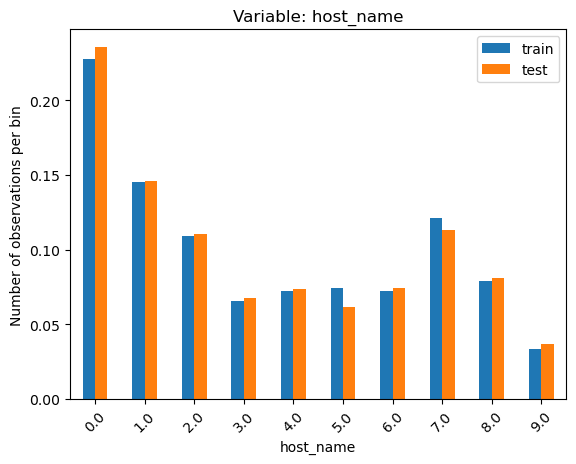

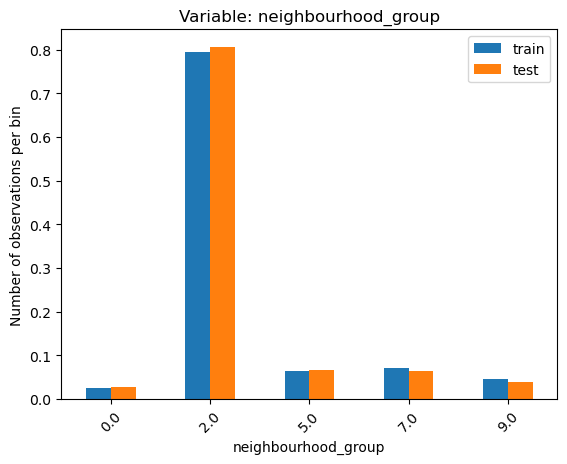

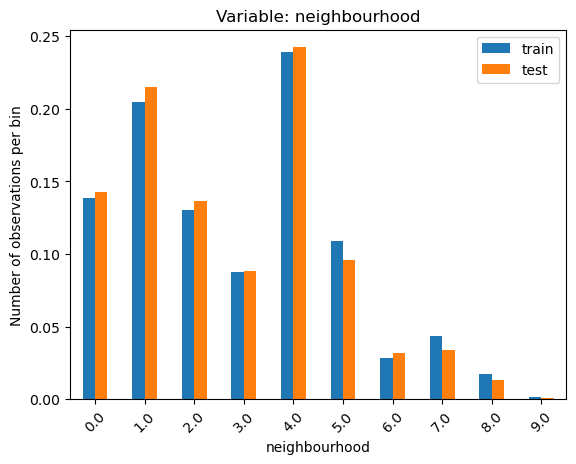

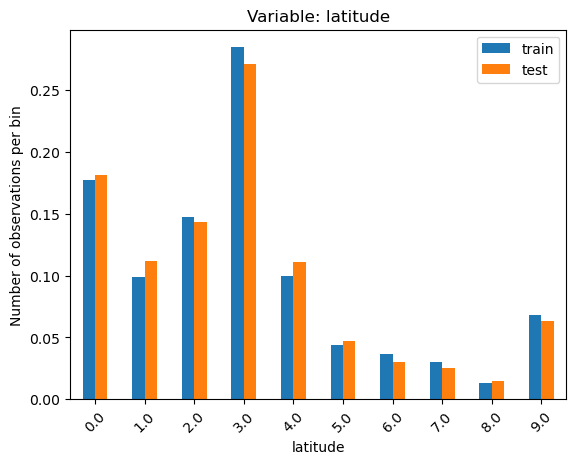

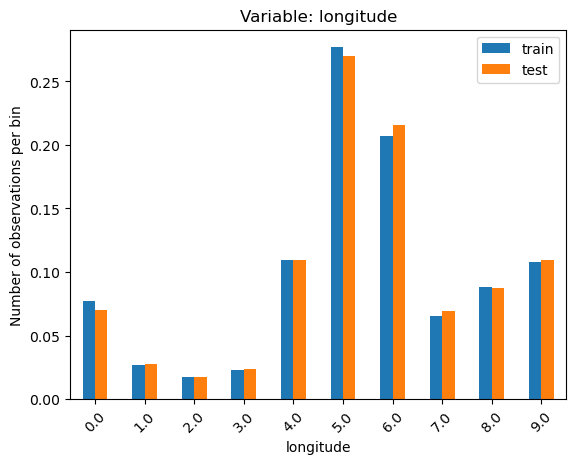

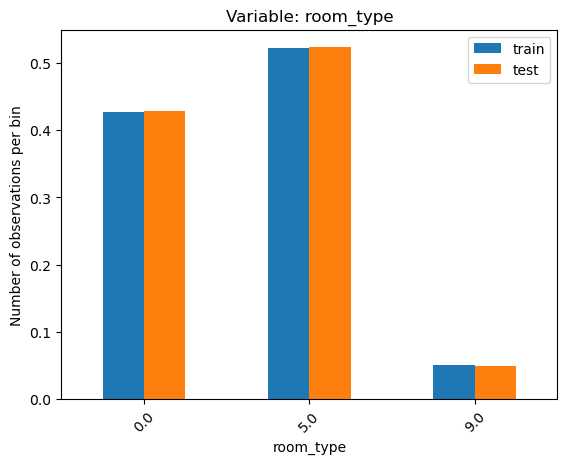

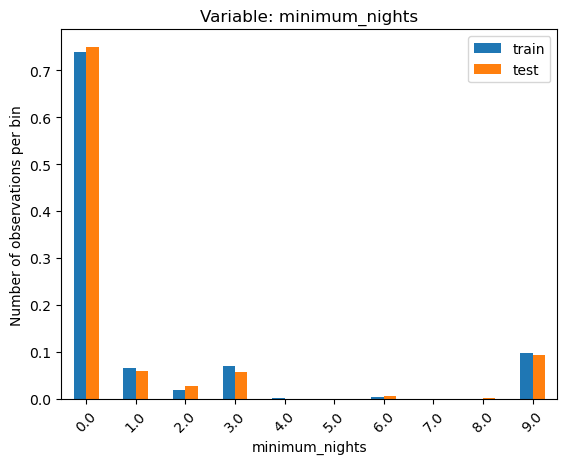

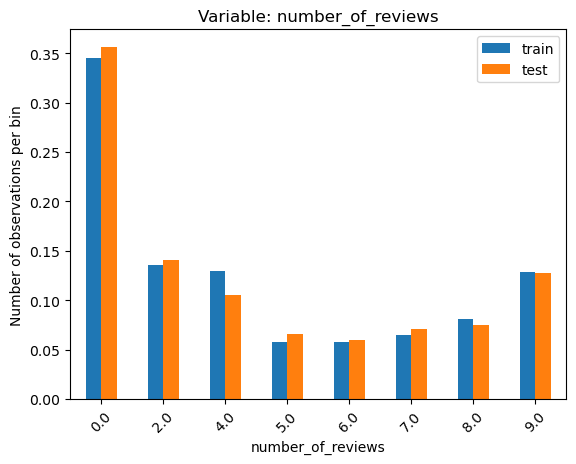

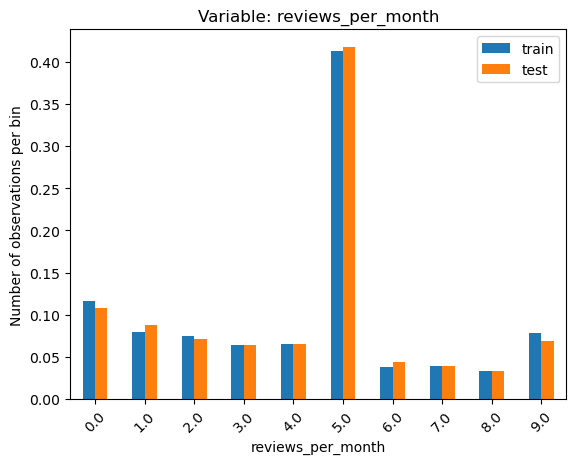

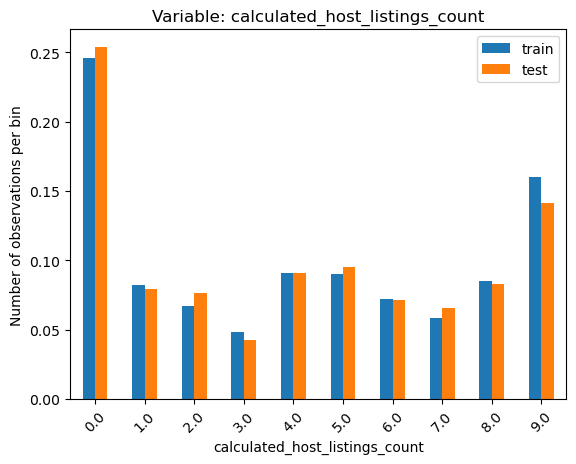

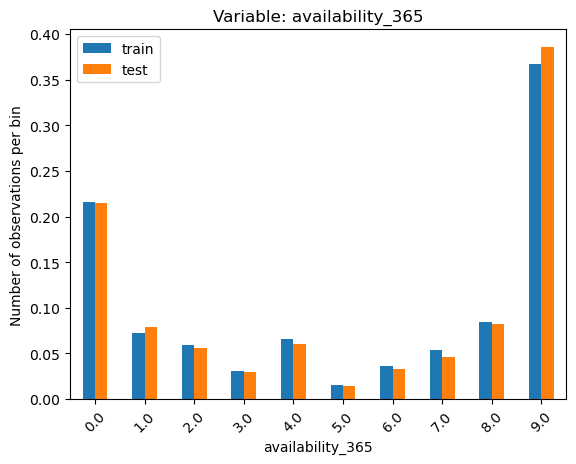

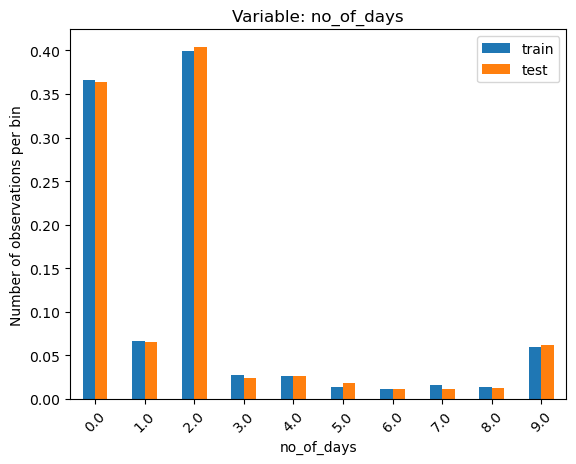

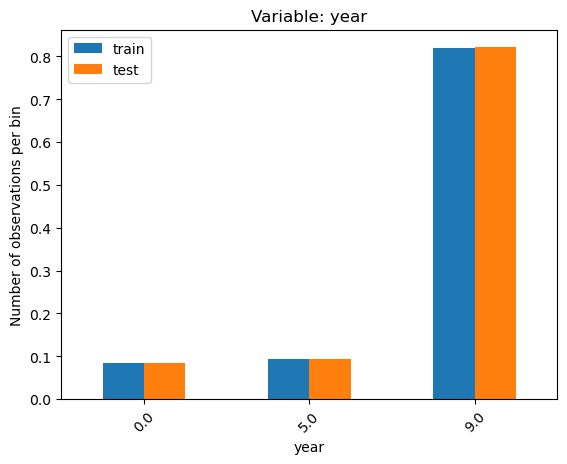

In [300]:
for cols in X_train_bin.columns:

    t1 = X_train_bin.groupby([cols])[cols].count() / len(X_train_bin)
    t2 = X_test_bin.groupby([cols])[cols].count() / len(X_test_bin)
    
    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=45)
    plt.ylabel('Number of observations per bin')
    plt.title (f'Variable: {cols}')

#### Train Model

In [302]:
# train the model using training set
lm = LinearRegression()
lm.fit(X_train_bin, y_train)

LinearRegression()

In [303]:
# print out the model coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.0856489  -0.44035644 -0.46998365  7.30275025 -6.92861087 -0.81913366
 11.24714324 -5.98047616 -6.56286507  4.2644729  -3.89427999  1.60480299
  6.09332211  3.22096155]
113.47058467034154


In [304]:
# Calculated the fitted values for training set
y_fitted = lm.predict(X_train_bin)

# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print(lm.score(X_train_bin, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

283.25043609499284 (Train RMSE)
0.030369522549933525 (Train R^2 Value)


#### Test Model

In [306]:
# calculated the predicated value for testing data
y_pred = lm.predict(X_test_bin)

# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(lm.score(X_test_bin, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

433.6404057667717 (Test RMSE)
0.023317267185694712 (Test R^2 Value)


In [307]:
# Make sure the indices are aligned
X_train_bin = X_train_bin.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

#### Model Summary

In [309]:
# The lm model refers to sklearn model and lm2 model refers to statsmodel.api model

# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit functionvv
lm2 = sm.OLS(y_train, sm.add_constant(X_train_bin)).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     12.34
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           5.79e-29
Time:                        00:53:36   Log-Likelihood:                -39092.
No. Observations:                5533   AIC:                         7.821e+04
Df Residuals:                    5518   BIC:                         7.831e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            113.4706     56.692      2.002      0.045       2.332     224.609
name                               2.0856      1.856      1.124      0.261      -1.552       5.724
host_name                         -0.4404      1.486     -0.296      0.767      -3.354       2.473
neighbourhood_group               -0.4700      2.359     -0.199      0.842      -5.095       4.155
neighbourhood                      7.3028      1.988      3.674      0.000       3.406      11.200
latitude                          -6.9286      1.974     -3.510      0.000     -10.798      -3.059
longitude                         -0.8191      1.721     -0.476      0.634      -4.193       2.555
room_type                         11.2471      1.485      7.572      0.000       8.335      14.159
minimum_nights                    -5.9805      1.493     -4.006      0.000      -8.907      -3.054
number_of_reviews                 -6.5629      1.883     -3.486      0.000     -10.254      -2.872
reviews_per_month                  4.2645      2.111      2.020      0.043       0.125       8.404
calculated_host_listings_count    -3.8943      1.487     -2.619      0.009      -6.809      -0.979
availability_365                   1.6048      1.173      1.369      0.171      -0.694       3.903
no_of_days                         6.0933      5.539      1.100      0.271      -4.766      16.952
year                               3.2210      5.029      0.641      0.522      -6.637      13.079
==============================================================================
Omnibus:                    12570.552   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         95109888.156
Skew:                          21.525   Prob(JB):                         0.00
Kurtosis:                     643.856   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regularization

In [311]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

- Ridge Regression:
- 
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength

ridge.fit(X_train_bin, y_train)

ridge_preds = ridge.predict(X_test_bin)

print("Ridge Regression")

print("R2 Score:", r2_score(y_test, ridge_preds))

print("Mean Squared Error:", sqrt(mean_squared_error(y_test, ridge_preds)))

In [313]:
#### Elastic Net:
  
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio determines the mix between L1 and L2

elastic_net.fit(X_train_bin, y_train)

elastic_net_preds = elastic_net.predict(X_test_bin)

print("\nElastic Net")

print("R2 Score:", r2_score(y_test, elastic_net_preds))

print("Mean Squared Error:", sqrt(mean_squared_error(y_test, elastic_net_preds)))


Elastic Net
R2 Score: 0.023201614640908086
Mean Squared Error: 433.66607947338775


- Lasso:
  
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength

lasso.fit(X_train_bin, y_train)

lasso_preds = lasso.predict(X_test_bin)

print("\nLasso Regression")

print("R2 Score:", r2_score(y_test, lasso_preds))

print("Mean Squared Error:", sqrt(mean_squared_error(y_test, lasso_preds)))

#### Standardization

In [316]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_bin)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_bin)
X_test_scaled = scaler.transform(X_test_bin)

In [317]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([4.55882885, 3.43665281, 2.81782035, 2.85993132, 3.01644677,
       5.33580336, 3.06470269, 1.23639978, 3.68028194, 4.21489246,
       4.13627327, 5.19483101, 1.95138261, 7.85252124])

In [318]:
# the scaler stores the standard deviation deviation of the features,
# learned from train set

scaler.scale_

array([2.8608964 , 2.94828757, 2.00858284, 2.07462646, 2.45205253,
       2.3647999 , 2.78206659, 2.72204053, 3.36924081, 2.50902916,
       3.35283544, 3.7552535 , 2.40863866, 2.66835643])

In [319]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

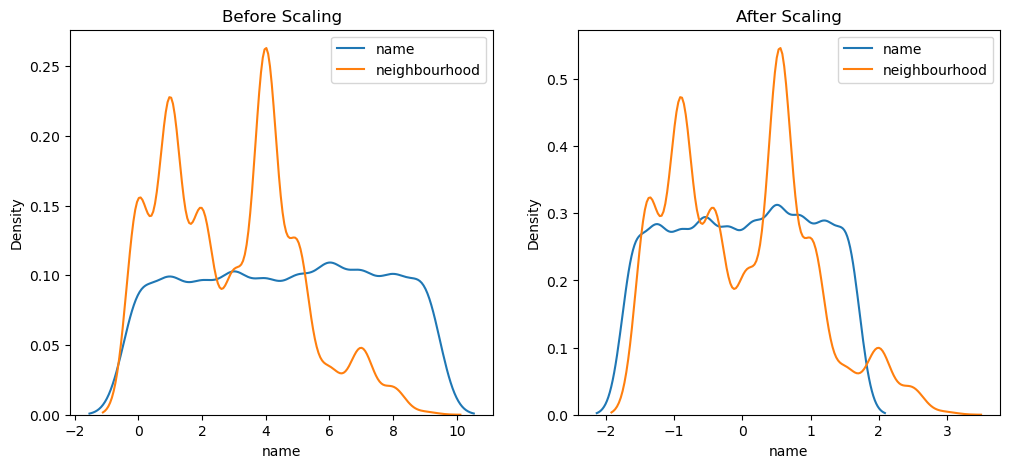

In [320]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_bin['name'], ax=ax1, label ='name')
sns.kdeplot(X_train_bin['neighbourhood'], ax=ax1, label ='neighbourhood')
ax1.legend()

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['name'], ax=ax2, label ='name')
sns.kdeplot(X_train_scaled['neighbourhood'], ax=ax2, label ='neighbourhood')
ax2.legend()
plt.show()

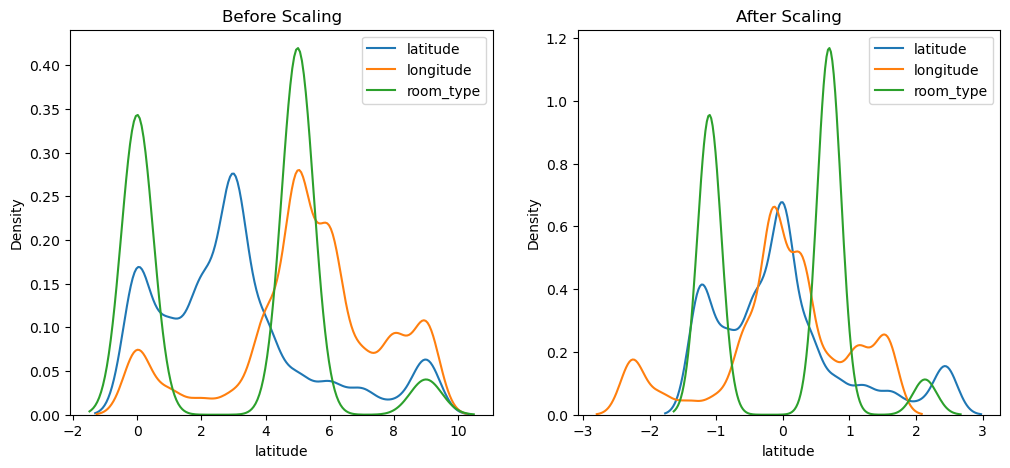

In [321]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_bin['latitude'], ax=ax1, label ='latitude')
sns.kdeplot(X_train_bin['longitude'], ax=ax1, label ='longitude')
sns.kdeplot(X_train_bin['room_type'], ax=ax1, label ='room_type')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['latitude'], ax=ax2, label ='latitude')
sns.kdeplot(X_train_scaled['longitude'], ax=ax2, label ='longitude')
sns.kdeplot(X_train_scaled['room_type'], ax=ax2, label ='room_type')
ax2.legend()
plt.show()

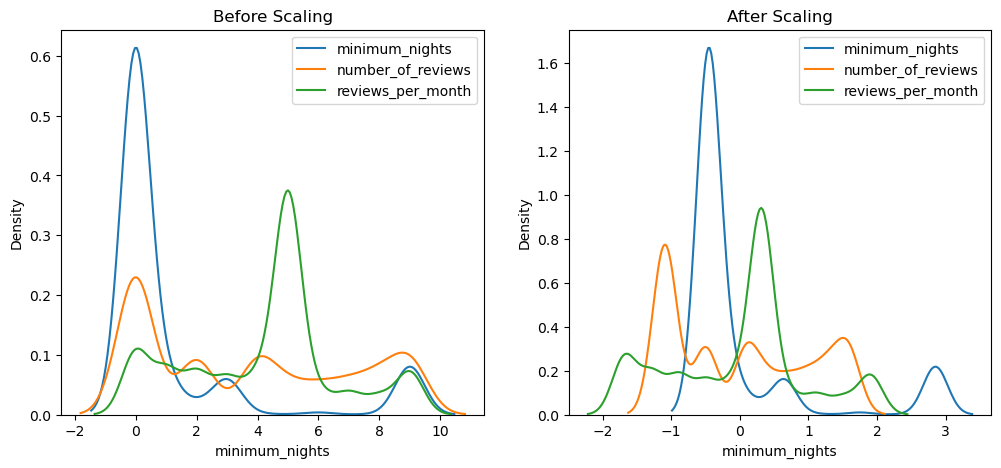

In [322]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_bin['minimum_nights'], ax=ax1, label ='minimum_nights')
sns.kdeplot(X_train_bin['number_of_reviews'], ax=ax1, label ='number_of_reviews')
sns.kdeplot(X_train_bin['reviews_per_month'], ax=ax1, label ='reviews_per_month')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['minimum_nights'], ax=ax2, label ='minimum_nights')
sns.kdeplot(X_train_scaled['number_of_reviews'], ax=ax2, label ='number_of_reviews')
sns.kdeplot(X_train_scaled['reviews_per_month'], ax=ax2, label ='reviews_per_month')
ax2.legend()
plt.show()

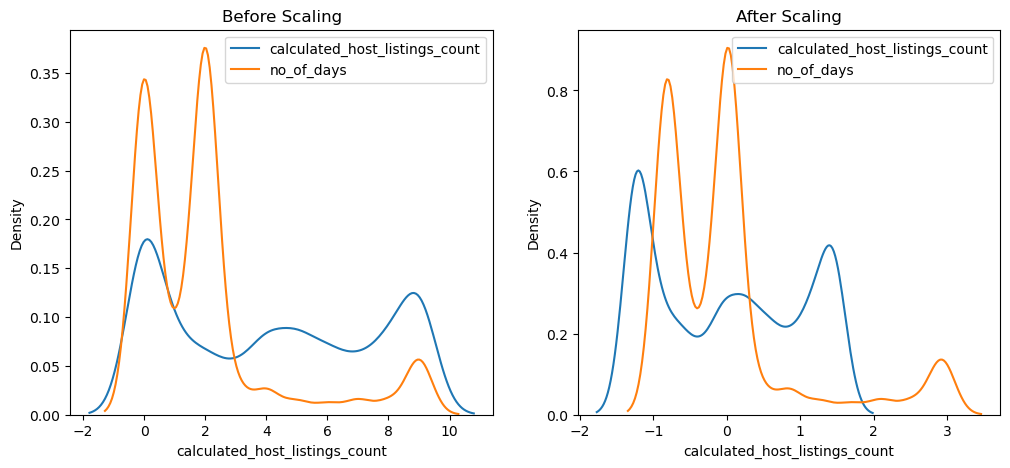

In [323]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_bin['calculated_host_listings_count'], ax=ax1, label ='calculated_host_listings_count')
sns.kdeplot(X_train_bin['no_of_days'], ax=ax1, label ='no_of_days')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['calculated_host_listings_count'], ax=ax2, label ='calculated_host_listings_count')
sns.kdeplot(X_train_scaled['no_of_days'], ax=ax2, label ='no_of_days')
ax2.legend()
plt.show()

#### Train Model

In [325]:
# train the model using training set
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [326]:
# print out the model coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[  5.96682543  -1.2982974   -0.9440011   15.15047892 -16.98931781
  -1.9370872   31.29030148 -16.27909847 -22.11187281  10.69968687
 -13.05687997   6.02644205  14.67661122   8.59467346]
166.0637990240376


In [327]:
# Calculated the fitted values for training set
y_fitted = lm.predict(X_train_scaled)

# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print(lm.score(X_train_scaled, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

283.25043609499284 (Train RMSE)
0.030369522549933525 (Train R^2 Value)


#### Test Model

In [329]:
# calculated the predicated value for testing data
y_pred = lm.predict(X_test_scaled)

# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(lm.score(X_test_scaled, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

433.6404057667717 (Test RMSE)
0.023317267185694712 (Test R^2 Value)


In [330]:
# Make sure the indices are aligned
X_train_scaled = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

#### Model Summary

In [332]:
# The lm model refers to sklearn model and lm2 model refers to statsmodel.api model

# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit functionvv
lm2 = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     12.34
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           5.79e-29
Time:                        00:53:38   Log-Likelihood:                -39092.
No. Observations:                5533   AIC:                         7.821e+04
Df Residuals:                    5518   BIC:                         7.831e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            166.0638      3.813     43.551      0.000     158.589     173.539
name                               5.9668      5.309      1.124      0.261      -4.441      16.375
host_name                         -1.2983      4.382     -0.296      0.767      -9.889       7.293
neighbourhood_group               -0.9440      4.739     -0.199      0.842     -10.234       8.346
neighbourhood                     15.1505      4.124      3.674      0.000       7.066      23.235
latitude                         -16.9893      4.840     -3.510      0.000     -26.478      -7.501
longitude                         -1.9371      4.070     -0.476      0.634      -9.916       6.042
room_type                         31.2903      4.133      7.572      0.000      23.189      39.392
minimum_nights                   -16.2791      4.064     -4.006      0.000     -24.245      -8.313
number_of_reviews                -22.1119      6.343     -3.486      0.000     -34.547      -9.677
reviews_per_month                 10.6997      5.298      2.020      0.043       0.314      21.085
calculated_host_listings_count   -13.0569      4.986     -2.619      0.009     -22.831      -3.283
availability_365                   6.0264      4.403      1.369      0.171      -2.605      14.658
no_of_days                        14.6766     13.342      1.100      0.271     -11.478      40.832
year                               8.5947     13.418      0.641      0.522     -17.710      34.900
==============================================================================
Omnibus:                    12570.552   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         95109888.156
Skew:                          21.525   Prob(JB):                         0.00
Kurtosis:                     643.856   Cond. No.                         8.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Principal Component Analysis (PCA)

In [334]:
from sklearn.decomposition import PCA
pca = PCA()

In [335]:
print(X_train_scaled.shape)

(5533, 14)


In [336]:
pca.fit(X_train_scaled)

PCA()

In [337]:
train_t = pca.transform(X_train_scaled)
test_t = pca.transform(X_test_scaled)

In [338]:
print(len(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

14
[0.21110909 0.14063548 0.12036047 0.09619107 0.08095889 0.07227052
 0.05730788 0.05206972 0.04770741 0.03428604 0.03247764 0.02758574
 0.02422925 0.0028108 ]


Text(0, 0.5, 'Percentage of Variance Explained')

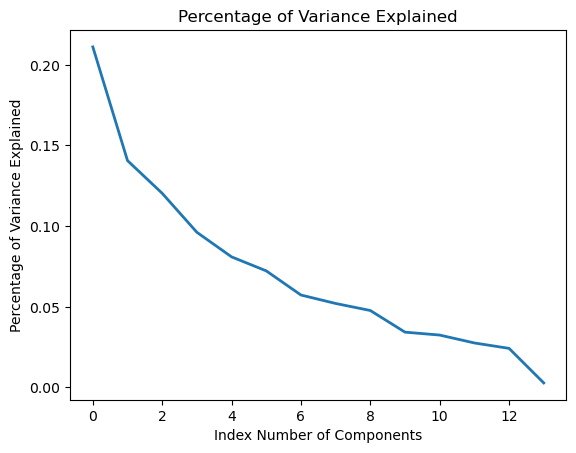

In [339]:
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.title('Percentage of Variance Explained')
plt.xlabel('Index Number of Components')
plt.ylabel('Percentage of Variance Explained')

### 2.3 Correlation Analysis <a id="part2.3"></a>

Investigate the relationships between different features/variables. Which features are likely helpful for making predications? Did you create any new features/variables? Did you drop any features/variables and why? 

In [341]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     12.34
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           5.79e-29
Time:                        00:53:38   Log-Likelihood:                -39092.
No. Observations:                5533   AIC:                         7.821e+04
Df Residuals:                    5518   BIC:                         7.831e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            166.0638      3.813     43.551      0.000     158.589     173.539
name                               5.9668      5.309      1.124      0.261      -4.441      16.375
host_name                         -1.2983      4.382     -0.296      0.767      -9.889       7.293
neighbourhood_group               -0.9440      4.739     -0.199      0.842     -10.234       8.346
neighbourhood                     15.1505      4.124      3.674      0.000       7.066      23.235
latitude                         -16.9893      4.840     -3.510      0.000     -26.478      -7.501
longitude                         -1.9371      4.070     -0.476      0.634      -9.916       6.042
room_type                         31.2903      4.133      7.572      0.000      23.189      39.392
minimum_nights                   -16.2791      4.064     -4.006      0.000     -24.245      -8.313
number_of_reviews                -22.1119      6.343     -3.486      0.000     -34.547      -9.677
reviews_per_month                 10.6997      5.298      2.020      0.043       0.314      21.085
calculated_host_listings_count   -13.0569      4.986     -2.619      0.009     -22.831      -3.283
availability_365                   6.0264      4.403      1.369      0.171      -2.605      14.658
no_of_days                        14.6766     13.342      1.100      0.271     -11.478      40.832
year                               8.5947     13.418      0.641      0.522     -17.710      34.900
==============================================================================
Omnibus:                    12570.552   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         95109888.156
Skew:                          21.525   Prob(JB):                         0.00
Kurtosis:                     643.856   Cond. No.                         8.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Drop Unnecessary Columns- Choose not to proceed

X_train_drop = X_train_scaled.drop('month', axis = 1)

X_test_drop = X_test_scaled.drop('month', axis = 1)

283.52060381943244 (Train RMSE)

0.028518949643919767 (Train R^2 Value

433.9572003270566 (Test RMSE)

0.021889721268957052 (Test R^2 Value))

X_train_drop = X_train_scaled.drop('quarter', axis = 1)

X_test_drop = X_test_scaled.drop('quarter', axis = 1)

283.5207491892402 (Train RMSE)

0.028517953426728915 (Train R^2 Value)

433.9501874408292 (Test RMSE)

0.02192133415922637 (Test R^2 Value)

X_train_drop = X_train_scaled.drop('minimum_nights', axis = 1)

X_test_drop = X_test_scaled.drop('minimum_nights', axis = 1)

283.52006874271524 (Train RMSE)

0.02852261651252619 (Train R^2 Value)

433.94636486431483 (Test RMSE)

0.02193856546447015 (Test R^2 Value)

#### Creation of Column: Latititude & Longitude

In [347]:
X_train_scaled['latitude_longitude'] = X_train_scaled['latitude'] * X_train_scaled['longitude']
X_test_scaled['latitude_longitude'] = X_test_scaled['latitude'] * X_test_scaled['longitude']

In [348]:
# train the model using training set
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [349]:
# print out the model coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[  6.10051518  -1.49379883   1.16499078  15.47880314 -20.33234137
   2.64857659  31.45097745 -16.01247837 -22.48620506  10.60816743
 -13.77765178   6.38059618  14.50378768   8.41480123  -6.69003771]
166.1097651455799


In [350]:
# Calculated the fitted values for training set
y_fitted = lm.predict(X_train_scaled)

# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print(lm.score(X_train_scaled, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

283.1730903003064 (Train RMSE)
0.030898994640825683 (Train R^2 Value)


In [351]:
# calculated the predicated value for testing data
y_pred = lm.predict(X_test_scaled)

# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(lm.score(X_test_scaled, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

433.6206793731724 (Test RMSE)
0.023406124171971743 (Test R^2 Value)


In [352]:
# The lm model refers to sklearn model and lm2 model refers to statsmodel.api model

# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit functionvv
lm2 = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.73
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           5.16e-29
Time:                        00:53:39   Log-Likelihood:                -39091.
No. Observations:                5533   AIC:                         7.821e+04
Df Residuals:                    5517   BIC:                         7.832e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            166.1098      3.813     43.570      0.000     158.636     173.584
name                               6.1005      5.309      1.149      0.251      -4.307      16.508
host_name                         -1.4938      4.383     -0.341      0.733     -10.086       7.098
neighbourhood_group                1.1650      4.891      0.238      0.812      -8.424      10.754
neighbourhood                     15.4788      4.128      3.750      0.000       7.387      23.571
latitude                         -20.3323      5.208     -3.904      0.000     -30.542     -10.122
longitude                          2.6486      4.851      0.546      0.585      -6.862      12.159
room_type                         31.4510      4.133      7.610      0.000      23.349      39.553
minimum_nights                   -16.0125      4.066     -3.938      0.000     -23.983      -8.042
number_of_reviews                -22.4862      6.346     -3.544      0.000     -34.926     -10.046
reviews_per_month                 10.6082      5.297      2.003      0.045       0.224      20.992
calculated_host_listings_count   -13.7777      5.002     -2.754      0.006     -23.584      -3.972
availability_365                   6.3806      4.407      1.448      0.148      -2.259      15.020
no_of_days                        14.5038     13.340      1.087      0.277     -11.647      40.655
year                               8.4148     13.416      0.627      0.531     -17.886      34.716
latitude_longitude                -6.6900      3.853     -1.736      0.083     -14.244       0.864
==============================================================================
Omnibus:                    12562.762   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         94737392.816
Skew:                          21.494   Prob(JB):                         0.00
Kurtosis:                     642.598   Cond. No.                         8.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Creation of Column: Host Activity

In [354]:
X_train_scaled['host_active'] = X_train_scaled['calculated_host_listings_count'] * X_train_scaled['number_of_reviews']
X_test_scaled['host_active'] = X_test_scaled['calculated_host_listings_count'] * X_test_scaled['number_of_reviews']

In [355]:
# train the model using training set
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [356]:
# print out the model coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[  8.92142328  -0.94441557   1.15443636  15.49779256 -20.04532033
   2.27535734  31.02566777 -16.04734659 -19.5631668   12.36693988
 -11.120103     7.42807908  19.07453405   9.67836967  -6.53198884
  11.3940058 ]
167.48006185168495


In [357]:
# Calculated the fitted values for training set
y_fitted = lm.predict(X_train_scaled)

# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print(lm.score(X_train_scaled, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

283.00183856538024 (Train RMSE)
0.03207078709655209 (Train R^2 Value)


In [358]:
# calculated the predicated value for testing data
y_pred = lm.predict(X_test_scaled)

# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(lm.score(X_test_scaled, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

433.6865755590191 (Test RMSE)
0.02310928085042885 (Test R^2 Value)


In [359]:
# The lm model refers to sklearn model and lm2 model refers to statsmodel.api model

# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit functionvv
lm2 = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     11.42
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           8.31e-30
Time:                        00:53:39   Log-Likelihood:                -39087.
No. Observations:                5533   AIC:                         7.821e+04
Df Residuals:                    5516   BIC:                         7.832e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            167.4801      3.847     43.532      0.000     159.938     175.022
name                               8.9214      5.417      1.647      0.100      -1.698      19.541
host_name                         -0.9444      4.386     -0.215      0.830      -9.542       7.653
neighbourhood_group                1.1544      4.889      0.236      0.813      -8.430      10.739
neighbourhood                     15.4978      4.126      3.757      0.000       7.410      23.586
latitude                         -20.0453      5.207     -3.850      0.000     -30.252      -9.838
longitude                          2.2754      4.851      0.469      0.639      -7.235      11.785
room_type                         31.0257      4.134      7.505      0.000      22.921      39.130
minimum_nights                   -16.0473      4.064     -3.949      0.000     -24.014      -8.081
number_of_reviews                -19.5632      6.443     -3.037      0.002     -32.193      -6.933
reviews_per_month                 12.3669      5.338      2.317      0.021       1.903      22.831
calculated_host_listings_count   -11.1201      5.104     -2.179      0.029     -21.126      -1.114
availability_365                   7.4281      4.423      1.679      0.093      -1.243      16.100
no_of_days                        19.0745     13.450      1.418      0.156      -7.292      45.441
year                               9.6784     13.418      0.721      0.471     -16.627      35.983
latitude_longitude                -6.5320      3.852     -1.696      0.090     -14.083       1.019
host_active                       11.3940      4.409      2.584      0.010       2.750      20.038
==============================================================================
Omnibus:                    12551.163   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         94281626.535
Skew:                          21.446   Prob(JB):                         0.00
Kurtosis:                     641.057   Cond. No.                         8.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.4 Export the data <a id="part2.4"></a>

#### Combine Train & Test Data

In [362]:
# Combine train and test features
X_combined = pd.concat([X_train_scaled, X_test_scaled], axis=0).reset_index(drop=True)

In [363]:
X_combined.head()

name  host_name  neighbourhood_group  neighbourhood  latitude  \
0 -1.593497  -0.826464            -0.407163       0.549530  0.401114   
1  1.552370  -1.165644            -0.407163       0.549530 -0.006707   
2 -0.195333  -0.826464             2.082154       1.995573 -0.006707   
3 -0.544874   0.191076            -0.407163      -0.896514 -0.414529   
4  1.552370   1.208616            -0.407163       1.031544 -1.230172   

   longitude  room_type  minimum_nights  number_of_reviews  reviews_per_month  \
0   0.280868   0.695633        2.852125           0.094893          -1.679890   
1   0.280868  -1.101592       -0.086847          -1.092318           0.312913   
2  -2.256345   0.695633        0.280525           0.391696          -1.281329   
3  -0.564870   0.695633       -0.454218          -1.092318           0.312913   
4  -0.142001  -1.101592        0.647896          -1.092318           0.312913   

   calculated_host_listings_count  availability_365  no_of_days      year  \
0                       -0.637154         -1.117057   -0.810160  0.430032   
1                        1.450631          1.013292    0.020185  0.430032   
2                        1.450631         -1.383350   -0.394988  0.430032   
3                       -1.233664         -1.383350    0.020185  0.430032   
4                       -0.637154          0.214411    0.020185  0.430032   

   latitude_longitude  host_active  
0            0.112660    -0.060462  
1           -0.001884    -1.584550  
2            0.015134     0.568206  
3            0.234155     1.347554  
4            0.174685     0.695975

In [364]:
# Combine train and test targets
y_combined = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

In [365]:
y_combined.head()

0     71
1     49
2    136
3    150
4     74
Name: price, dtype: int64

In [366]:
# Add the target variable to the features DataFrame
data_combined = pd.concat([X_combined, y_combined], axis=1)

In [367]:
data_combined.head()

name  host_name  neighbourhood_group  neighbourhood  latitude  \
0 -1.593497  -0.826464            -0.407163       0.549530  0.401114   
1  1.552370  -1.165644            -0.407163       0.549530 -0.006707   
2 -0.195333  -0.826464             2.082154       1.995573 -0.006707   
3 -0.544874   0.191076            -0.407163      -0.896514 -0.414529   
4  1.552370   1.208616            -0.407163       1.031544 -1.230172   

   longitude  room_type  minimum_nights  number_of_reviews  reviews_per_month  \
0   0.280868   0.695633        2.852125           0.094893          -1.679890   
1   0.280868  -1.101592       -0.086847          -1.092318           0.312913   
2  -2.256345   0.695633        0.280525           0.391696          -1.281329   
3  -0.564870   0.695633       -0.454218          -1.092318           0.312913   
4  -0.142001  -1.101592        0.647896          -1.092318           0.312913   

   calculated_host_listings_count  availability_365  no_of_days      year  \
0                       -0.637154         -1.117057   -0.810160  0.430032   
1                        1.450631          1.013292    0.020185  0.430032   
2                        1.450631         -1.383350   -0.394988  0.430032   
3                       -1.233664         -1.383350    0.020185  0.430032   
4                       -0.637154          0.214411    0.020185  0.430032   

   latitude_longitude  host_active  price  
0            0.112660    -0.060462     71  
1           -0.001884    -1.584550     49  
2            0.015134     0.568206    136  
3            0.234155     1.347554    150  
4            0.174685     0.695975     74

In [368]:
data_combined.to_csv("listings_new.csv ", index=False)

### 2.5 Modeling <a id="part2.5"></a>

In [370]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train_scaled, y_train)

In [371]:
y_train_preds_linreg = linreg.predict(X_train_scaled)
y_test_preds_linreg = linreg.predict(X_test_scaled)

In [372]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on train data is {train_mse_linreg:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on test data is {test_mse_linreg:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on train data is {train_rmse_linreg:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on test data is {test_rmse_linreg:.4f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_linreg

train_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on train data is {train_r2_linreg:.4f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_linreg

test_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on test data is {test_r2_linreg:.4f}.")


The LinReg Model's MSE on train data is 80090.0406.
The LinReg Model's MSE on test data is 188084.0458.

The LinReg Model's RMSE on train data is 283.0018.
The LinReg Model's RMSE on test data is 433.6866.

The LinReg Model's R2 on train data is 0.0321.
The LinReg Model's R2 on test data is 0.0231.


C:\Users\leong\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 2.6 Performance Analysis <a id="part2.6"></a>

In [374]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

# Define the model
model = LinearRegression()

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metric (e.g., MSE)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring=scorer)

# Calculate mean and standard deviation of scores
mean_score = -cv_scores.mean()  # Negate to make MSE positive
std_score = cv_scores.std()

print(f"Mean MSE: {mean_score:.4f}")
print(f"Standard Deviation of MSE: {std_score:.4f}")


Mean MSE: 80600.9307
Standard Deviation of MSE: 38647.7045


In [375]:
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    print(f"  Train indices: {train_idx}")
    print(f"  Validation indices: {val_idx}\n")


Fold 1:
  Train indices: [   1    2    3 ... 7899 7901 7902]
  Validation indices: [   0    8   14 ... 7900 7903 7904]

Fold 2:
  Train indices: [   0    1    2 ... 7902 7903 7904]
  Validation indices: [  12   15   29 ... 7891 7897 7898]

Fold 3:
  Train indices: [   0    1    2 ... 7901 7903 7904]
  Validation indices: [   6   18   24 ... 7895 7899 7902]

Fold 4:
  Train indices: [   0    3    4 ... 7902 7903 7904]
  Validation indices: [   1    2    7 ... 7883 7885 7901]

Fold 5:
  Train indices: [   0    1    2 ... 7902 7903 7904]
  Validation indices: [   3    4    5 ... 7887 7889 7893]



#### Correlation Matrix

In [377]:
# Get correlation of each feature with the target variable (e.g., 'price')
target_corr = corr_matrix['is_promoted'].sort_values(ascending=False)

In [378]:
# Print the correlation values
print(target_corr)

is_promoted             1.000000
KPIs_met >80%           0.380519
avg_training_score      0.285668
previous_year_rating    0.282337
awards_won?             0.211287
region                  0.168259
department              0.087452
education               0.051220
dept_gender             0.025858
gender                  0.021415
length_of_service       0.000035
age                    -0.015070
no_of_trainings        -0.044717
perf_train             -0.161344
Name: is_promoted, dtype: float64


In [379]:
corr_matrix = data_combined.corr()

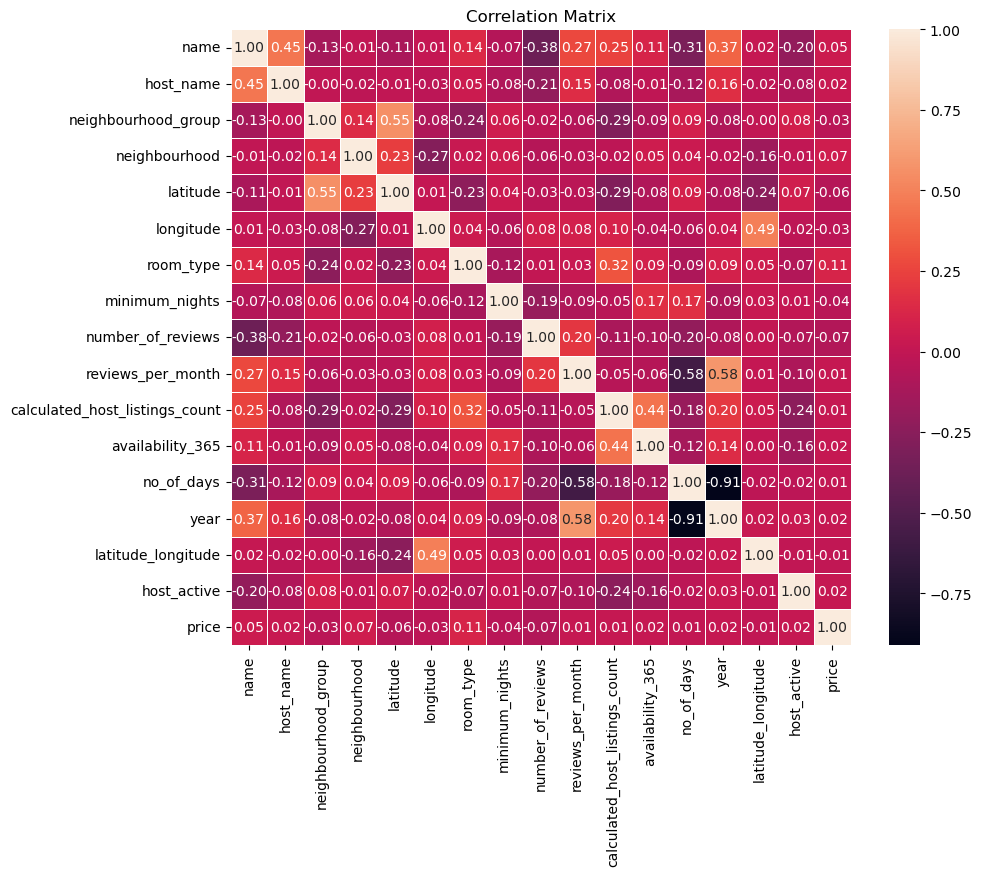

In [380]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Report <a id="part3"></a>

Summary/Overview
Through this assignment, we would be learning more about how to deal with underfitting on HR analytics by using logistic regression and overfitting datasets on listings by using linear regression. 

Based on the correlation and relationship between the different variables, we can make useful features to better understand the models and learn how to improve on it. By making use of various types of transformations, encoding methods, preprocessing steps such as regularization, scaling to predict whether an employee will be promoted and the prices of the various listings.


HR Analytics

•	Problem Understanding

Problem Statement:
The human resources department has been facing operational challenges in managing human-oriented tasks such as the collection, processing, and analysis of employee data. Traditional methods are time-consuming, prone to human error, and often fail to capture subtle trends in employee performance. As a result, there is a lack of efficiency, critical insights and patterns are missing. To overcome these challenges, the department seeks to enhance its operations by adopting predictive models.

Solution:
By developing a logistic regression model using the HR analytics dataset, we can predict which employees are most likely to be promoted. The dataset contains detailed information about employees, including personal data, educational background, and previous work performance. By leveraging this model, HR can make data-driven decisions, improve promotion accuracy, increase employee satisfaction, and enhance overall organizational efficiency.

•	Data Exploration
Rare Categories:
These are categories that have a frequency of less than 5% in each variable. 

Department:
Rare categories found in department were finance (0.046), HR (0.044), legal (0.019), and R&D (0.018). We can see that the mode department is sales & marketing (0.307) and the median department is Technology. Which shows that the biggest department in the company is sales & marketing, and most employees
Education: 
Rare categories found in education were below secondary (0.015). We can see that bachelor’s is the mode education and the median of the employees. This implies that majority of the employees have a education background.
Gender:
There are no rare categories in gender. However, we do recognize that majority of the employees are male, and they hire lesser female. There is a difference of 0.51 between the genders hired

Recruitment Channel:
Rare categories found in referred (0.021). The channel mode other is the mode and median recruitment channel. Which shows that the company often hires people outside of sourcing and referral. 
No_of_Training:
Non rare categories are 1 (44378) and 2(7987). Other categories are all rare categories. In this graph I showed the count of training rather than in percentage as the values are too small. We can see that majority of the employees only go through training once or twice. 
Previous_year_rating:
There are no rare categories in this variable. However, we do see that there are more people getting 3 for their rating and very little employees get 1 and 2. The median category is 4. 
KPIs_met >80%:
Through my analysis, majority of the employees (0.648) did not hit their goal. But a handful (0.352) of employees managed to reach their target.
Awards_won?:
A significant number of employees (0.977) did not manage to win any awards. Only 1 person has managed to win an award.
•	Data Cleansing and Transformation

Drop Unnecessary Column:
I chose to drop employee_id as it uniquely identifies each employee resulting in high cardinality which would cause an issue when encoding, cause the model to overfit, maintain the model relevance by focusing on more informative variables. Employee_id does not have any informative textual value, and it is irrelevant to the target variable ‘is_promoted’

Missing Imputation: 
previous_year_rating has 0.075244% missing values which convert to 4124 rows. Education has 0.043953 missing values and a count of 2409 rows. I performed an imputation pipeline by using the median value for previous_year_rating and mode for education. 

Reason being those who joined this year or missed the prior evaluation check do not have a rating. Some employees might not have furthered their studies or not included them in their resume. However, most jobs require employees to have a degree. During our data exploration, I noticed that the majority have a degree. 

Under Sampling:
Our main target of the project is to identify which employees are most likely to be promoted based on certain variables. However, through our data exploration, I noticed that employees with no promotion (target_0) vs promoted (target_1) have a ratio of 50140: 4668. This issue may affect the model as it could be biased towards the majority.

With such a huge difference in numbers, we would need to use under sampling to make target_0 and target_1 to have equal sized samples. We can reduce the imbalance of the dataset and avoid creating data based on other variables that aren’t factual.


Outlier Handling:
I felt that handling outliers is unnecessary as we can see on the boxplot that there are certain cases with a few extreme values. Extreme values are important for capturing data in rare events. It reflects rare events and identify new trends and behavior. 

By looking at no_of_trainings, we see that there are employees who have completed a range of 2 to 7 trainings whereas the majority actually completed only one training. In most cases, employees who have shown effort in their training to improve their skill sets would be promoted. 

Numerical Transformation:
I individually tested each numerical column by using various transformation methods. The factors that impacted my decisions were by looking at the histogram, QQ-plot and boxplot. The distributions should see significant improvements. The data point should be similar to the ideal scenario after the transformation and the histogram should be closed to normal distribution.

Further analysis and testing were done after looking at the model’s result to see whether the transformation or not performing any would better suit the model. Skewness and kurtosis were taken into account as well.

However, columns with binary labels such as KPIs_met>80%, awards_won?, avg_training_score were not transformed. As we are dealing with logistic regression, the model handles the variables directly.

Categorical Encoding:
I performed ordered ordinal encoding on the categorical columns. I wanted to be able to uniquely identify each unique value and retain its previous rank order. It helps to define a monotonic relationship between the categorical columns and the target variable. It does not decrease the dimension of the dataset and avoids losing valuable data.

As opposed to using one hot encoding, it constantly creates a new binary column for each unique category in the original variable. As the category columns have a high cardinality, it would lead to a significant increase in the number of columns. 

 
Equal Width Discretization:
I tried performing binning as it helps to improve the interpretability of categorical data and reduce fluctuations inside the dataset that was not spot. In certain situations, it also helped my model’s performance 

However, I chose not to proceed with it as I compared the results of before and after performing it. The model has decreased in terms of accuracy and precision. The confusion matrix also performed badly. We can see that there has been a large increase in the false positive and decrease in true positive. 

When I tried doing standardization after binning, the results is performing worse than if I were to do standardization without binning. The results of performing both are 0.718 (test accuracy) and 0.720 (train accuracy). However, if we were to perform standardization alone. The results are 0.734 (test
Standardization:
As the variables in the dataset have different scales. Region has a scale of ‘1’ to ‘23’, department has a scale of ‘1’ to ‘9’, awards_won has a scale of ‘1’ to ‘0’ etc. 

It enhances the data quality by ensuring that all the features are uniformed, it scales them to have similar range. It improves model comparability to make it easier to interpret the importance of features in the model. It improves the cross-validation scale, improves reliability and avoid data leakag
•	Correlation Analysis
Dropped Features:
By looking at the p-value of each variable through the model summary, we can determine the significance of the variable to the target. We can analyze that recruitment channel’s p-value is 0.702. It has a value of above 0.05 which indicates that there is weak evidence against the null hypothesis on the assumption that it has an effect on the target variable. After dropping the variable, the train accuracy has improved from 0.7247 to 0.7248. The test accuracy has improved from 0.7333 to 0.7340. Thus, indicating that the model performs better without recruitment_channel. 

Creation of Features:
Dept_gender_interaction:
By creating dept_gender_interaction, we can analyse the interaction between department and gender. This is useful to analyse if males or females have a higher possibility of getting a promotion in certain department. 

Since m = -0.657159, f = 1.521702, variables that are negative are and is_promoted = 1 signifies that the employee who is promoted is a male. Those that are positive in number are females who were or were not promoted. The difference in number depends on the department they are in. We can further filter them to showcase if more males or females got have a higher chance of promoting depending on the department that they are in.

Through the model summary, we can see that the p-value is 0.041. Indicating that there is significance strong evidence.

Perf_train:
By creating perf_train, we can analyse the interaction between KPIs_met >80% and avg_training_score. This is useful to analyse if employees with higher rating and higher average training score would have a higher likelihood of promotion.

Since it is an aggregate function, those who have a high rating score and high training score would have a high performance. However, those with low rating score and low training score would have low performance. In reality, employees with a higher performance score would have a higher chance of getting a promotion. 

Through the model summary, we can see that the p-value is 0.000. Indicating that there is significant strong evidence.

Perf_award:
By creating perf_award, we can analyse the interaction between KPIs_met >80% and awards_won?. This is useful to analyse if employees who have hit their target and have won award have been promoted previously. In reality those, who have won awards most likely have been performing well in their tasks and have been showing consistent efforts. 

However, the train and test accuracy performance has decreased. Thus, I chose not to proceed with this variable. 

•	Modeling
Naïve baseline is a benchmark model to evaluate the performance of more advanced models. The results of train data is 50.01% and test data is 49.98%. This indicates that it has a 50% accuracy on the dataset, and it has a balanced class. 

However, it may only be predicting one category in the target variable. As the results are nearly the same, it shows that there is no overfitti
•	Performance analysis
K-Fold:
Each individual score represents the model accuracy on each fold during the cross-validation process. The scores have a range of 0.7018 to 0.7850, indicating that there is variance in performance. The differences in performance could be due to more challenging folds and is able to analyse certain unseen data
Confusion Matrix:
Overall, we can see that the test model is performing better than the train model. Accuracy performance indicates that the model is not overfitting, precisions shows that the model identifies positive predictions, recall signifies that the model performs well in identifying true positives and F1-score indicates that the model is doing well as a whole. 

There is a balance between precision and recall. A high recall indicates the model captures a large number of promotions, however there are also some false positives. 

On the confusion matrix we can see that there are 928 true positives, 472 false positives, 256 false negative and 1145 true negative. We can see that the model is better in analyzing true negative data rather than true positives. However, there is a difference of 200 in the predict
Correlation Matrix:
We can see that the top five variables are KPIs_met >80%, avg_training_score, previous_year_rating, awards_won?, and region. However, the top five variables do not have a strong correlation with the target variable ‘is_promoted’
ion.
.
ng in the naïve baseline. 
e.
 accuracy) and 0.724 (train accuracy).






.

 work there. 


Airbnb 

•	Problem Understanding
Problem Statement:
Since 2008, Airbnb has gained significant popularity as a platform for guests seeking unique and personalized travel experiences. Hosts, in turn, share their spaces to monetize their properties. However, with the vast number of listings and various factors influencing rental prices, accurately predicting rental prices has become a challenging task.
Solution:

By developing a linear regression model using the Airbnb dataset, we can predict the rental price of listed properties based on several factors, such as host details, property location, reviews, and other relevant metrics. Leveraging these factors, the model can help Airbnb set more accurate rental prices, ensuring hosts can charge the best rates for their properties while providing guests with optimal pricing options in the market.

•	Data Exploration
Changing Date Type:
I changed last_review from object to datetime64[ns] to avoid having high cardinality once I did categorical encoding and the variable is used to view the latest review done on the Airbnb listing.

Inspecting Unique Values:

Neighbourhood_group:
It has five unique values in the variable. Variables that could be further added into the dataset are the North-West region, South-East region, South-West region and South region to increase the listings and have more places for guest to visit.  North-East and North regions have the least listing. Majority of the listings are in the central.

Room_type:
On our listings we offer private rooms, entire home or apartment and shared home to guest. The minority of the listings are shared rooms with a frequency of 0.0498.
Neighbourhood:
Guests have 43 neighborhoods to choose from. Various of these neighborhoods have attractions nearby and may have affected the listing prices due to their popularity and accessibility.
Latitude:
Through the distribution of the histogram, we can see that latitude is left skewed and is asymmetric. The highest frequency of latitude is around 1.32. There is a widespread indication that data has high variance. 
Longitude:
Through the distribution of the histogram, we can see that longitude is right skewed and is asymmetric. The highest frequency of longitude is around 103.84. There is a widespread, indicating the data has a high variance. 
Calculated_host_listings_count:
Through the distribution of the histogram, we can see that the variable is left skewed and does not have much of a shape. Its highest frequency has a range of 1 to 10. The data ranges from 0 to 275.
Availability_365:
The distribution is neither left, right nor symmetric. It has a range from 0 to 365. This is affected by the host’s decision on how often they would like to open their location to guests. 
Cardinality:
We can see that id and name have the highest cardinality as they are unique identifiers. Latitude and longitude are based on the geographical location of where the listing is located.
•	Data Cleansing and Transformation
Missing Imputation:
Variables that had missing values are last_review, reviews_per_month and name. I decided to fill in the missing values with mean imputation for last_review and reviews_per_month. As these two columns are directly related to one another, I have to use the same method of missing imputation. If there were no reviews previously, there would be no count of reviews per month as well. 

However, certain methods that I have tried to do for last_review is last observation carried forward, next observation carried backward and linear interpolation. Afterwards I realized that there are no regular intervals when the review has been made. Thus, time series analysis was not applicable for this scenario. 

Rows in name that are missing were dropped as name is a unique identifier for each listing. It would not be appropriate to use mean, median and mode imputation. Additionally, only a small number of names is null. 

Dropping Unnecessary Columns: 

I chose to drop id and host_id as it uniquely identifies each listing. It does not contribute to any informative textual value, and it is irrelevant to the target variable ‘price’. As seen in our data exploration, it has high cardinality which may lead to overfitting of the dataset.

Creation of column: Number of days since last_review
I chose to create this column to preserve data from the column. If guests see that the last review made is recent, they would be more likely to stay at this place. With more guest thinking alike, booking frequency would increase and the prices as well.
Creation of column: Year
I chose to create this column to see if there is any relationship between the date the review was published and the target variable.

Other extractions were made for month, quarter, semester day, weekday or not, weekend or not to preserve the data from last_review. However, I chose not to as I did not want to increase the cardinality of the dataset.

Through trial and error, I also realized that my dataset has overfitting issues. To avoid making the issues worse, I decided to pick the better columns. 

Drop last_review:
As the linear regression model, it does not accept datetime values. I choose to extract any valuable data and drop the column. 

Dealing with outliers:
I choose winsorisation to deal with the outliers. The boxplot of the various variables shows that there were numerous outliers and majority of the distribution were left skewed or had no significant distribution. To deal with the issue I choose to replace the values with data closer to the mean. This ensures that the majority of the unaffected data are not affected by the mean and median. This helps to retain the data rather than removing it. This helps to maintain the original dataset size and structure. If we were to remove them, we would lose a significant amount of data.

Numerical Transformation:
I individually tested each numerical column by using various transformation methods. The factors that impacted my decisions were by looking at the distributions of the various variables. The variables should have a closer normal distribution, and the qq-plot should see significant improvements. The data point should be at a 45-degree angle for the most ideal fit. 

Further analysis and testing were done after looking at the model’s result to see whether the transformation or not performing any would better suit the model. 

However, availability_365, no_of_days, year, minimum_nights, latitude were not transformed as I felt that after transforming the data, the results from the model had decreased or had minimal changes. 

 
Equal Width Discretization:
It divides the range of the continuous variables into bins of equal size. As we can see from the results, binning helps to reduce overfitting of the data. It reduced the model complexity by reducing the granularity of continuous variables. Ensuring that there is uniformity across the dataset. The fixed width of the bins ensured that the intervals are uniformed across, making it easier to compare categories. Additionally, we can see that the train aRegularization:
I have tried all three methods of regularization, ridge lasso and elastic net. These methods are used to prevent overfitting of the dataset, it helps the variables that are highly correlated, and it performs well on unseen data. 

Ridge retains all the features inside the dataset and improves the stability of the model. Lasso pushes the p-value to zero, to make it easier to select which variable helps the model. Elastic net combines both the pros of lasso and ridge. However, elastic net includes a group of correlated variables inside the model as compared to Lasso.

I decided to use elastic net as I felt that there are irrelevant features based on the p-value inside the model summary and multicollinearity.

Standardization:
As mentioned in the beginning, standardization works best in datasets where the variables in the dataset have different scales. Latitude has a range of 1 to 2, availability_365 has a range of 0 to 365. 

It is a preprocessing step that transform numerical features. Without standardization, comparing the variables is a challenge because it depends on each independent variable. It will improve the interaction between each variable especially when creating columns. By standardizing features before creating them, the features are much more manageable.

Principal Component Analysis (PCA):
It is a dimension reduction technique to transform high dimensional data to lower dimension while retaining the variance of the original dataset. It helps to simplify the model, decrease the complexity of the variables and improve efficiency. It captures the significant variation in the dataset that was not noticeable. 
 
•	Correlation Analysis

Latitude_longitude:
By creating latitude_longitude, we can analyse the interaction between latitude and longitude. This is useful to analyse if the geographical location has any impact in listing of price. In reality most guests would choose their stay based on the places they are traveling to, the accessibility of the area and how far it is from the public amenities. If there are more people visiting the listing, the prices of thes
Host_Activity:
By creating host_active, we can analyse the interaction between calculated_host_listings_count and number_of_reviews. This is useful to analyse the relationship between the sum of listing a host own and the number of reviews guest have left. With more listing, if a host has credibility and multiple reviews have been posted at a certain listing they would also be inclined to visit the host other listing to see if they are of the same standard. 
•	Modeling
The linear regression model indicates that the model is not performing well on the train and test data. The mean squared error value is relatively large, indicating that the prediction model does not perform well. The model is far from predicting the target value.

The r-square model explains only 3.21% of the training set and 2.31% of the test set of the variance in the target variable. This shows that the model fails to capture meaningful patterns in the data. 

e world increase.
nd test are similar to one another










•	Summarize your findings on the two datasets

HR Analytics:
The objective of the model is to predict which employees are more likely to be promoted by using logistic regression to help the HR team make data driven decisions. 

Through data exploration detailing the analysis of categorical features, insights on data distribution for numerical variables with the help of histogram, box plots and qq-plot to see which transformation would suit the variable best. A clear feature imbalance on certain departments or gender inequality were also noticed.

Based on the class imbalance of the target variable, undersampling was chosen to create a balance dataset to avoid being bias to employees who were not promoted. To ensure that the employees are treated fairly, I input null values by using mode and median to keep the original dataset and avoid losing any valuable data. I introduced interaction features based on their p-values and remove features with high cardinality issues. 

Airbnb:
The objective of the model is to better predict rental prices based on various listing and location features.

Through data exploration, I have converted last_review into datetime to extract valuable columns such as number of days since the last review and the year it was made. This help to capture trends between guest engagement by looking at the review and how recent it was done. With the issue of overfitting, I have tried to use dimension reduction such as PCA, numerical transformation, scaling and binning for a better model interpretability and performance. 

Removal of high cardinality identifiers reduces the issue on overfitting. I have done a comparison on the various regularization techniques such as ridge, lasso, elastic net. Overall, I realized that the features lack of correlation between them and the issue of overfitting have reduce the model’s ability to predict its performance, indicating that there are issues within the dataset structure that I have not managed to fix. 

•	Explain the possible further improvements

Certain improvements that could be made are additional interactions between variables to further study the model. Research on more techniques that were not taught in school to deal with undersampling and overfitting. I should also have tried oversampling and seeing which model is more accurate at predicting the employee’s promotion. Further improvements could have been made by experimenting with tree-based models, using clustering technique taught in previous modules such as k-means.

I also felt that the use of various visualizations could have been done to showcase the interaction features, the data before and after. Filtering and subset could have been done as well during the exploration to further analysis the dataset.  

Overall, more research could have been done on overfitting as I have faced many issues during my trial test. 
